# 1 Датасет.
# 126 Years of Historical Olympic Dataset

## Введение

Этот [датасет](https://www.kaggle.com/datasets/muhammadehsan02/126-years-of-historical-olympic-dataset/data "Посмотреть страницу первого датасета") представляет собой всеобъемлющий архив олимпийской истории, охватывающий 126 лет, от первых современных Олимпийских игр в Афинах в 1896 году до зимних Олимпийских игр в Пекине. Он предоставляет результаты на уровне спортсменов, подробную биографическую информацию и показатели производительности.

Анализ провлодится на таблице "Olympic_Athlete_Biography.csv". В качестве данных используется столбец "height".

Прилагается собрать статистику для столбца "height", связав его с остальными данными для спортсменов и провести соответствующий анализ между гендерами спортсменов.


# 1. Характеристики

**Название датасета**: "Olympic_Athlete_Biography.csv"

__Цель__: Собрать статистику и провести анализ относительно столбца **'height'** для каждого гендера, в дальнейшем потенциально связать и проверить связь с другими данными (weight, country, ...)

**Источник**: [здесь](https://www.kaggle.com/datasets/muhammadehsan02/126-years-of-historical-olympic-dataset/data")

**Последнее обновление датасета**: 23.08.2024

**Размер датасета**: 55 Mb

**P.S.** Данные - грязные -> удаляю все пропуски, чтобы было показательно.

In [4]:
# Загрузка необходимых библиотек
# install.packages("ggplot2")
# install.packages("dplyr")
# install.packages("stats")

library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)
library(stats)

In [3]:
library(dplyr)
library(readr)
library(stringr)

# Путь к файлу
data_file_path <- '../all_datasets/Olympic_Athlete_Biography.csv'

# Чтение данных
df <- read_csv(data_file_path, n_max = 30000, show_col_types = FALSE) %>%
  drop_na() %>%
  filter(!str_detect(weight, "-")) %>%
  mutate(weight = as.numeric(weight))

# Функция для извлечения спортивной категории
extract_sport <- function(description) {
  sports_keywords <- c('tennis', 'skiing', 'dance', 'cycling', 'swim', 'hockey', 'field hockey', 
                       'boxing', 'basketball', 'soccer', 'football', 'volleyball', 'badminton', 
                       'baseball', 'biathlon', 'golf', 'archery', 'athletics', 'skeleton', 
                       'shooting', 'sailing', 'cricket', 'water polo', 'equestrian', 
                       'weight lifting', 'wrestling', 'karate', 'judo', 'ski jumping', 
                       'handball', 'fencing')
  
  for (sport in sports_keywords) {
    if (str_detect(tolower(description), fixed(sport))) {
      return(str_to_title(sport))
    }
  }
  return(NA)
}

df$sport <- sapply(df$description, extract_sport)
df <- na.omit(df)

# Отдельные датафреймы для мужчин и женщин
male_df <- df %>% filter(sex == 'Male') %>% select(country, height, weight, sport)
female_df <- df %>% filter(sex == 'Female') %>% select(country, height, weight, sport)

print(male_df)

# A tibble: 829 × 4
   country       height weight sport     
   <chr>          <dbl>  <dbl> <chr>     
 1 United States    181     70 Skiing    
 2 Italy            169     64 Boxing    
 3 Canada           180     77 Equestrian
 4 Soviet Union     176     82 Hockey    
 5 Italy            172     87 Cycling   
 6 Unified Team     183     80 Hockey    
 7 United States    180     73 Soccer    
 8 United States    211    107 Basketball
 9 West Germany     196     88 Swim      
10 United States    183     70 Swim      
# ℹ 819 more rows


**Признаки всего датасета**:

In [5]:
unique_sports <- unique(df$sport)
print(unique_sports)

 [1] "Tennis"      "Skiing"      "Dance"       "Boxing"      "Equestrian" 
 [6] "Swim"        "Football"    "Hockey"      "Cycling"     "Judo"       
[11] "Soccer"      "Basketball"  "Volleyball"  "Wrestling"   "Athletics"  
[16] "Archery"     "Shooting"    "Biathlon"    "Water Polo"  "Fencing"    
[21] "Golf"        "Ski Jumping" "Baseball"    "Sailing"     "Handball"   
[26] "Badminton"   "Cricket"     "Skeleton"   


In [6]:
str(df)

tibble [1,150 × 11] (S3: tbl_df/tbl/data.frame)
 $ athlete_id   : num [1:1150] 207 99106 100169 4192 11811 ...
 $ name         : chr [1:1150] "Virág Csurgó" "Ronny Yeager" "Galit Chait" "Daniele Zappaterra" ...
 $ sex          : chr [1:1150] "Female" "Male" "Female" "Male" ...
 $ born         : chr [1:1150] "10 November 1972" "16 August 1952" "29 January 1975" "19 September 1955" ...
 $ height       : num [1:1150] 172 181 153 169 180 165 159 176 172 183 ...
 $ weight       : num [1:1150] 63 70 45 64 77 49 60 82 87 80 ...
 $ country      : chr [1:1150] "Hungary" "United States" "Israel" "Italy" ...
 $ country_noc  : chr [1:1150] "HUN" "USA" "ISR" "ITA" ...
 $ description  : chr [1:1150] "Virág Csurgó was a professional Hungarian tennis player who specialised as a doubles player. Csurgó achieved a "| __truncated__ "Ronny Yeager skied for Durango High School and the University of Colorado, from which he graduated in 1972. In "| __truncated__ "Dance: 1994 World Championships (FNR) (with Ma

In [7]:
summary(df)

   athlete_id          name               sex                born          
 Min.   :      3   Length:1150        Length:1150        Length:1150       
 1st Qu.:  33222   Class :character   Class :character   Class :character  
 Median :  54888   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  60729                                                           
 3rd Qu.:  84688                                                           
 Max.   :1005221                                                           
     height          weight         country          country_noc       
 Min.   :150.0   Min.   : 45.00   Length:1150        Length:1150       
 1st Qu.:172.0   1st Qu.: 64.00   Class :character   Class :character  
 Median :178.0   Median : 73.00   Mode  :character   Mode  :character  
 Mean   :178.1   Mean   : 73.66                                        
 3rd Qu.:185.0   3rd Qu.: 82.00                                        
 Max.   :226.0   Max.   :141.00     

In [8]:
object_columns <- df %>% select(where(is.character))
print(object_columns)

# A tibble: 1,150 × 8
   name          sex   born  country country_noc description special_notes sport
   <chr>         <chr> <chr> <chr>   <chr>       <chr>       <chr>         <chr>
 1 Virág Csurgó  Fema… 10 N… Hungary HUN         Virág Csur… Listed in Ol… Tenn…
 2 Ronny Yeager  Male  16 A… United… USA         Ronny Yeag… Listed in Ol… Skii…
 3 Galit Chait   Fema… 29 J… Israel  ISR         Dance: 199… Listed in Ol… Dance
 4 Daniele Zapp… Male  19 S… Italy   ITA         Daniele Za… Listed in Ol… Boxi…
 5 Jim Day       Male  2 Ju… Canada  CAN         Jim Day jo… Listed in Ol… Eque…
 6 Beth Botsford Fema… 21 M… United… USA         Beth Botsf… Listed in Ol… Swim 
 7 Nelli Fiere-… Fema… 6 Ju… Nether… NED         Nelli Coom… Listed in Ol… Foot…
 8 Sergey Mylni… Male  6 Oc… Soviet… URS         Sergey Myl… Listed in Ol… Hock…
 9 Galliano Ros… Male  17 M… Italy   ITA         A five tim… Listed in Ol… Cycl…
10 Sergey Petre… Male  10 S… Unifie… EUN         Sergey Pet… Listed in Ol… Hock…
# ℹ 1,

**Мода и медиана** 

In [10]:
# Медиана и мода для height
mode_value <- as.numeric(names(sort(table(df$height), decreasing = TRUE)[1]))
median_value <- median(df$height, na.rm = TRUE)

cat(sprintf("Мода: %s\n\nМедиана: %s\n", mode_value, median_value))

Мода: 180

Медиана: 178


**Пропуски**

In [12]:
colSums(is.na(df))

athlete_id          name           sex          born        height 
            0             0             0             0             0 
       weight       country   country_noc   description special_notes 
            0             0             0             0             0 
        sport 
            0

### Male

**Признаки датасета**

In [15]:
top_10_male <- male_df %>%
  arrange(height) %>%
  head(10)

# Вывод результата
print(top_10_male)

# A tibble: 10 × 4
   country       height weight sport    
   <chr>          <dbl>  <dbl> <chr>    
 1 Soviet Union     155     52 Wrestling
 2 United States    155     57 Wrestling
 3 Canada           157     60 Wrestling
 4 Puerto Rico      158     82 Shooting 
 5 Thailand         158     62 Sailing  
 6 Argentina        158     54 Sailing  
 7 Poland           159     75 Football 
 8 Italy            160     60 Judo     
 9 Ghana            160     51 Boxing   
10 Australia        160     72 Swim     


In [16]:
top_10_male_tail <- male_df %>%
  arrange(height) %>%
  tail(10)

# Вывод результата
print(top_10_male_tail)

# A tibble: 10 × 4
   country                    height weight sport     
   <chr>                       <dbl>  <dbl> <chr>     
 1 United States                 203    102 Basketball
 2 United States                 203     90 Basketball
 3 United States                 205    104 Water Polo
 4 United States                 205    100 Tennis    
 5 Soviet Union                  205     96 Basketball
 6 West Germany                  210    100 Basketball
 7 United States                 211    107 Basketball
 8 United States                 216    137 Basketball
 9 United States                 216    107 Basketball
10 People's Republic of China    226    141 Basketball


In [17]:
str(male_df)

tibble [829 × 4] (S3: tbl_df/tbl/data.frame)
 $ country: chr [1:829] "United States" "Italy" "Canada" "Soviet Union" ...
 $ height : num [1:829] 181 169 180 176 172 183 180 211 196 183 ...
 $ weight : num [1:829] 70 64 77 82 87 80 73 107 88 70 ...
 $ sport  : Named chr [1:829] "Skiing" "Boxing" "Equestrian" "Hockey" ...
  ..- attr(*, "names")= chr [1:829] "Ronny Yeager skied for Durango High School and the University of Colorado, from which he graduated in 1972. In "| __truncated__ "Daniele Zappaterra started boxing in 1970, at age 15, coached by Antonio Tisinato. Before the 1976 Montréal Oly"| __truncated__ "Jim Day joined the Canadian national equestrian team in 1964 and, four years later, was a gold medalist at the "| __truncated__ "Sergey Mylnikov began his hockey career with Traktor Chelyabinsk in 1976 and played there until 1989, except fo"| __truncated__ ...
 - attr(*, "na.action")= 'omit' Named int [1:2442] 1 5 6 7 9 11 13 14 15 16 ...
  ..- attr(*, "names")= chr [1:2442] "1" "

**Вывод характеристик (min-max значения, отклонение, среднее и др.)**

In [19]:
summary(male_df)

   country              height        weight         sport          
 Length:829         Min.   :155   Min.   : 48.0   Length:829        
 Class :character   1st Qu.:175   1st Qu.: 70.0   Class :character  
 Mode  :character   Median :180   Median : 77.0   Mode  :character  
                    Mean   :181   Mean   : 77.8                     
                    3rd Qu.:187   3rd Qu.: 84.0                     
                    Max.   :226   Max.   :141.0                     

**Мода и медиана**

In [21]:
# Медиана для height
male_median_value <- median(male_df$height, na.rm = TRUE)

# Мода для height
male_mode_value <- as.numeric(names(sort(-table(male_df$height)))[1])

# Вывод результата
cat("Мода: ", male_mode_value, "\n\nМедиана: ", male_median_value, "\n")

Мода:  180 

Медиана:  180 


**Пропуски**|

In [23]:
colSums(is.na(male_df))

country  height  weight   sport 
      0       0       0       0

**Гистограммы, круговые диаграммы для визуализации распределений**

In [25]:
print(dim(male_df))

[1] 829   4


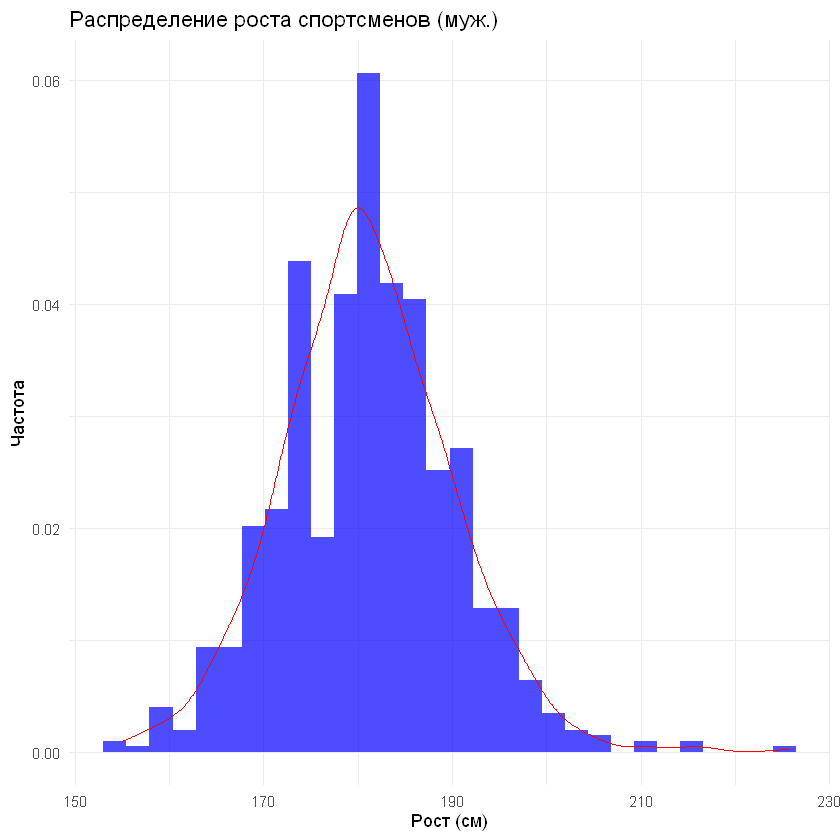

In [29]:
# Гистограмма роста
ggplot(male_df, aes(x = height)) +
  geom_histogram(bins = 30, aes(y = after_stat(density)), fill = "blue", alpha = 0.7) +
  geom_density(color = "red") +
  labs(title = "Распределение роста спортсменов (муж.)", x = "Рост (см)", y = "Частота") +
  theme_minimal()

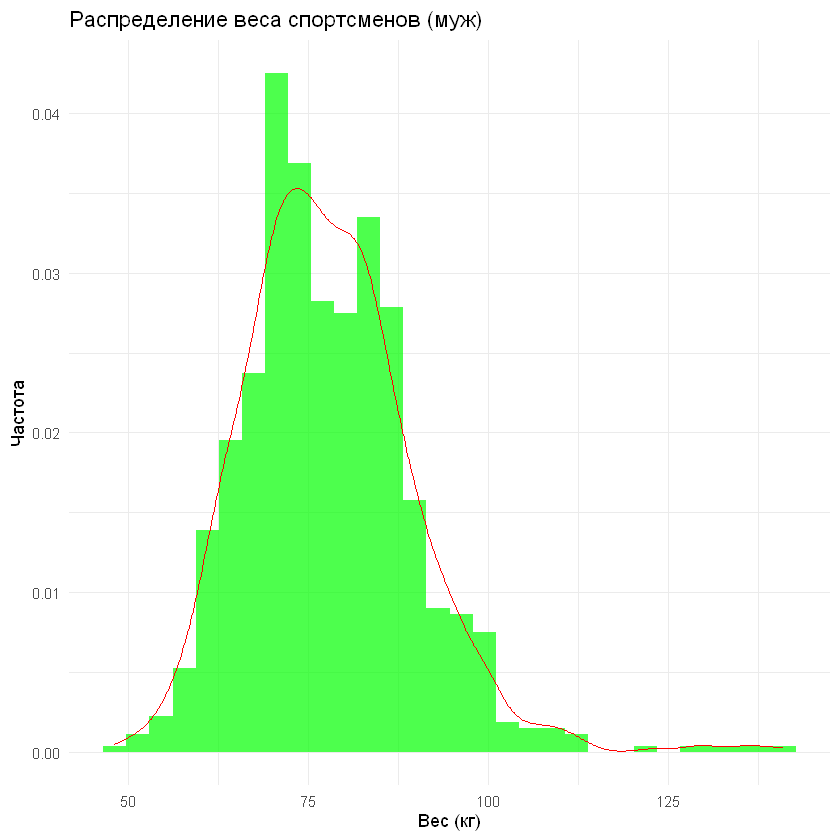

In [30]:
# Гистограмма веса
ggplot(male_df, aes(x = weight)) +
  geom_histogram(bins = 30, aes(y = after_stat(density)), fill = "green", alpha = 0.7) +
  geom_density(color = "red") +
  labs(title = "Распределение веса спортсменов (муж)", x = "Вес (кг)", y = "Частота") +
  theme_minimal()

In [31]:
# Круговая диаграмма распределения числа спортсменов по видам спорта
male_pie <- male_df %>%
    count(sport) %>%
    ggplot(aes(x = "", y = n, fill = sport)) +
    geom_bar(width = 1, stat = "identity") +
    coord_polar("y") +
    labs(title = "Распределение спортсменов по видам спорта (муж.)") +
    theme_void() +
    geom_text(aes(y = n/2 + c(0, cumsum(n)[-length(n)]), label = percent(n/300)), size=3)
    
    # ggsave("male sport distribution.png", width = 10, height = 7)

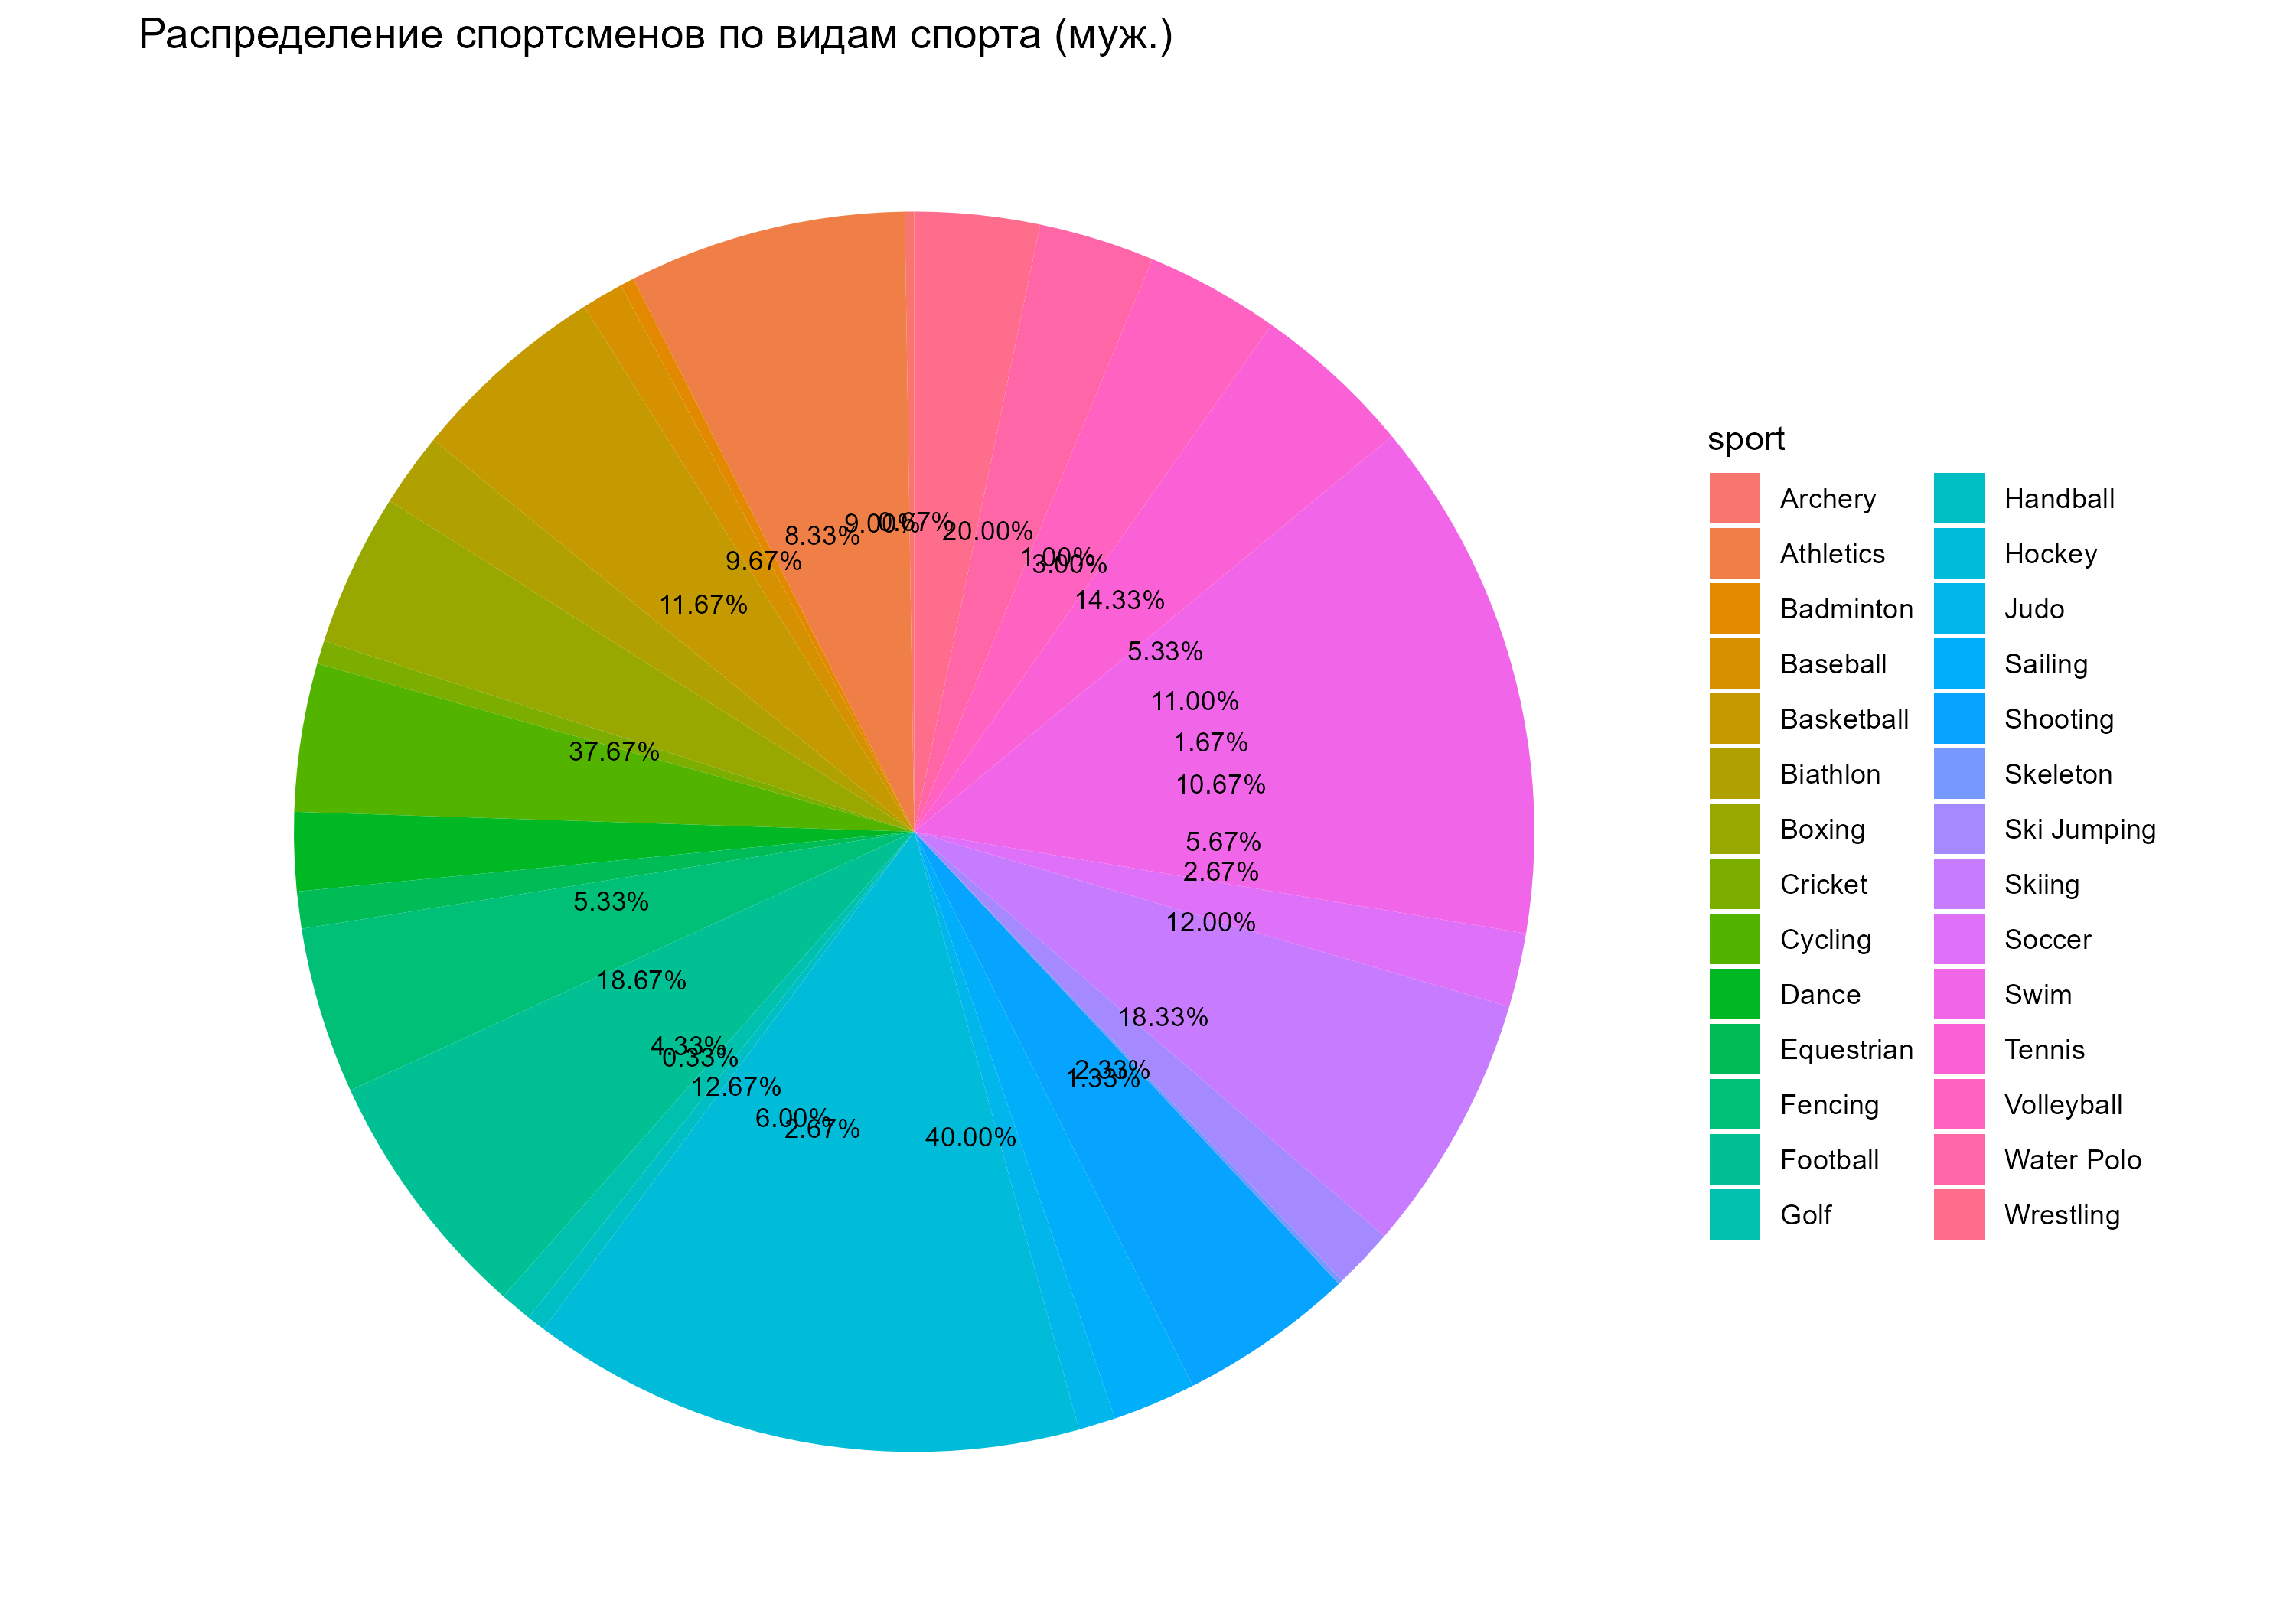

**Метрики** (MAE, MSE)

In [34]:
# Установка необходимых библиотек
# install.packages("Metrics")
library(Metrics)

# Предположим, что male_df - это ваш датафрейм с высотой и весом
# Генерация случайных предсказаний
set.seed(123) # для воспроизводимости
m_h_true <- male_df$height # реальные высоты
m_h_predict <- sample(155:226, nrow(male_df), replace = TRUE) # предсказанные высоты

m_w_true <- male_df$weight # реальные веса
m_w_predict <- sample(48:141, nrow(male_df), replace = TRUE) # предсказанные веса

# Вычисление метрик
m_h_mae <- mae(m_h_true, m_h_predict)
m_h_mse <- mse(m_h_true, m_h_predict)

m_w_mae <- mae(m_w_true, m_w_predict)
m_w_mse <- mse(m_w_true, m_w_predict)

# Вывод результатов
cat(sprintf("Вес мужчин - MAE: %.2f\n", m_w_mae))
cat(sprintf("Вес мужчин - MSE: %.2f\n", m_w_mse))
cat(sprintf("Рост мужчин - MAE: %.2f\n", m_h_mae))
cat(sprintf("Рост мужчин - MSE: %.2f\n", m_h_mse))


Вес мужчин - MAE: 27.07
Вес мужчин - MSE: 1128.01
Рост мужчин - MAE: 20.02
Рост мужчин - MSE: 598.15



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




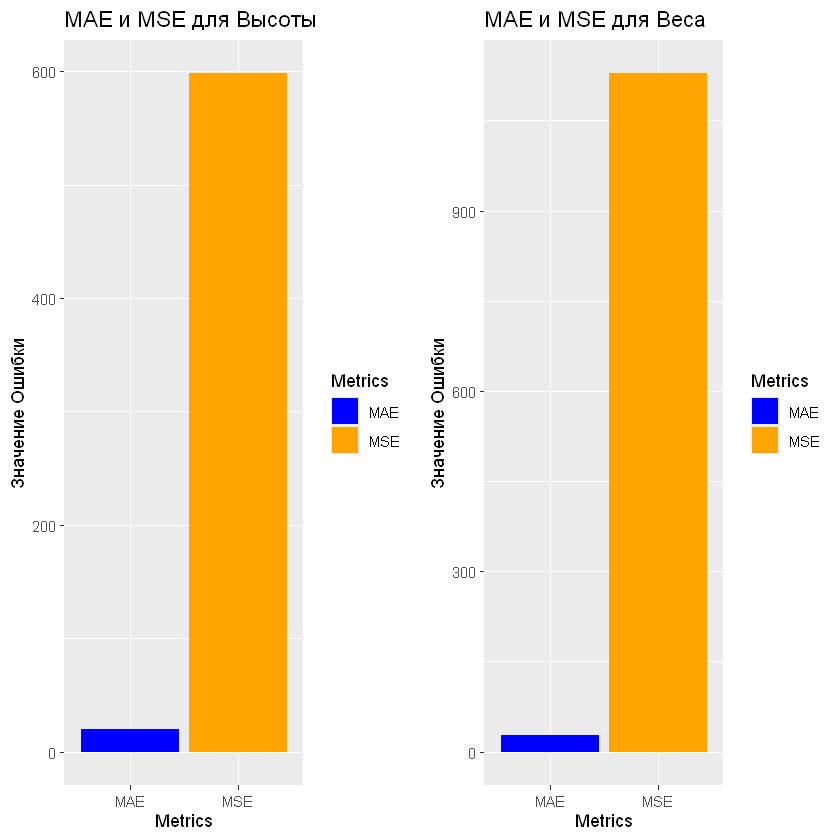

In [35]:
# Установка необходимых библиотек
# install.packages("ggplot2")
library(ggplot2)

# Задаем метрики и значения
metrics <- c('MAE', 'MSE')
h_values <- c(m_h_mae, m_h_mse)
w_values <- c(m_w_mae, m_w_mse)

# Создаем датафрейм для высоты
height_data <- data.frame(Metrics = metrics, Values = h_values)

# Создаем датафрейм для веса
weight_data <- data.frame(Metrics = metrics, Values = w_values)

# Визуализация метрик для высоты
p1 <- ggplot(height_data, aes(x = Metrics, y = Values, fill = Metrics)) +
  geom_bar(stat = "identity") +
  ggtitle("MAE и MSE для Высоты") +
  ylab("Значение Ошибки") +
  scale_fill_manual(values = c("blue", "orange"))

# Визуализация метрик для веса
p2 <- ggplot(weight_data, aes(x = Metrics, y = Values, fill = Metrics)) +
  geom_bar(stat = "identity") +
  ggtitle("MAE и MSE для Веса") +
  ylab("Значение Ошибки") +
  scale_fill_manual(values = c("blue", "orange"))

# Отображение графиков
library(gridExtra)
grid.arrange(p1, p2, ncol = 2)


 **Нормализуем данные (для теста) с помощью MinMaxScaler**


Attaching package: 'scales'


The following object is masked from 'package:readr':

    col_factor




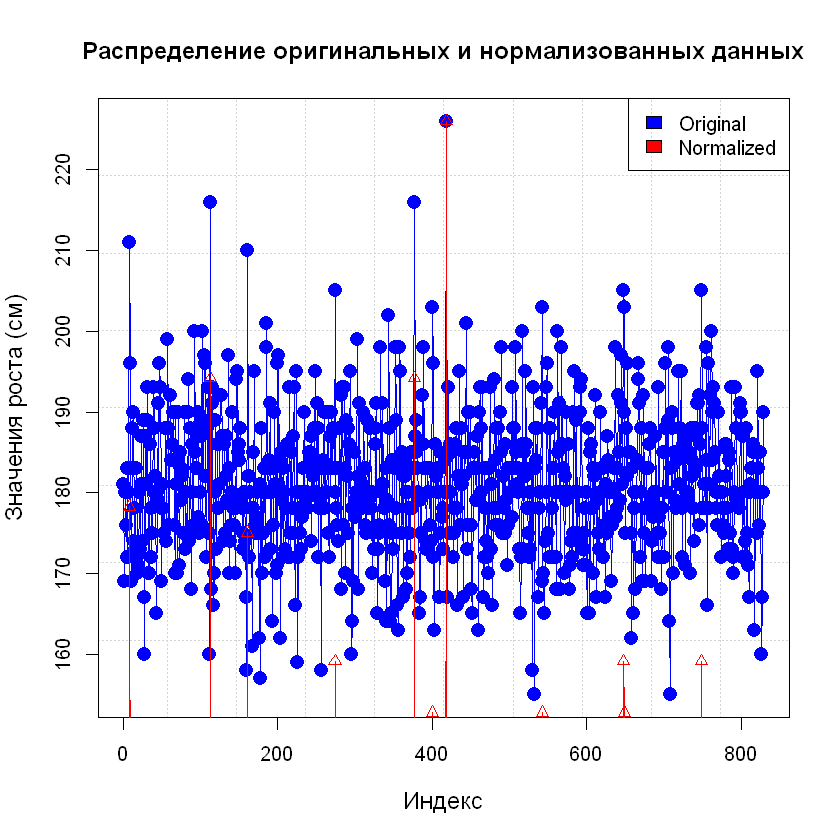

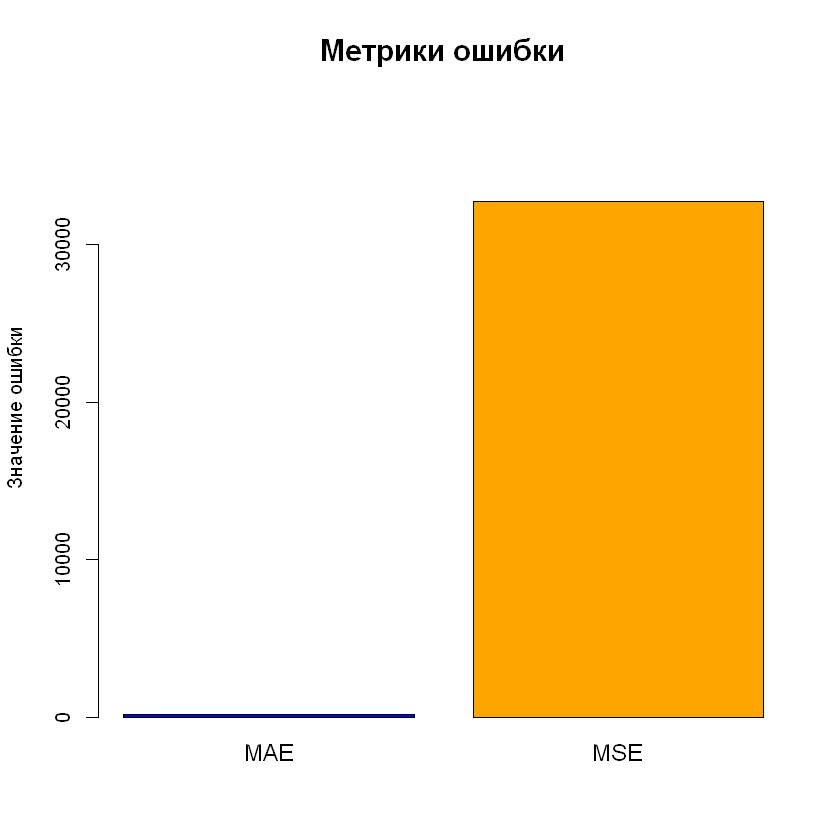

In [37]:
# install.packages("ggplot2")
# install.packages("scales")
library(ggplot2)
library(scales)

# Нормализация данных с использованием Min-Max Scaler
normalized_male_height <- rescale(male_df$height, to = c(0, 1))

# Подсчет метрик
norm_mae <- mean(abs(male_df$height - normalized_male_height))
norm_mse <- mean((male_df$height - normalized_male_height)^2)

# График распределения оригинальных и нормализованных данных
plot(male_df$height, panel.first = grid(10, 8), type='o', col='blue', ylim=c(min(male_df$height), max(male_df$height)), 
     main='Распределение оригинальных и нормализованных данных', 
     xlab='Индекс', ylab='Значения роста (см)', cex=1.5, pch=16, cex.main=1.2, cex.lab=1.2)

points(normalized_male_height * max(male_df$height), type='o', col='red', pch=2)
# Добавление легенды
legend("topright", legend=c("Original", "Normalized"),  
       fill = c("blue","red"))

# Столбчатая диаграмма метрик ошибки
barplot(c(norm_mae, norm_mse), names.arg=c("MAE", "MSE"), col=c("blue", "orange"), 
        main="Метрики ошибки", ylab="Значение ошибки", ylim=c(0, max(norm_mae, norm_mse) * 1.2), 
        cex.main=1.5, cex.names=1.2)

### Female

**Признаки датасета**

In [41]:
top_10_female <- female_df %>%
  arrange(height) %>%
  head(10)

# Вывод результата
print(top_10_female)

# A tibble: 10 × 4
   country                          height weight sport     
   <chr>                             <dbl>  <dbl> <chr>     
 1 East Germany                        150     48 Swim      
 2 United States                       152     52 Biathlon  
 3 Israel                              153     45 Dance     
 4 United States                       153     63 Basketball
 5 Canada                              153     48 Athletics 
 6 United States                       154     50 Skiing    
 7 United States                       155     52 Judo      
 8 Russian Federation  Unified Team    155     50 Athletics 
 9 United States                       155     57 Hockey    
10 Germany                             156     50 Shooting  


In [42]:
top_10_female_tail <- female_df %>%
  arrange(height) %>%
  tail(10)

# Вывод результата
print(top_10_female_tail)

# A tibble: 10 × 4
   country               height weight sport     
   <chr>                  <dbl>  <dbl> <chr>     
 1 United States            188     75 Volleyball
 2 Brazil                   190     73 Volleyball
 3 United States            190     62 Basketball
 4 East Germany  Germany    190     72 Volleyball
 5 United States            190     73 Basketball
 6 United States            190     64 Basketball
 7 United States            192     95 Basketball
 8 Germany                  194     88 Volleyball
 9 United States            201     95 Basketball
10 Italy                    201     92 Cycling   


In [43]:
str(female_df)

tibble [321 × 4] (S3: tbl_df/tbl/data.frame)
 $ country: chr [1:321] "Hungary" "Israel" "United States" "Netherlands" ...
 $ height : num [1:321] 172 153 165 159 170 165 175 188 170 167 ...
 $ weight : num [1:321] 63 45 49 60 78 66 65 80 52 58 ...
 $ sport  : Named chr [1:321] "Tennis" "Dance" "Swim" "Football" ...
  ..- attr(*, "names")= chr [1:321] "Virág Csurgó was a professional Hungarian tennis player who specialised as a doubles player. Csurgó achieved a "| __truncated__ "Dance: 1994 World Championships (FNR) (with Maxim Sevostianov (a non-Olympian) [ISR]). 1996 World Championships"| __truncated__ "Beth Botsford was a backstroker who swam both backstroke events and the medley relay at the 1996 Atlanta Olympi"| __truncated__ "Nelli Cooman was the fastest woman over 60 metres in the second half of the 1980s. She won the world indoor tit"| __truncated__ ...
 - attr(*, "na.action")= 'omit' Named int [1:2442] 1 5 6 7 9 11 13 14 15 16 ...
  ..- attr(*, "names")= chr [1:2442] "1" "5" "6

**Вывод характеристик (min-max значения, отклонение, среднее и др.)**

In [45]:
summary(female_df)

   country              height          weight          sport          
 Length:321         Min.   :150.0   Min.   : 45.00   Length:321        
 Class :character   1st Qu.:165.0   1st Qu.: 57.00   Class :character  
 Mode  :character   Median :170.0   Median : 62.00   Mode  :character  
                    Mean   :170.8   Mean   : 62.95                     
                    3rd Qu.:175.0   3rd Qu.: 67.00                     
                    Max.   :201.0   Max.   :135.00                     

**Мода и медиана**

In [47]:
# Медиана для height
female_median_value <- median(female_df$height, na.rm = TRUE)

# Мода для height
female_mode_value <- as.numeric(names(sort(-table(female_df$height)))[1])

# Вывод результата
cat("Мода: ", female_mode_value, "\n\nМедиана: ", female_median_value, "\n")

Мода:  170 

Медиана:  170 


**Пропуски**|

In [50]:
colSums(is.na(female_df))

country  height  weight   sport 
      0       0       0       0

**Гистограммы, круговые диаграммы для визуализации распределений**

In [52]:
print(dim(female_df))

[1] 321   4


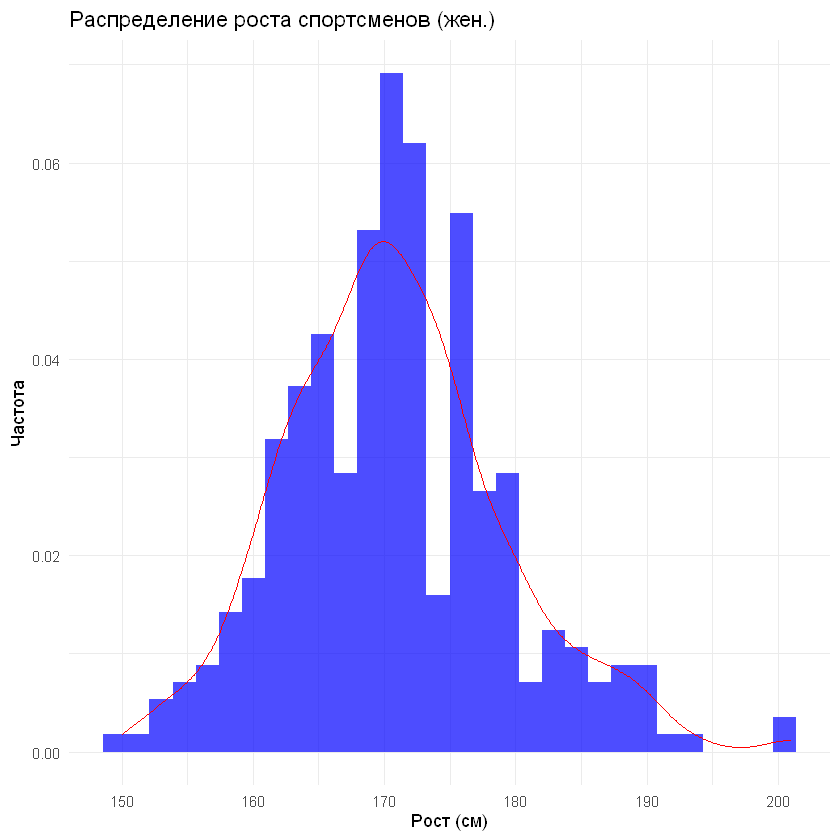

In [55]:
# Гистограмма роста
ggplot(female_df, aes(x = height)) +
  geom_histogram(bins = 30, aes(y = after_stat(density)), fill = "blue", alpha = 0.7) +
  geom_density(color = "red") +
  labs(title = "Распределение роста спортсменов (жен.)", x = "Рост (см)", y = "Частота") +
  theme_minimal()

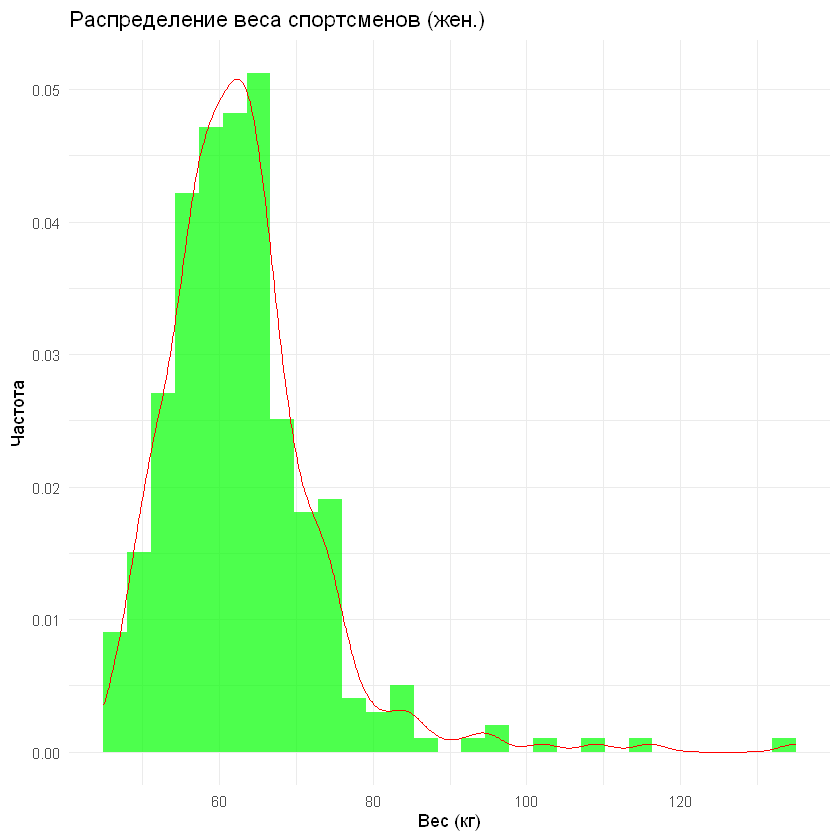

In [57]:
# Гистограмма веса
ggplot(female_df, aes(x = weight)) +
  geom_histogram(bins = 30, aes(y = after_stat(density)), fill = "green", alpha = 0.7) +
  geom_density(color = "red") +
  labs(title = "Распределение веса спортсменов (жен.)", x = "Вес (кг)", y = "Частота") +
  theme_minimal()

In [59]:
# Круговая диаграмма распределения числа спортсменов по видам спорта
pie <- female_df %>%
    count(sport) %>%
    ggplot(aes(x = "", y = n, fill = sport)) +
    geom_bar(width = 1, stat = "identity") +
    coord_polar("y") +
    labs(title = "Распределение спортсменов по видам спорта (жен.)") +
    theme_void() +
    geom_text(aes(y = n/2 + c(0, cumsum(n)[-length(n)]), label = percent(n/300)), size=3)
    
    # ggsave("female sport distribution.png", width = 10, height = 7)

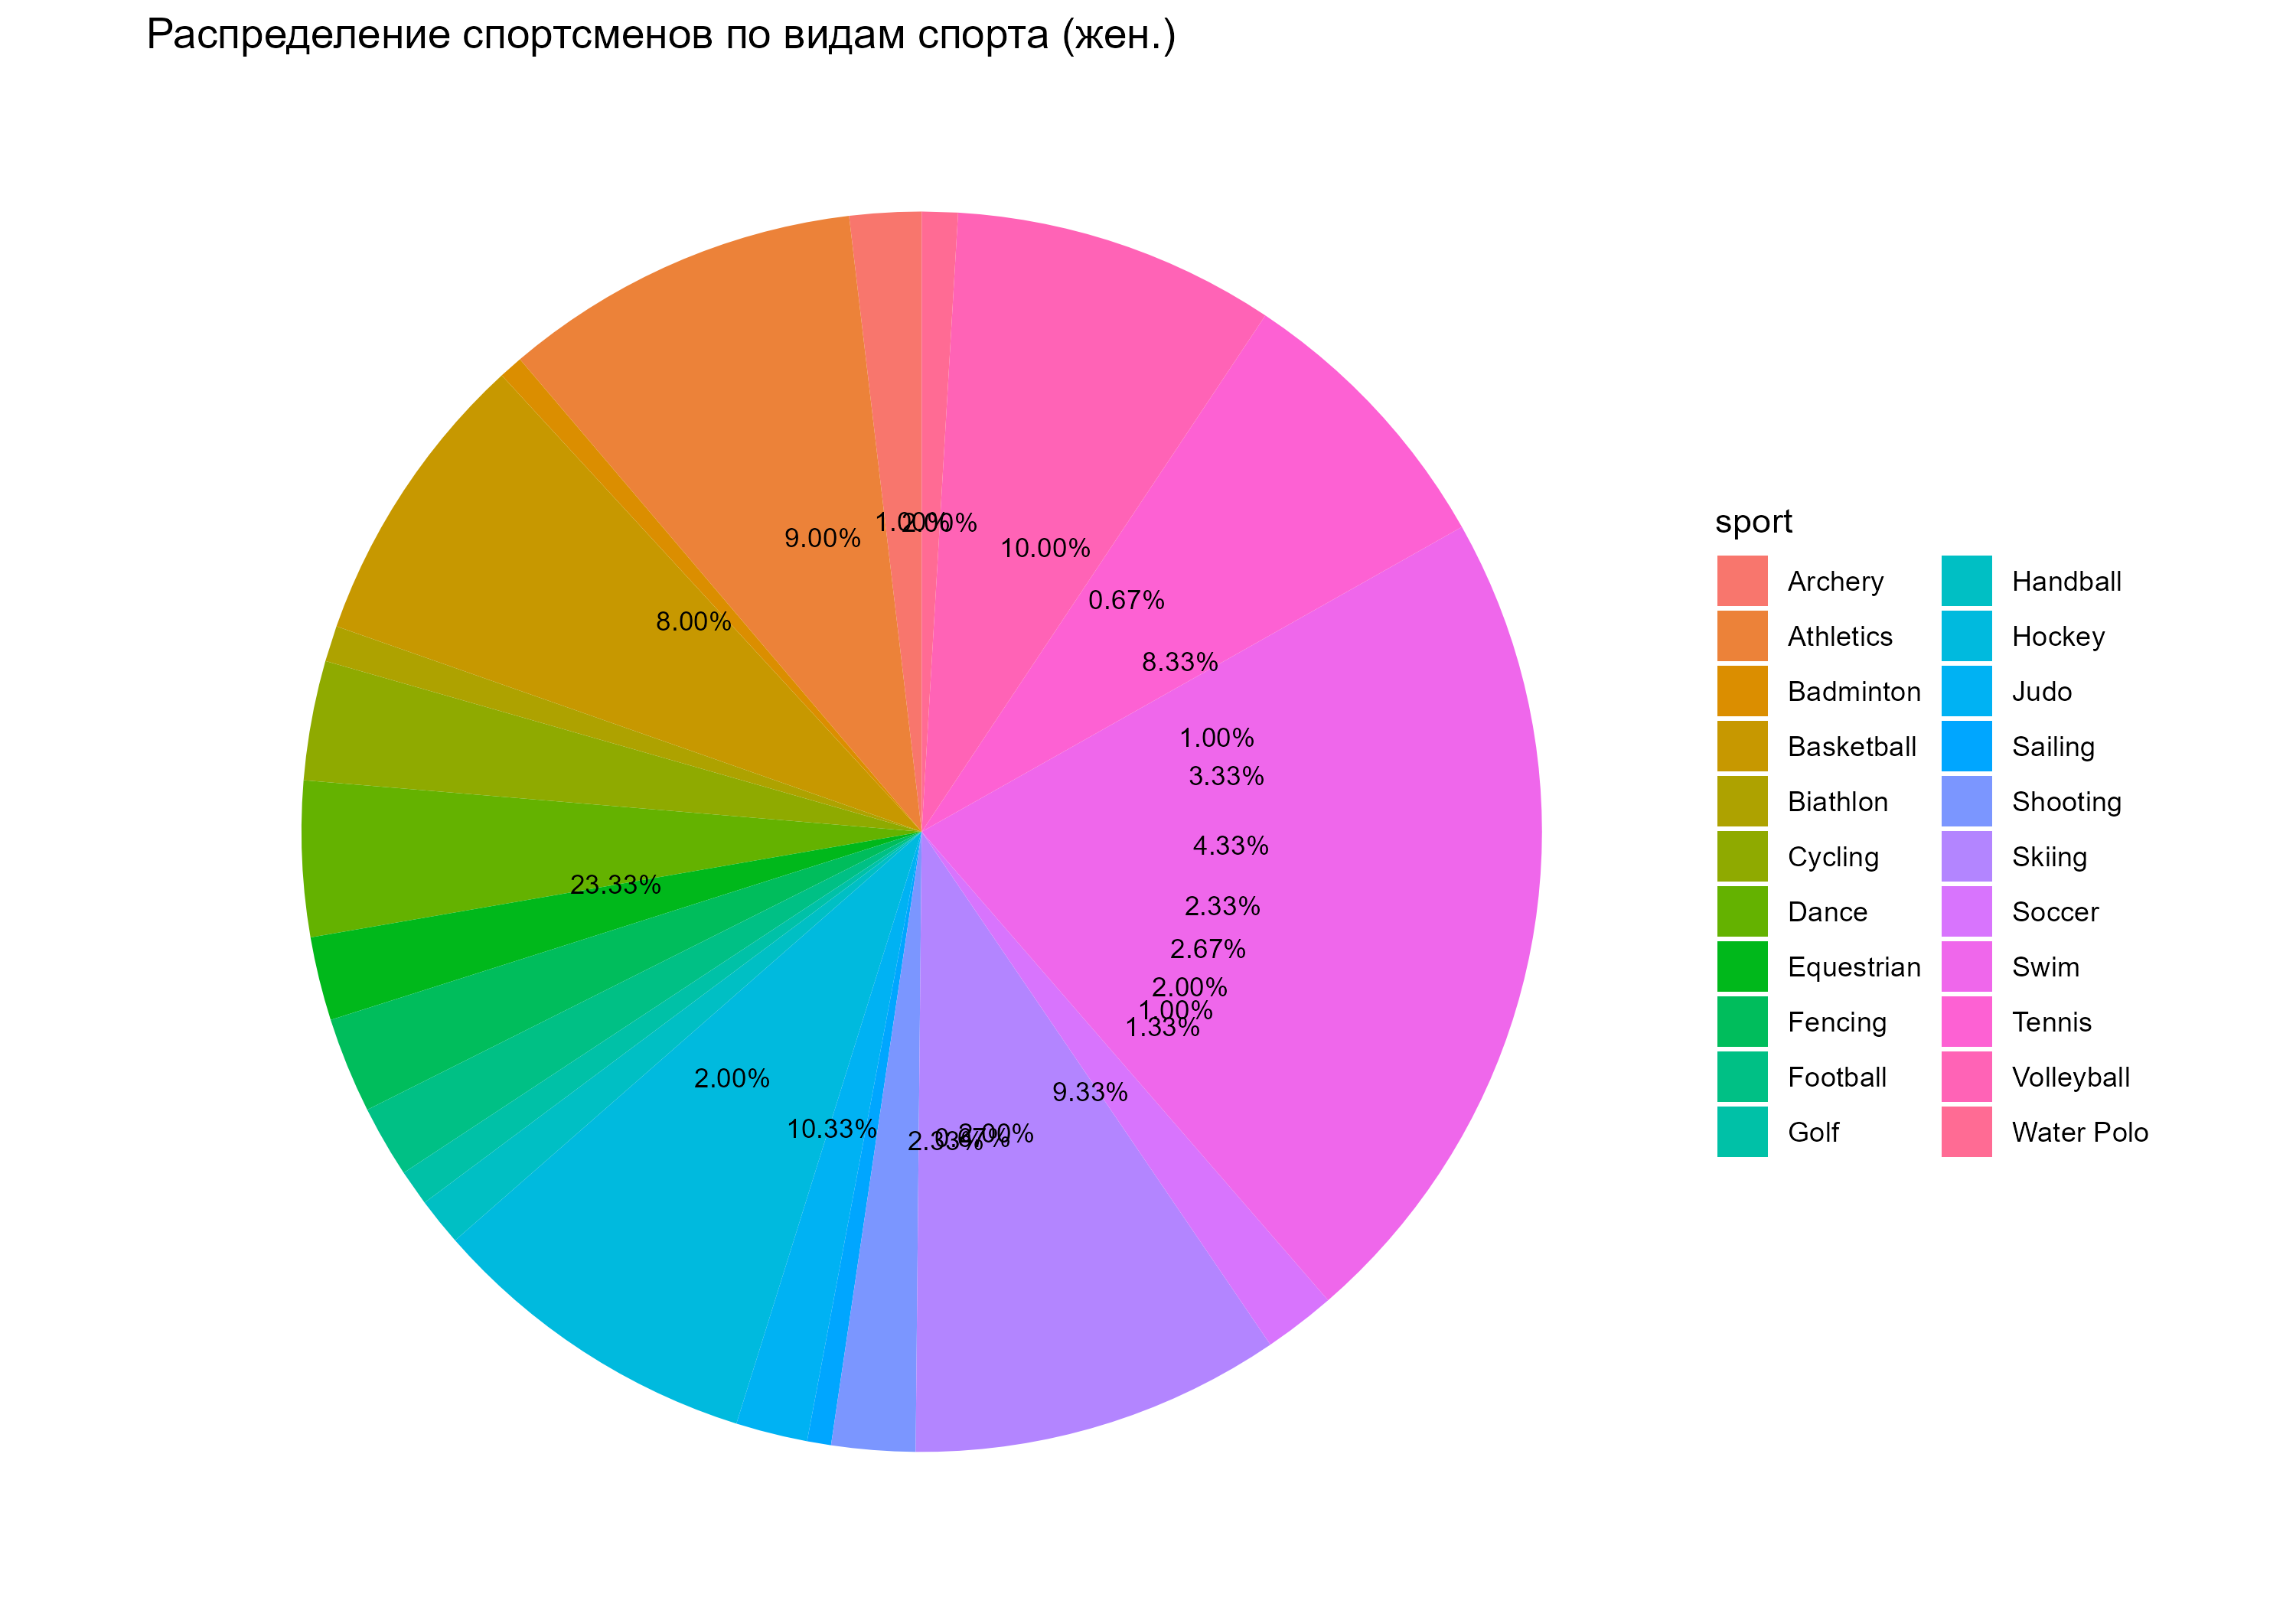

**Метрики** (MAE, MSE)

In [62]:
# Установка необходимых библиотек
# install.packages("Metrics")
library(Metrics)

# Генерация случайных предсказаний
set.seed(123) # для воспроизводимости
f_h_true <- female_df$height # реальные высоты
f_h_predict <- sample(155:226, nrow(female_df), replace = TRUE) # предсказанные высоты

f_w_true <- female_df$weight # реальные веса
f_w_predict <- sample(48:141, nrow(female_df), replace = TRUE) # предсказанные веса

# Вычисление метрик
f_h_mae <- mae(f_h_true, f_h_predict)
f_h_mse <- mse(f_h_true, f_h_predict)

f_w_mae <- mae(f_w_true, f_w_predict)
f_w_mse <- mse(f_w_true, f_w_predict)

# Вывод результатов
cat(sprintf("Вес женщин - MAE: %.2f\n", f_w_mae))
cat(sprintf("Вес женщин - MSE: %.2f\n", f_w_mse))
cat(sprintf("Рост женщин - MAE: %.2f\n", f_h_mae))
cat(sprintf("Рост женщин - MSE: %.2f\n", f_h_mse))


Вес женщин - MAE: 37.49
Вес женщин - MSE: 1961.26
Рост женщин - MAE: 22.93
Рост женщин - MSE: 813.33


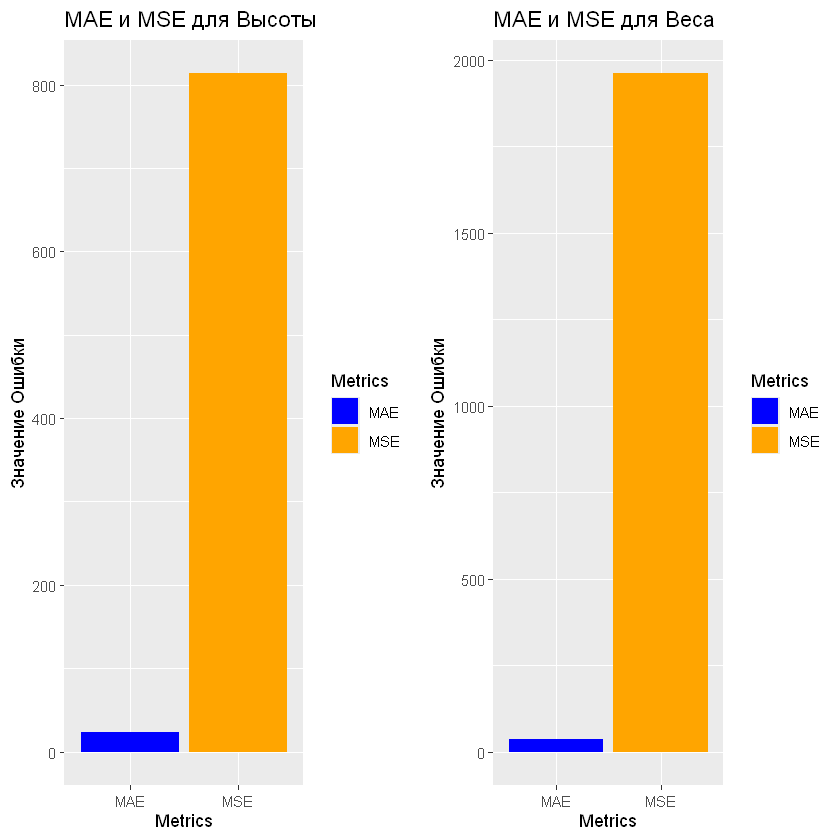

In [63]:
# Установка необходимых библиотек
# install.packages("ggplot2")
library(ggplot2)

# Задаем метрики и значения
metrics <- c('MAE', 'MSE')
h_values <- c(f_h_mae, f_h_mse)
w_values <- c(f_w_mae, f_w_mse)

# Создаем датафрейм для высоты
height_data <- data.frame(Metrics = metrics, Values = h_values)

# Создаем датафрейм для веса
weight_data <- data.frame(Metrics = metrics, Values = w_values)

# Визуализация метрик для высоты
p1 <- ggplot(height_data, aes(x = Metrics, y = Values, fill = Metrics)) +
  geom_bar(stat = "identity") +
  ggtitle("MAE и MSE для Высоты") +
  ylab("Значение Ошибки") +
  scale_fill_manual(values = c("blue", "orange"))

# Визуализация метрик для веса
p2 <- ggplot(weight_data, aes(x = Metrics, y = Values, fill = Metrics)) +
  geom_bar(stat = "identity") +
  ggtitle("MAE и MSE для Веса") +
  ylab("Значение Ошибки") +
  scale_fill_manual(values = c("blue", "orange"))

# Отображение графиков
library(gridExtra)
grid.arrange(p1, p2, ncol = 2)


 **Нормализуем данные (для теста) с помощью MinMaxScaler**

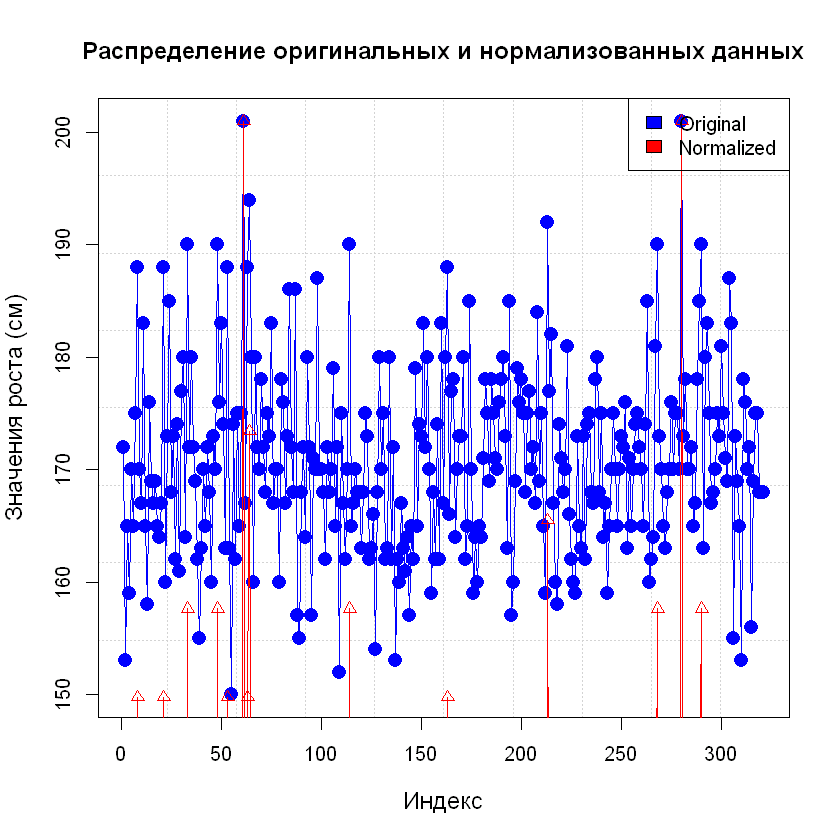

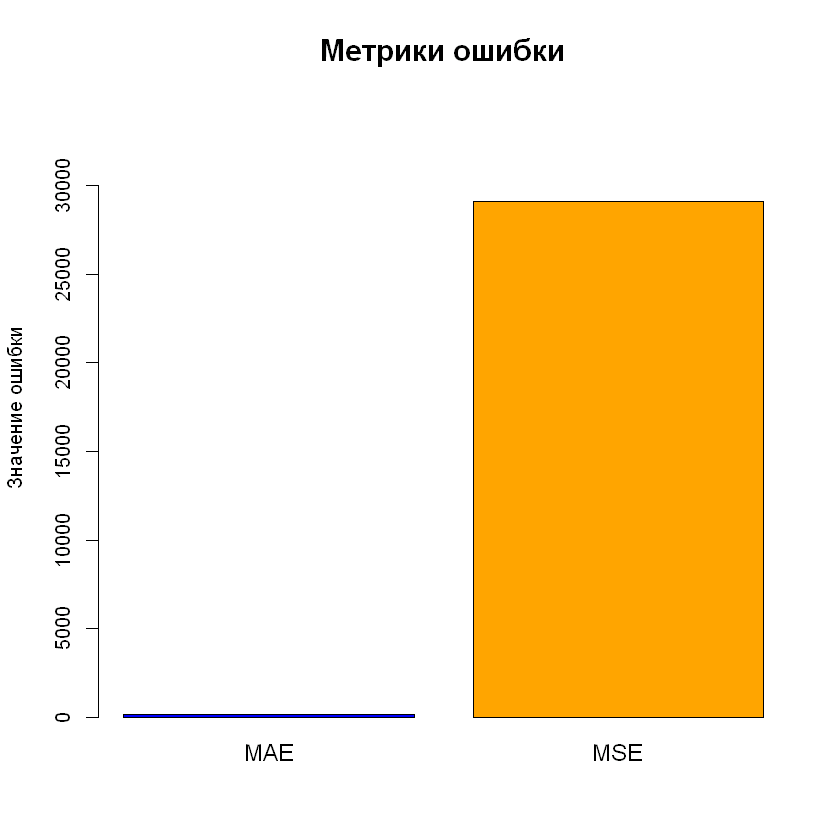

In [65]:
# install.packages("ggplot2")
# install.packages("scales")
library(ggplot2)
library(scales)

# Нормализация данных с использованием Min-Max Scaler
normalized_female_height <- rescale(female_df$height, to = c(0, 1))

# Подсчет метрик
norm_mae <- mean(abs(female_df$height - normalized_female_height))
norm_mse <- mean((female_df$height - normalized_female_height)^2)

# График распределения оригинальных и нормализованных данных
plot(female_df$height, panel.first = grid(10, 8), type='o', col='blue', ylim=c(min(female_df$height), max(female_df$height)), 
     main='Распределение оригинальных и нормализованных данных', 
     xlab='Индекс', ylab='Значения роста (см)', cex=1.5, pch=16, cex.main=1.2, cex.lab=1.2)

points(normalized_female_height * max(female_df$height), type='o', col='red', pch=2)

# Добавление легенды
legend("topright", legend=c("Original", "Normalized"),  
       fill = c("blue","red"))

# Столбчатая диаграмма метрик ошибки
barplot(c(norm_mae, norm_mse), names.arg=c("MAE", "MSE"), col=c("blue", "orange"), 
        main="Метрики ошибки", ylab="Значение ошибки", ylim=c(0, max(norm_mae, norm_mse) * 1.2), 
        cex.main=1.5, cex.names=1.2)

**Вывод:** Заметно, что данные разброшены, явно распределение не нормальное, хоть какие то заметные детали в графиках присутствуют. \
Частые значения у мужчин:

Рост: **180** см 

Вес: **80** кг.

Популярный спорт: **Хоккей**

Частые значения у женщин:ж
Рост: **168** см.

Вес: **60** кг.

Популярный спорт: **Баскетбол** баскетбол)

# 2. Аппроксимация распределений данных с помощью ядерных оценок

**__KDE (Kernel density estimation)__** - непараметрический способ оценки плотности случайной величины. Ядерная оценка плотности является задачей сглаживания данных, когда делается заключение о совокупности, основываясь на конечных выборках данных.

**Построим их отдельно для каждого гендера.**

### Male

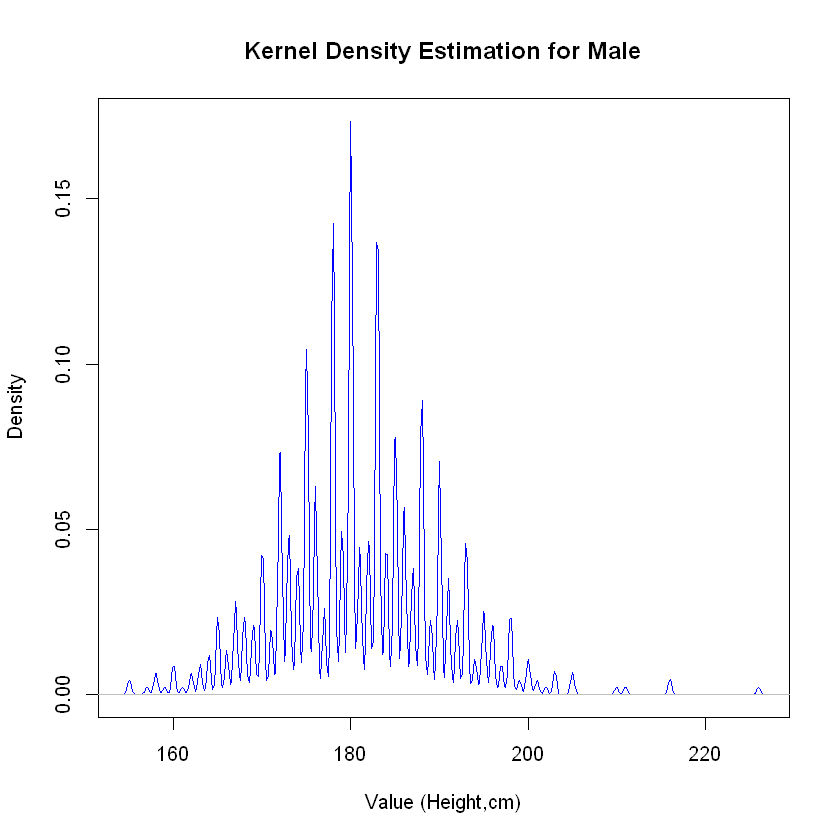

In [70]:
# Загрузка данных
m_data <- male_df$height

# Построение ядерной оценки плотности с указанным шириной окна
kde_0 <- density(m_data, bw = 0.2)

# Построение графика
plot(kde_0, main = "Kernel Density Estimation for Male", 
     xlab = "Value (Height,cm)", ylab = "Density", 
     type = "l", col = "blue")

### Female

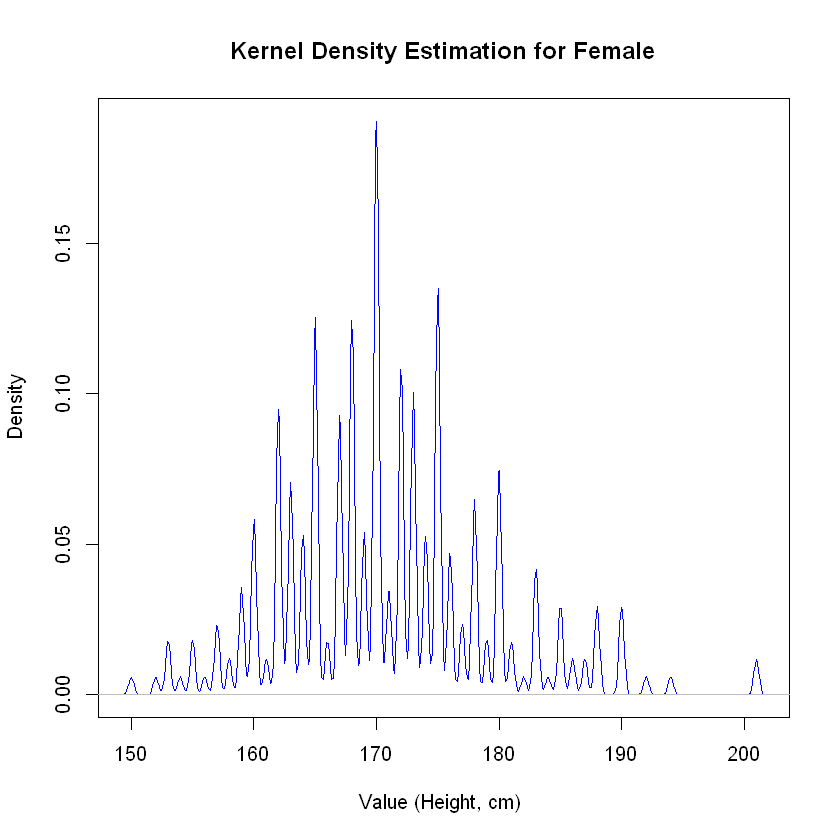

In [72]:
# Загрузка данных
f_data <- female_df$height

# Построение ядерной оценки плотности с указанным шириной окна
kde_1 <- density(f_data, bw = 0.2)

# Построение графика
plot(kde_1, main = "Kernel Density Estimation for Female", 
     xlab = "Value (Height, cm) ", ylab = "Density", 
     type = "l", col = "blue")

# 3. Анализ данных с помощью cdplot, dotchart, boxplot и stripchart

**Cdplot (Conditional Density Plot)** - график условной плотности. Отображает распределение данных в зависимости от категории или значения некоторой переменной.

На оси абцисс отображается непрерывная переменная и на оси ординат условная плотность категориальной переменной. Полезен для понимания того, как распределение непрерывной переменной меняется в зависимости от категориальной переменной.

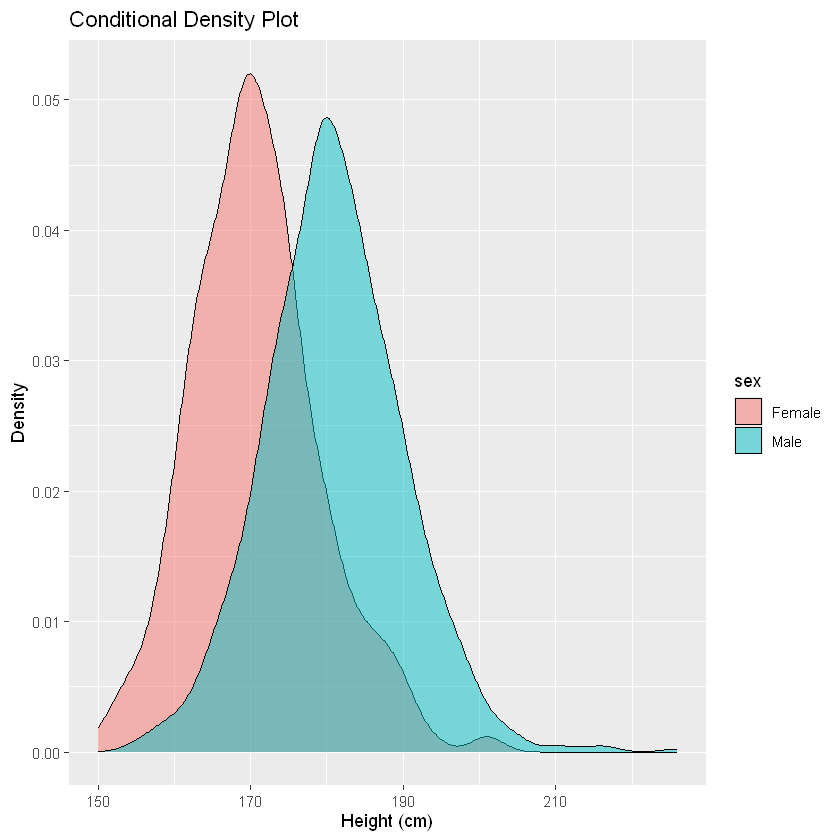

In [75]:
# Сортировка данных по 'weight' 
df_sorted <- df %>% arrange(weight)

# Построение условного графика плотности с заливкой по переменной 'sex' 
ggplot(df_sorted, aes(x = height, fill = sex)) + 
    geom_density(alpha = 0.5) +
    ggtitle('Conditional Density Plot') + 
    xlab('Height (cm)') + 
    ylab('Density')

**Dotchart (Dot Plot)** - точечный график, представляющий данные в виде точек на числовой оси. Показывает распределение данных для выявления возможных закономерностей. 

Хорошо подходит для описания категориальных данных. Позволяет увидеть плотность данных и выбросы.

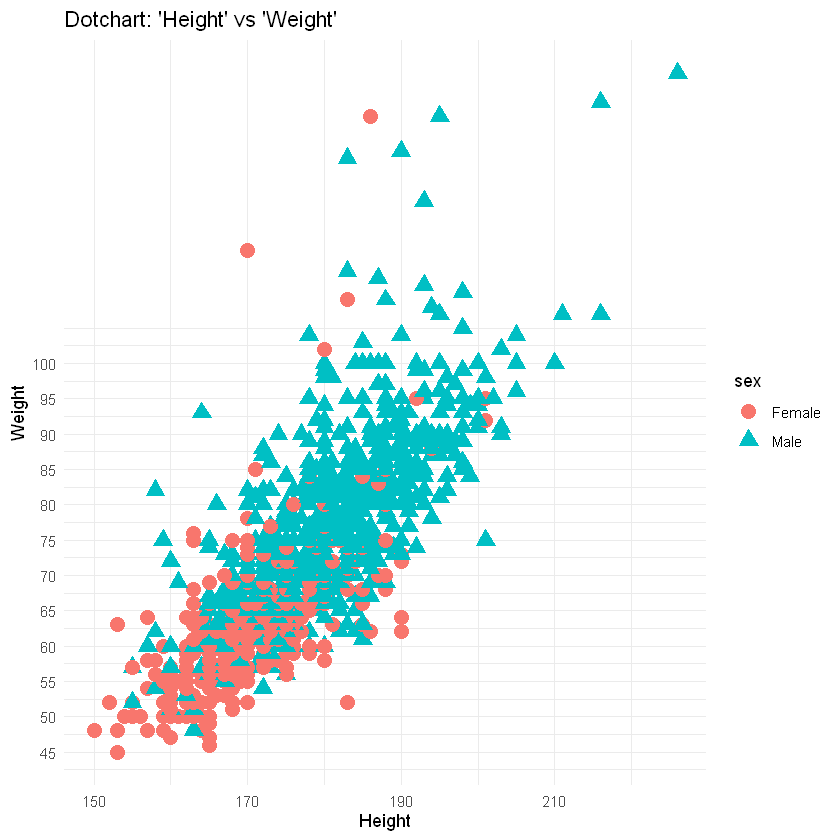

In [78]:
# Построение scatterplot с использованием ggplot2 
ggplot(df_sorted, aes(x = height, y = weight, color = sex, shape =sex)) + 
    geom_point(size = 4) + # размер точек (аналогично s=100 в Python) 
    scale_y_continuous(breaks = seq(15, 100,5)) + # задаем тики по оси Y 
    labs(title = "Dotchart: 'Height' vs 'Weight'", x = "Height", y = "Weight") +
    theme_minimal()

**Boxplot (box-and-whisker plot)** - ящичная диаграмма. График, используемый для визуализации данных через основные статистики: медиану, моду, квартили, минимальные и максимальные значения, выбросы.

Представляет собой прямоугольник, который показывает диапазон значений от первого до третьего квартиля, а линия внутри ящика обозначает медиану. Вертикальные "усы"(whiskers) простираются от ящика до минимального и максимального значения, если они только не являются выбросами. Выбросы изображаются в виде точек.

Показывает, где находятся центральные данные, насколько разбросаны данные, есть ли в них выбросы. Отображает форму распределения и его центр.

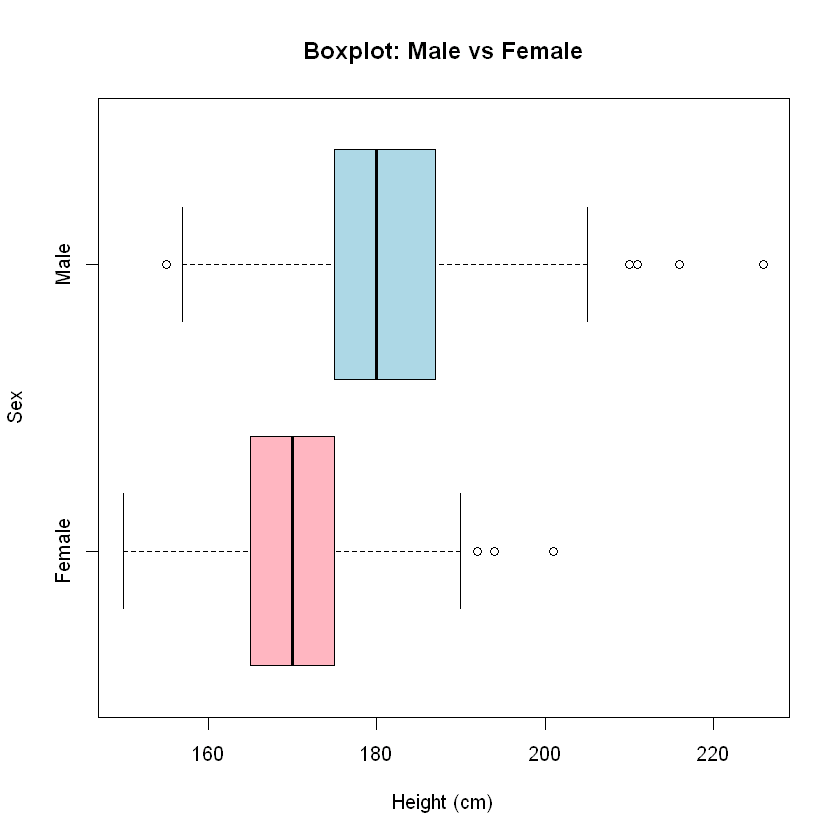

In [80]:
boxplot(height ~ sex, data = df_sorted,
        main = "Boxplot: Male vs Female",
        xlab = 'Height (cm)',
        ylab = 'Sex',
        horizontal = TRUE,
        col = c("lightpink", "lightblue"))

**Проверим выбросы на концах выборок с помощью межквартильного метода IQR**

Идея: получаем $Q1 (< 25\%), Q2 ( < 75\%)$ от всей выборки, далее считаем диапазоне $[Q1 - 1.5IQR, Q3 + 1.5IQR]$

Далее выбросим их из датасета и посмотрим что получится

**Male**

Выбросы:
 211 216 210 216 226 155 155 
Размер данных без выбросов: 822 


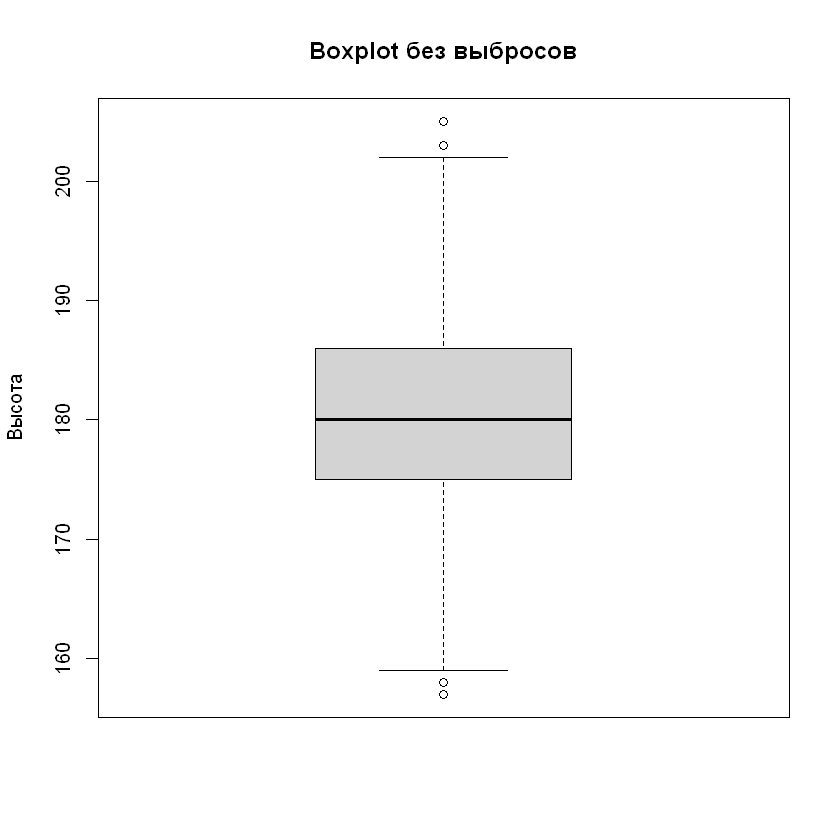

In [83]:
male_Q1 <- quantile(m_data, 0.25)
male_Q3 <- quantile(m_data, 0.75)

male_IQR <- male_Q3 - male_Q1

lower_bound <- male_Q1 - 1.5 * male_IQR
upper_bound <- male_Q3 + 1.5 * male_IQR

m_data_no_outliers <- m_data[m_data >= lower_bound & m_data <= upper_bound]

# Вывод выбросов
male_height_outliers <- m_data[m_data < lower_bound | m_data > upper_bound]
cat("Выбросы:\n", male_height_outliers, "\n")
cat("Размер данных без выбросов:", length(m_data_no_outliers), "\n")

# Построение boxplot
boxplot(m_data_no_outliers, main="Boxplot без выбросов", ylab="Высота")

**Вывод**: выбросы сохранились, соответственно распределения поменялось и диапазон тоже поменялся, в изначальном датасете точки являются выбросами

**Female**

Выбросы:
 201 194 192 201 
Размер данных без выбросов: 317 


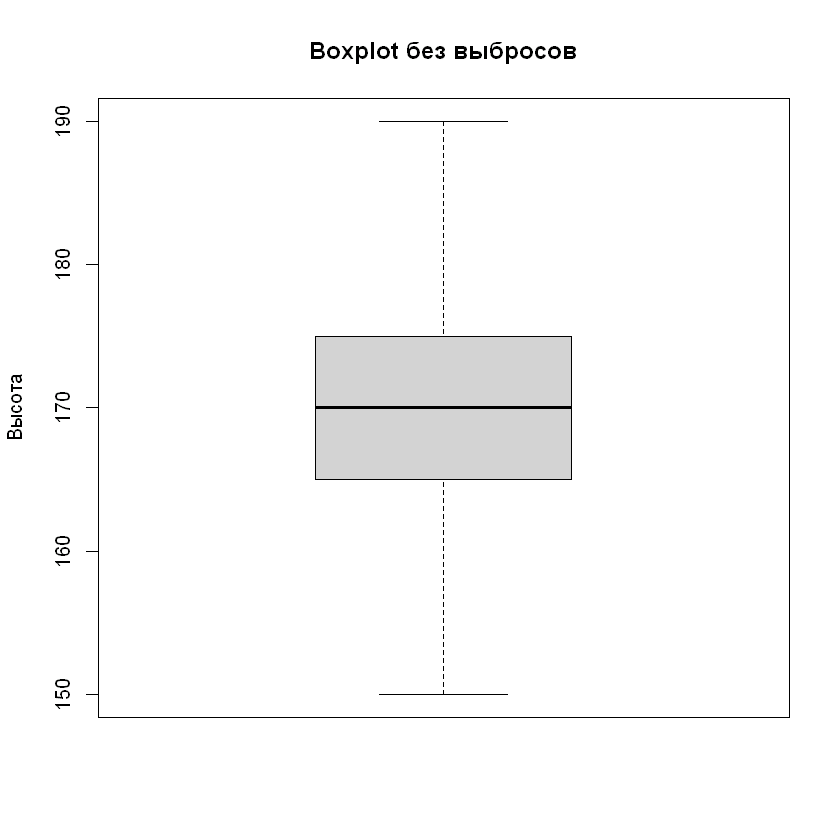

In [86]:
female_Q1 <- quantile(f_data, 0.25)
female_Q3 <- quantile(f_data, 0.75)

female_IQR <- female_Q3 - female_Q1

lower_bound <- female_Q1 - 1.5 * female_IQR
upper_bound <- female_Q3 + 1.5 * female_IQR

f_data_no_outliers <- f_data[f_data >= lower_bound & f_data <= upper_bound]

# Вывод выбросов
female_height_outliers <- f_data[f_data < lower_bound | f_data > upper_bound]
cat("Выбросы:\n", female_height_outliers, "\n")
cat("Размер данных без выбросов:", length(f_data_no_outliers), "\n")

# Построение boxplot
boxplot(f_data_no_outliers, main="Boxplot без выбросов", ylab="Высота")

**Вывод**: Выбросы удалены, в итоге распределение без выбросов, изначальные точки являются выбросами

**Stripchart** - полосовый график. График, где отдельные точки распологаются вдоль оси для каждой категории. 

Близкие значения распологаются на небольшом расстоянии друг от друга, чтобы их было видно. Хорошо подходит для небольших выборок и используется для сравнения распределений между группами. Подобно **_dotchart_** дает представление о плотности данных, но для разных категорий и групп. Очень полезен для выявления кластеров данных.

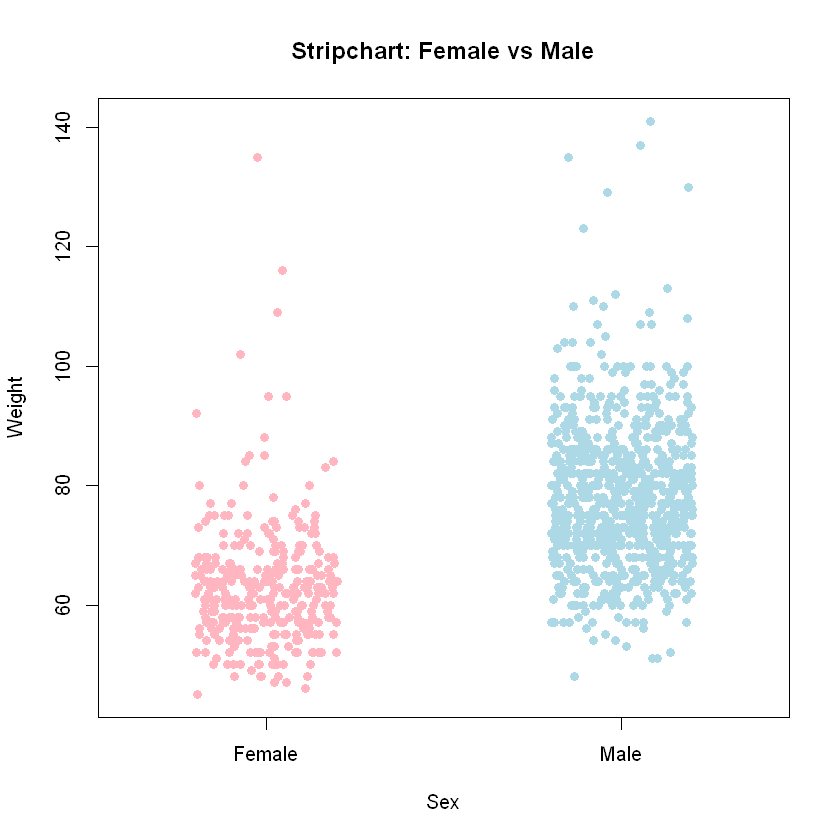

In [89]:
# Факторизуем переменную гендера
df_sorted$sex <- as.factor(df_sorted$sex)

# Построение stripchart
stripchart(weight ~ sex, data = df_sorted, 
       main = "Stripchart: Female vs Male", 
       xlab = "Sex", 
       ylab = "Weight", 
       method = "jitter", # добавляем джиттер для разброса точек
       pch = 19,   # тип точки
       col = c("lightpink", "lightblue"), # цвета для категорий
       vertical = TRUE, # горизонтальная ориентация
       jitter = 0.2) # включение джиттера

# 4. Критерий Граббса и Q-теста Диксона. Визуализация

**Критерий Граббса** - статистический тест, используемый для определения выбросов в одномерной выборке данных, подчиняющихся закону нормального распределения.

**Q-тест Диксона** - статистический тест, использующийся для выявления выбросов и также основывающийся на том, что данные подчиняются нормальному закону распределения, однако как правило его используют на небольших объемах выборки.

**Проведем тест Шапиро-Уилка и Коломгорова-Смирнова для опредeления, является ли распределение выборки роста спортсменов нормальным или нет.**

#### Male

[1] "Non Normal"


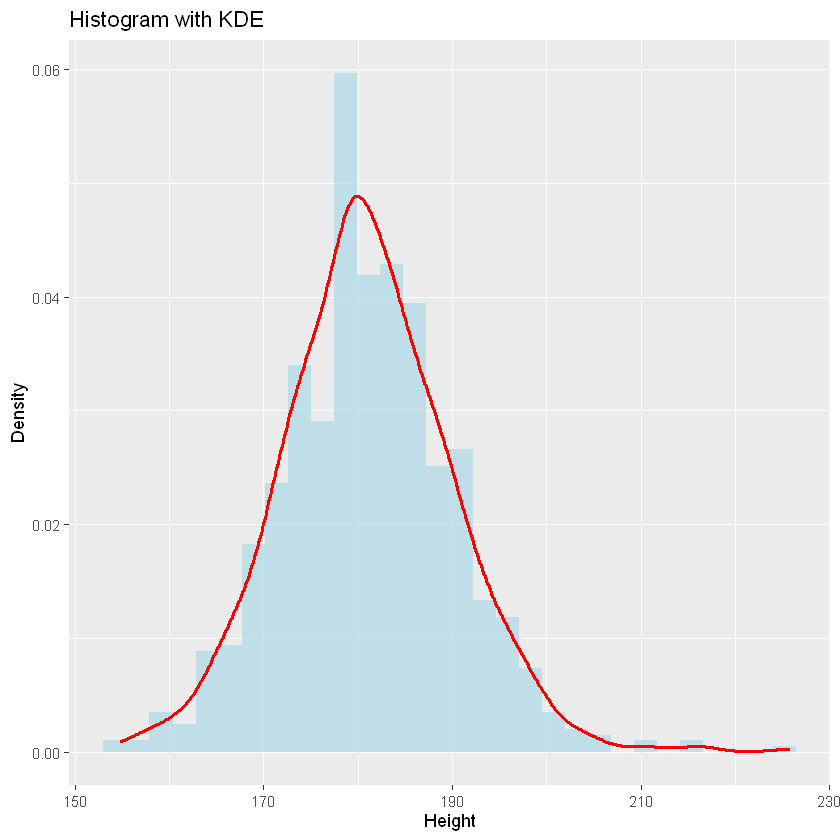

In [95]:
# Выбираем столбец height для мужчин (добавляем небольшой шум, чтобы исключить потвор значений для проведения теста)
male_df_height <- jitter(male_df$height) 

# Построение гистограммы с ядерной оценкой плотности 
ggplot(data.frame(height = male_df_height), aes(x = height)) + 
    geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "lightblue", alpha = 0.7) + 
    geom_density(color = "red", linewidth = 1) + 
    ggtitle("Histogram with KDE") +
    xlab("Height") + 
    ylab("Density") 

# Тест Шапиро-Уилка 
shapiro_test <- shapiro.test(male_df_height) 

# Тест Колмогорова-Смирнова 
ks_test <- ks.test(male_df_height, "pnorm", mean(male_df_height), sd(male_df_height)) 

# Проверка гипотезы о нормальности на уровне значимости 95% 
if (shapiro_test$p.value > 0.05 & ks_test$p.value > 0.05) { 
    print("Normal") 
} else { 
    print("Non Normal") 
}

#### Female

[1] "Non Normal"


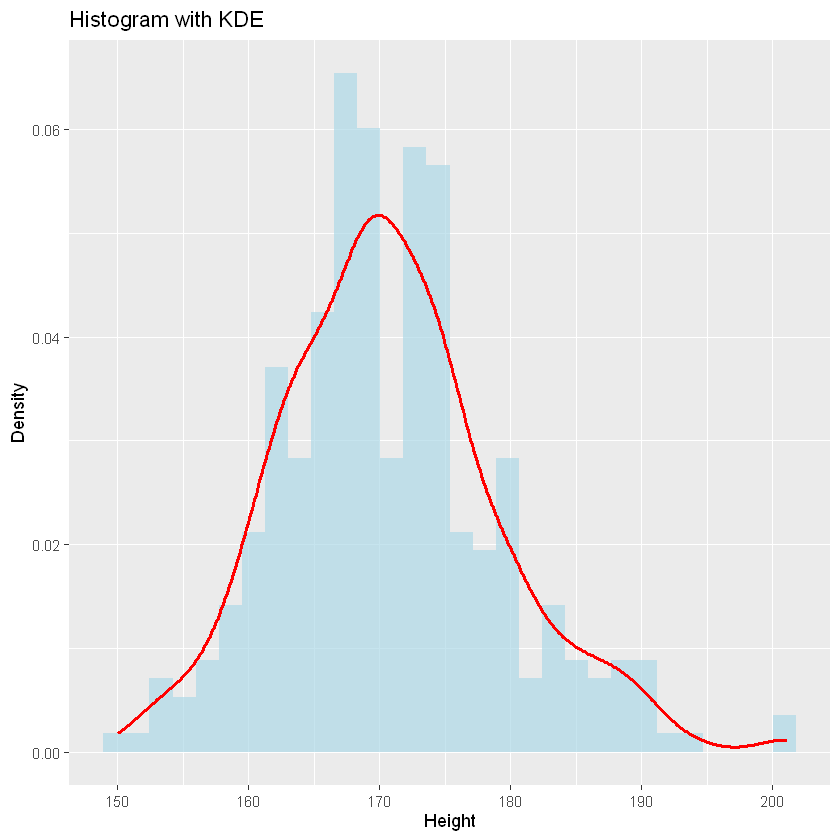

In [97]:
# Выбираем столбец height для женщин (добавляем небольшой шум, чтобы исключить потвор значений для проведения теста)
female_df_height <- jitter(female_df$height) 

# Построение гистограммы с ядерной оценкой плотности 
ggplot(data.frame(height = female_df_height), aes(x = height)) + 
    geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "lightblue", alpha = 0.7) + 
    geom_density(color = "red", linewidth = 1) + 
    ggtitle("Histogram with KDE") +
    xlab("Height") + 
    ylab("Density") 

# Тест Шапиро-Уилка 
shapiro_test <- shapiro.test(female_df_height) 

# Тест Колмогорова-Смирнова 
ks_test <- ks.test(female_df_height, "pnorm", mean(female_df_height), sd(female_df_height)) 

# Проверка гипотезы о нормальности на уровне значимости 95% 
if (shapiro_test$p.value > 0.05 & ks_test$p.value > 0.05) { 
    print("Normal") 
} else { 
    print("Non Normal") 
}

**Распределения не является нормальными -> сгенерируем произвольное нормальное распределение и проведем тесты на нем.**

Сгенерируем различные нормальные распределения для наилучшего визуализирования результатов(стандартное нормальное, нормальное с гауссовским шумом)

In [6]:
# Инициализация гауссовского шума
gaussian_noise <- rnorm(5000, mean = 0, sd = 0.8)

# Инициализация пуассоновского шума и смещение на -15
poisson_noise <- rpois(5000, lambda = 5) - 15

# Генерация стандартного нормального распределения
standard_normal_df <- rnorm(5000, mean = 0, sd = 1)

# Добавление гауссовского шума
normal_with_gauss_noise <- standard_normal_df + gaussian_noise

# Добавление пуассоновского шума
normal_with_poisson_noise <- standard_normal_df + poisson_noise

# Просмотр первых нескольких строк для проверки данных
print("Normal with gaussuan noise:")
head(normal_with_gauss_noise)
print("Normal with poisson noise:")
head(normal_with_poisson_noise)

[1] "Normal with gaussuan noise:"


[1]  0.6384487 -2.7654629  1.7663164  2.0144832 -1.3966377  1.6934177

[1] "Normal with poisson noise:"


[1]  -9.071834 -11.047889  -8.470651  -6.852081  -8.607644 -10.052322

**Для стандартного нормального распределения**

[1] "Normal"


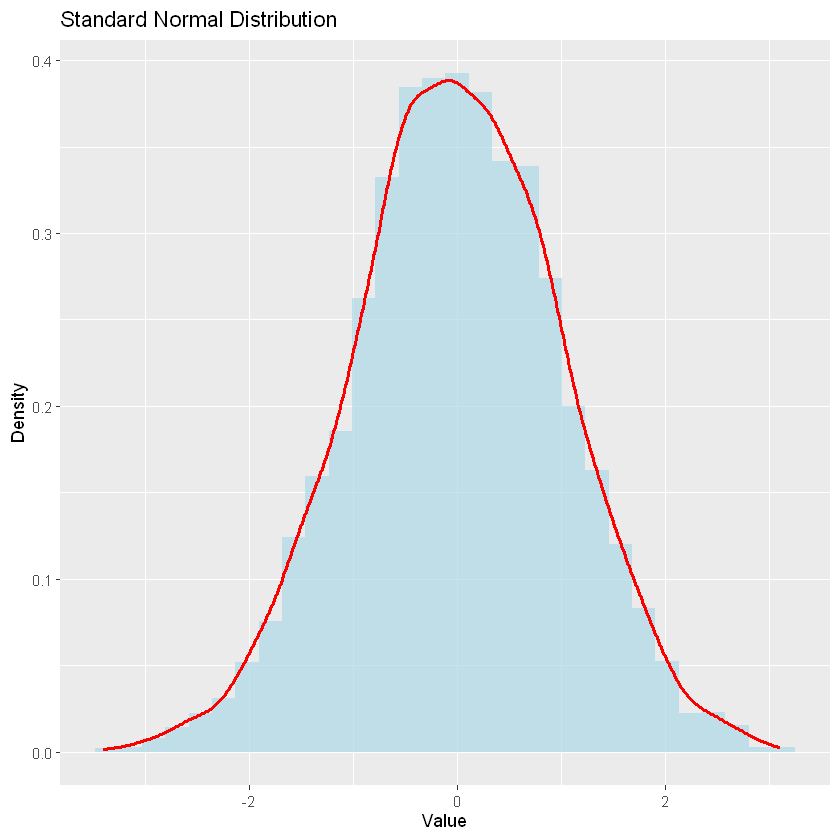

In [101]:
# Построение гистограммы с ядерной оценкой плотности 
ggplot(data.frame(value = standard_normal_df), aes(x =value)) + 
    geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "lightblue", alpha = 0.7) + 
    geom_density(color = "red",linewidth = 1) + ggtitle("Standard Normal Distribution") + 
    xlab("Value") + 
    ylab("Density") 

#Тест Шапиро-Уилка
shapiro_test <- shapiro.test(standard_normal_df) 

# Тест Колмогорова-Смирнова 
ks_test <- ks.test(standard_normal_df,"pnorm", mean = mean(standard_normal_df), sd = sd(standard_normal_df)) 

# Проверка гипотезы о нормальности на уровне значимости 95% 

if (shapiro_test$p.value > 0.05 & ks_test$p.value > 0.05) { 
    print("Normal") 
} else { 
    print("Non Normal") 
}

**Тест Граббса — тест для обнаружения выбросов в наборе данных**. 

!!! Распределение должно быть нормальным !!!

Гипотезы:

**__Нулевая (H0)__** - Выбросов нет

**__Альтернативная (H1)__** - Выбросы есть


Таблица значений теста Граббса: [здесь](http://www.sediment.uni-goettingen.de/staff/dunkl/software/pep-grubbs.pdf)

In [14]:
# Делаем вызов функции тест Граббса

# install.packages("outliers")
library(outliers)

grubbs.test(standard_normal_df, type=10)


	Grubbs test for one outlier

data:  standard_normal_df
G = 3.65628, U = 0.99733, p-value = 0.6341
alternative hypothesis: lowest value -3.66249157963111 is an outlier


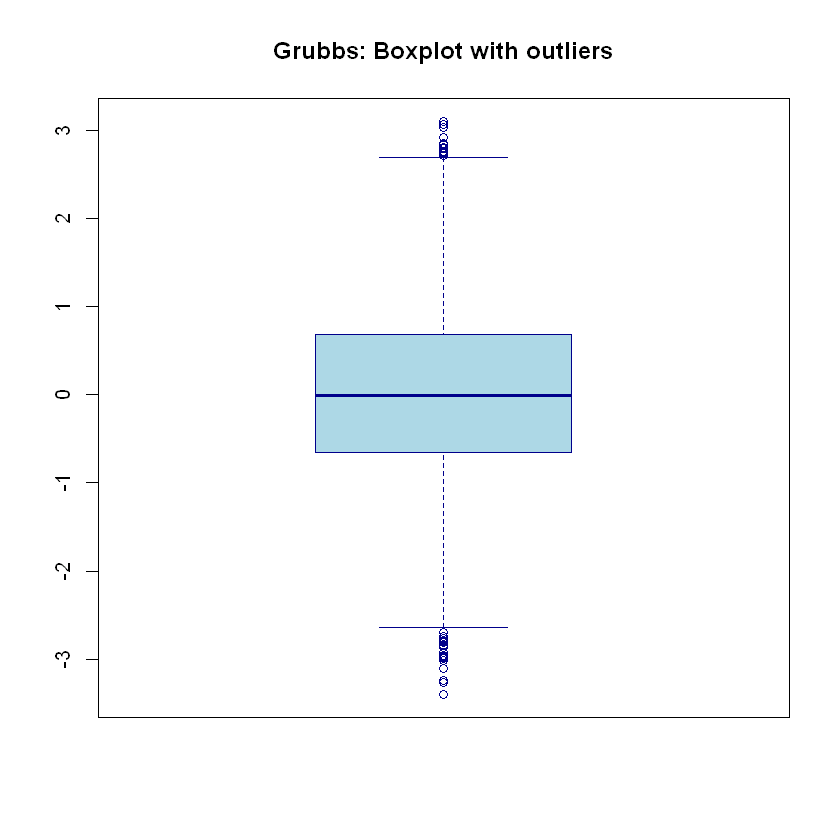

In [105]:
boxplot(standard_normal_df, main = "Grubbs: Boxplot with outliers", 
        col = "lightblue", border = "darkblue", 
        horizontal = FALSE)

In [106]:
# Проверяем выбросы с помощью IQR

Q1 <- quantile(standard_normal_df, 0.25)
Q3 <- quantile(standard_normal_df, 0.75)

IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR
outliers <- standard_normal_df[standard_normal_df < lower_bound | standard_normal_df > upper_bound]

cat("Выбросы:\n", outliers, "\n")
cat("Размерность данных:\n", length(standard_normal_df), "\n")


Выбросы:
 3.067501 -2.839031 -3.402024 3.035185 -2.76781 -2.982696 2.760476 -3.264361 2.802161 2.764186 -2.78372 2.760038 2.842996 2.739274 -2.798698 -3.100815 2.753593 2.719242 2.846159 -2.957171 2.919474 -3.106484 -2.813672 -2.79944 -2.701401 -2.965719 2.789443 -2.787129 -2.994044 -2.866559 -3.244513 2.801104 -3.011115 -2.928049 -2.74342 3.10242 
Размерность данных:
 5000 


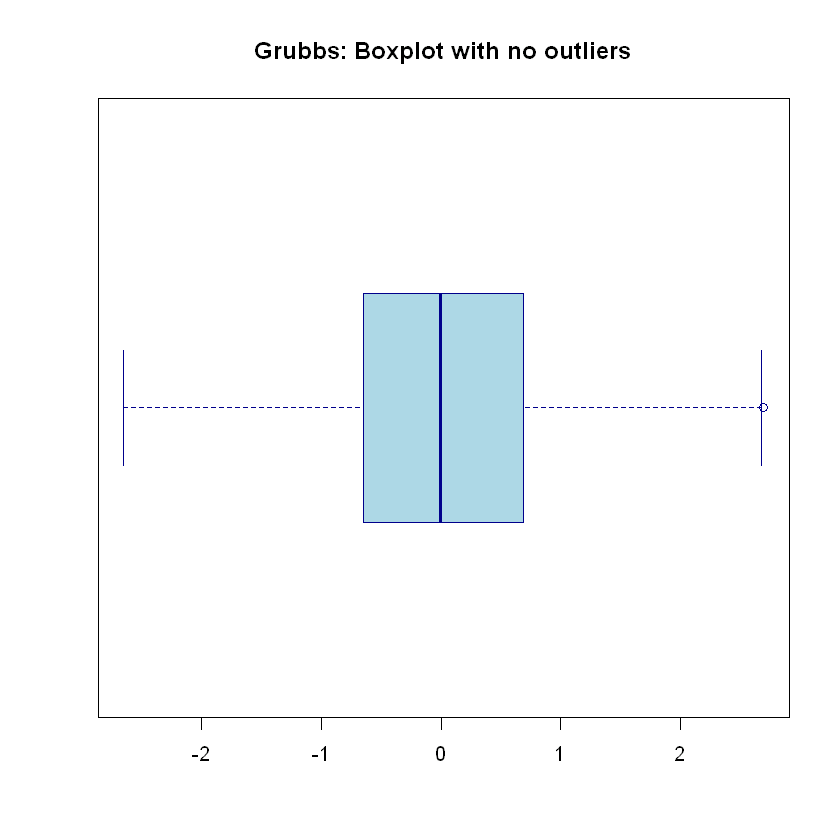

In [107]:
# Формируем датасет без выбросов и сравниваем
standard_normal_df_no_outliers <- standard_normal_df[(standard_normal_df >= lower_bound) & (standard_normal_df <= upper_bound)]

# Построение коробки
boxplot(standard_normal_df_no_outliers, main = "Grubbs: Boxplot with no outliers", 
        col = "lightblue", border = "darkblue", 
        horizontal = TRUE)


In [108]:
cat("Данные с выбросами:\n")
summary(standard_normal_df)
cat("\nДанные без выбросов:\n")
summary(standard_normal_df_no_outliers)

Данные с выбросами:


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.402024 -0.656267 -0.008072 -0.001798  0.688069  3.102420 


Данные без выбросов:


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.642834 -0.649180 -0.007737  0.002048  0.685984  2.692441 

**Вывод**: значения, полученные вне квартилей в начале являются выбросами, причем при применении IQR остались точки, что может говорить о том, что изменилось распределение, следовательно поменялся диапазон, и выбросы поменялись

**Q-Тест Диксона**

Требование: нормальное распределение и отсортированная во возрастанию значений выборка (эффективность теста на небольших размерах выборки 10-30)

Таблица значений Q-Теста Диксона: [здесь](https://guiok.github.io/download/dixon_q_test.pdf)

In [46]:
# Проводим тесты Диксона для выборки размера 10 и 30
dixon.test(head(standard_normal_df, 10))

dixon.test(head(standard_normal_df, 30))


	Dixon test for outliers

data:  head(standard_normal_df, 10)
Q = 0.33258, p-value = 0.3782
alternative hypothesis: lowest value -2.26969977314025 is an outlier



	Dixon test for outliers

data:  head(standard_normal_df, 30)
Q = 0.33235, p-value = 0.199
alternative hypothesis: highest value 2.81228285312459 is an outlier


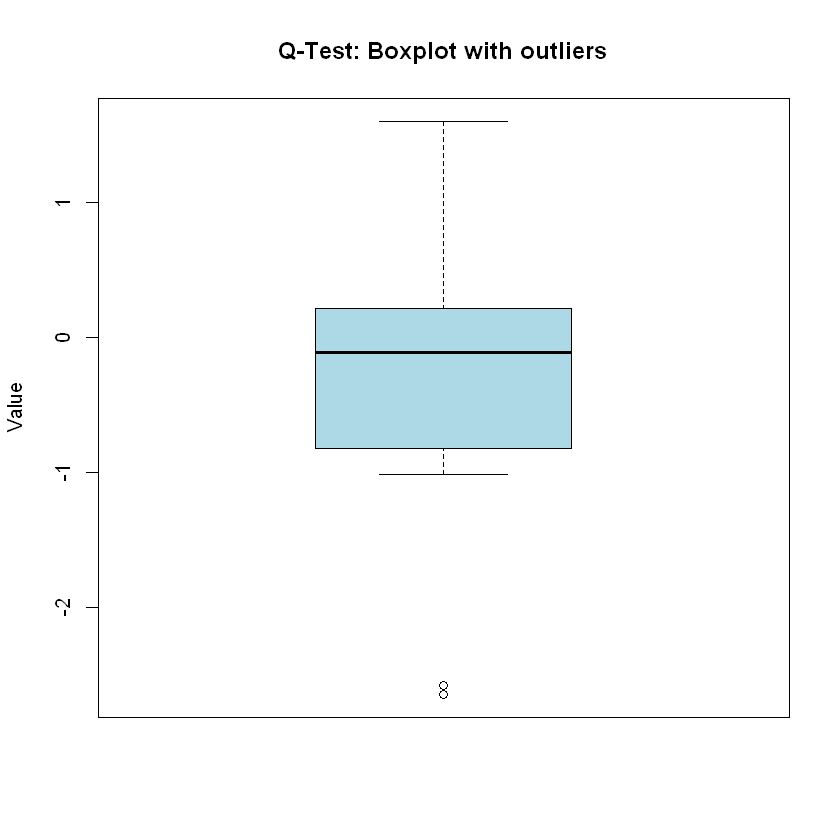

In [115]:
boxplot(standard_normal_df[1:30], main = "Q-Test: Boxplot with outliers", col = 'lightblue', ylab = "Value")

**По аналогии проведем те же самые действия для нормального распределений с шумами** 

**Нормальное распределение с гауссовским шумом**

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


[1] "Normal"


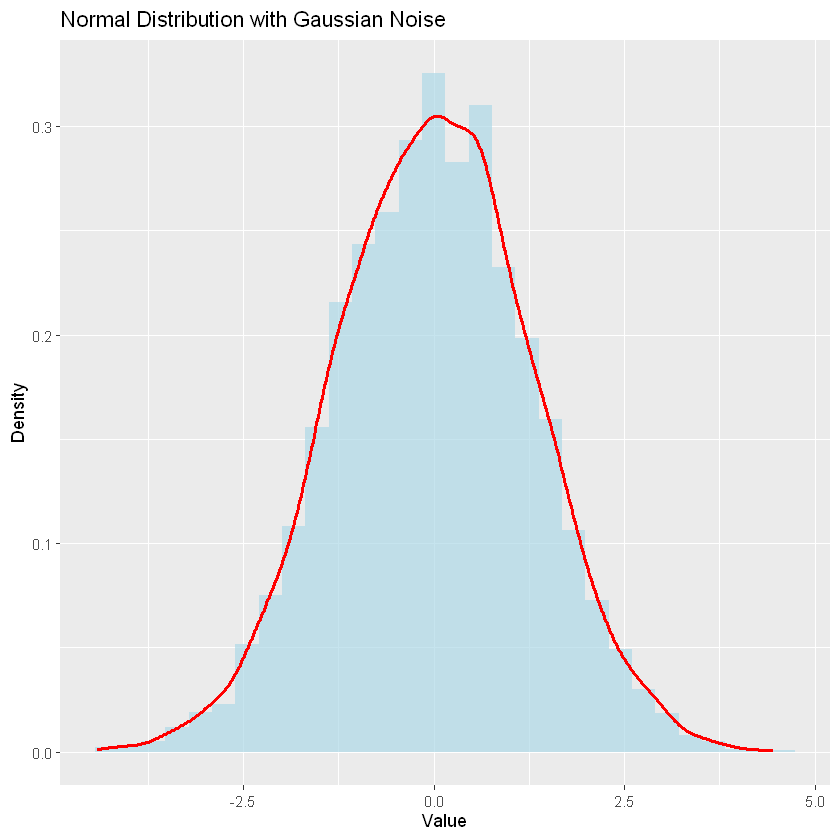

In [119]:
# Построение гистограммы с ядерной оценкой плотности 
ggplot(data.frame(value = normal_with_gauss_noise), aes(x = value)) + 
    geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "lightblue", alpha = 0.7) + 
    geom_density(color = "red", size = 1) + 
    ggtitle("Normal Distribution with Gaussian Noise") + 
    xlab("Value") + 
    ylab("Density") 

#Тест Шапиро-Уилка
shapiro_test <- shapiro.test(normal_with_gauss_noise) 

# Тест Колмогорова-Смирнова 
ks_test <- ks.test(normal_with_gauss_noise, "pnorm", mean = mean(normal_with_gauss_noise), sd = sd(normal_with_gauss_noise)) 

# Проверка гипотезы о нормальности на уровне значимости 95% 

if (shapiro_test$p.value > 0.05 & ks_test$p.value > 0.05) { 
    print("Normal") 
} else { 
    print("Non Normal") 
}

In [121]:
grubbs_test(normal_with_gauss_noise)

Grubbs Calculated Value: 3.521266 
Grubbs Critical Value: 4.413086 
P-Value: 0.9486633 
H0: Выбросов нет


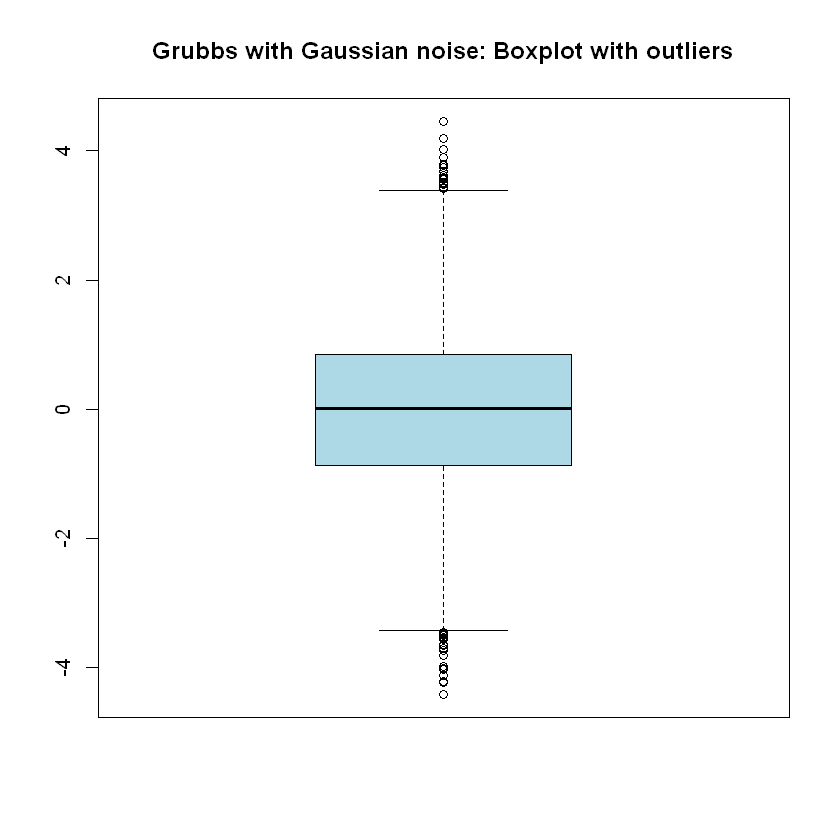

In [122]:
boxplot(normal_with_gauss_noise, main = "Grubbs with Gaussian noise: Boxplot with outliers", col = 'lightblue')

_**Проверка выбросов**_

Выбросы:
 -4.121906 3.792558 -3.48312 -3.664955 3.550677 3.679055 3.595689 3.495817 -3.495794 -3.56592 -4.226928 -3.641732 -4.423127 -3.479158 3.893953 3.750755 -4.032815 -3.811701 -3.739144 3.613363 -3.50001 3.771386 -3.546329 4.458509 4.186471 -3.539439 3.426017 4.026019 -4.010955 -3.987876 3.505297 -3.704261 3.47987 -4.214179 3.572804 -3.453347 3.418591 
Размер данных без выбросов: 4963 


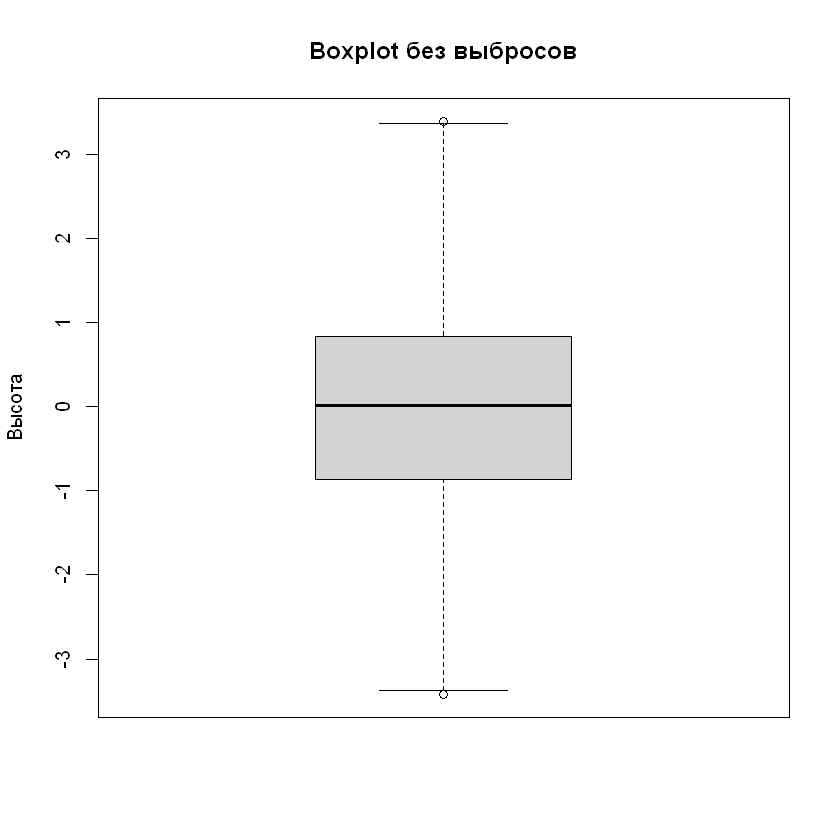

In [124]:
Q1 <- quantile(normal_with_gauss_noise, 0.25)
Q3 <- quantile(normal_with_gauss_noise, 0.75)

IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

normal_data_no_outliers <- normal_with_gauss_noise[normal_with_gauss_noise >= lower_bound & normal_with_gauss_noise <= upper_bound]

# Вывод выбросов
outliers <- normal_with_gauss_noise[normal_with_gauss_noise < lower_bound | normal_with_gauss_noise > upper_bound]
cat("Выбросы:\n", outliers, "\n")
cat("Размер данных без выбросов:", length(normal_data_no_outliers), "\n")

# Построение boxplot
boxplot(normal_data_no_outliers, main="Boxplot без выбросов", ylab="Высота")

In [125]:
cat("Test1:\n")
cat(sprintf("Q-value: %f\n", q_dixon_test(normal_with_gauss_noise[1:10])))
cat("Test2:\n")
cat(sprintf("Q-value: %f\n", q_dixon_test(normal_with_gauss_noise[1:30])))

Test1:
С 95% уверенностью: -4.121906 - не является выбросом
Q-value: 0.462359
Test2:
С 95% уверенностью: -4.121906 - не является выбросом
Q-value: 0.137723


In [126]:
cat("Test3:\n")
cat(sprintf("Q-value: %f\n", q_dixon_test(normal_with_gauss_noise)))

Test3:
С 95% уверенностью: -4.423127 - не является выбросом
Q-value: 0.022090


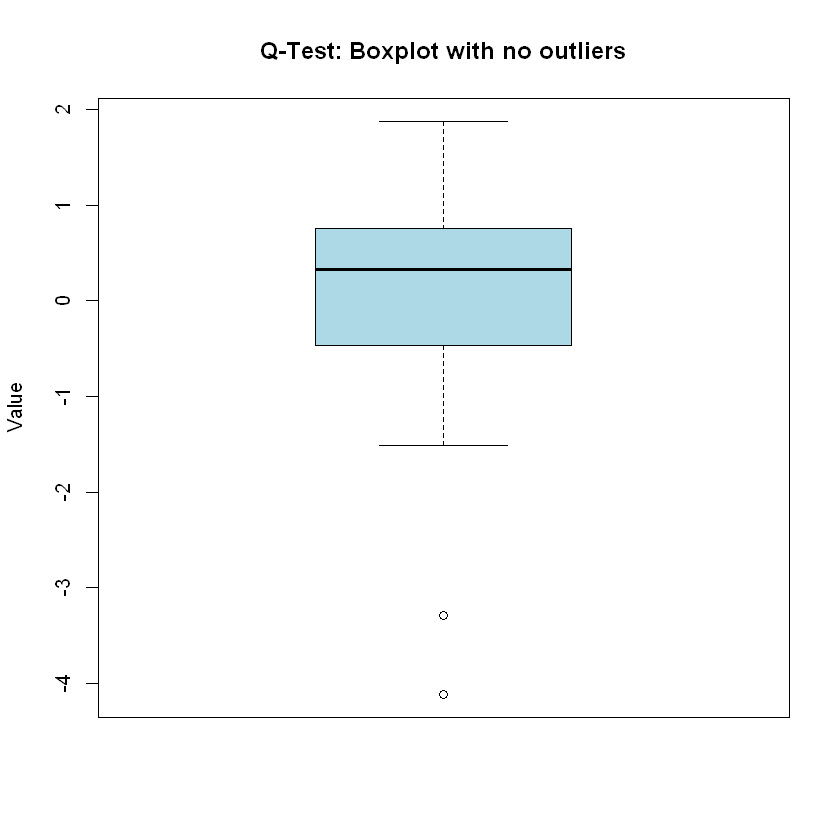

In [128]:
boxplot(normal_with_gauss_noise[1:30], main = "Q-Test: Boxplot with no outliers", col = 'lightblue', ylab = "Value")

**Нормальное распределение с пуассоновским шумом**

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


[1] "Non Normal"


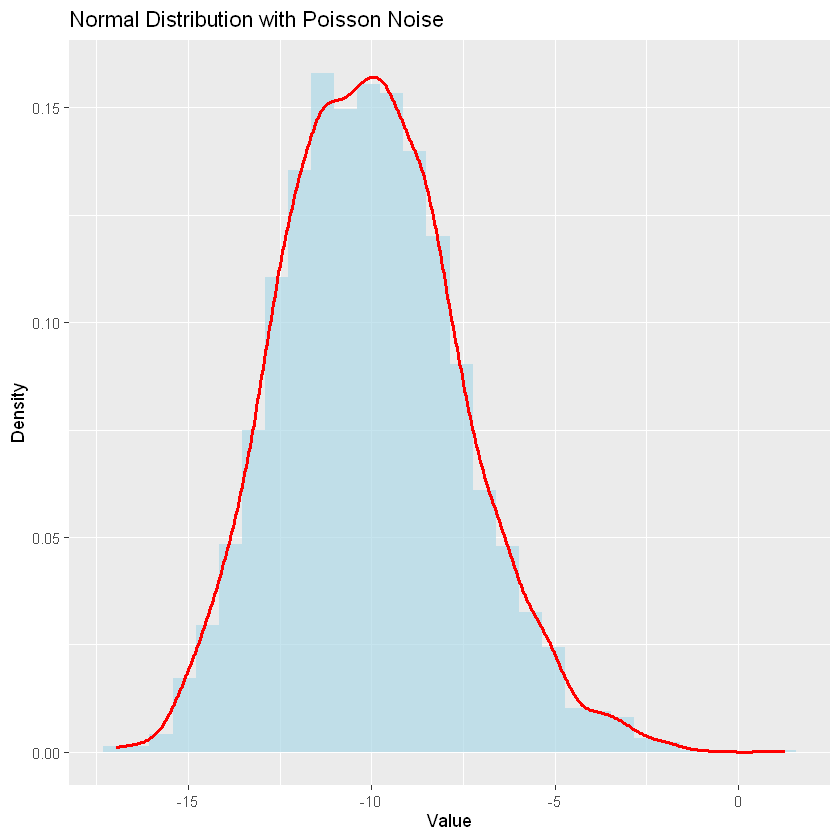

In [130]:
# Построение гистограммы с ядерной оценкой плотности 
ggplot(data.frame(value = normal_with_poisson_noise), aes(x = value)) + 
    geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue", alpha = 0.7) + 
    geom_density(color = "red", size = 1) + 
    ggtitle("Normal Distribution with Poisson Noise") + 
    xlab("Value") + 
    ylab("Density") 

#Тест Шапиро-Уилка
shapiro_test <- shapiro.test(normal_with_poisson_noise) 

# Тест Колмогорова-Смирнова 
ks_test <- ks.test(normal_with_poisson_noise, "pnorm", mean = mean(normal_with_poisson_noise), sd = sd(normal_with_poisson_noise)) 

# Проверка гипотезы о нормальности на уровне значимости 95% 

if (shapiro_test$p.value > 0.05 & ks_test$p.value > 0.05) { 
    print("Normal") 
} else { 
    print("Non Normal") 
}

In [131]:
grubbs_test(normal_with_poisson_noise)

Grubbs Calculated Value: 4.646164 
Grubbs Critical Value: 4.413086 
P-Value: 0.9486633 
H1: Выбросы есть


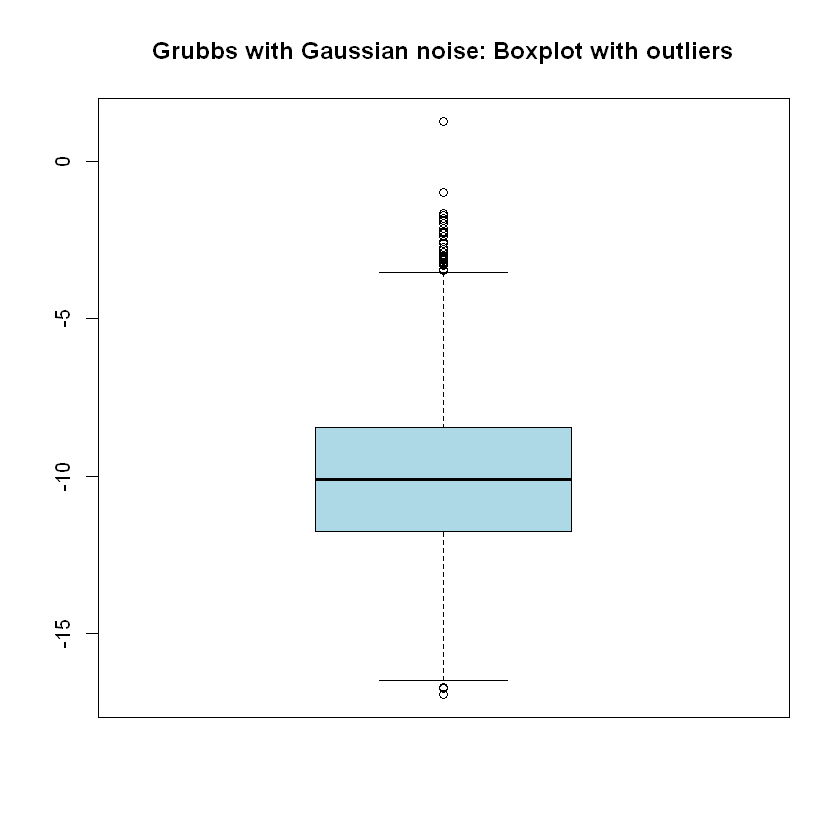

In [132]:
boxplot(normal_with_poisson_noise, main = "Grubbs with Gaussian noise: Boxplot with outliers", col = 'lightblue')

_**Проверка выбросов**_

Выбросы:
 -3.454138 -1.95551 -3.219691 -2.540784 -3.307702 -2.215445 -3.036458 -1.956711 -3.013683 -2.607926 -1.799112 -16.9615 -3.10371 -3.117247 -2.884497 -3.239962 -3.297372 -2.977305 -3.276083 -3.189775 -16.77528 -3.089135 -3.038708 -0.9615061 1.291973 -2.389125 -16.95717 -2.121531 -3.430022 -2.995794 -2.588313 -3.210557 -3.094165 -2.798959 -1.716972 -3.027367 -3.456543 -2.376363 -3.456912 -2.234621 -3.445072 -2.879433 -16.74342 -2.282647 -1.638655 -3.123299 -2.721774 -1.865529 
Размер данных без выбросов: 4952 


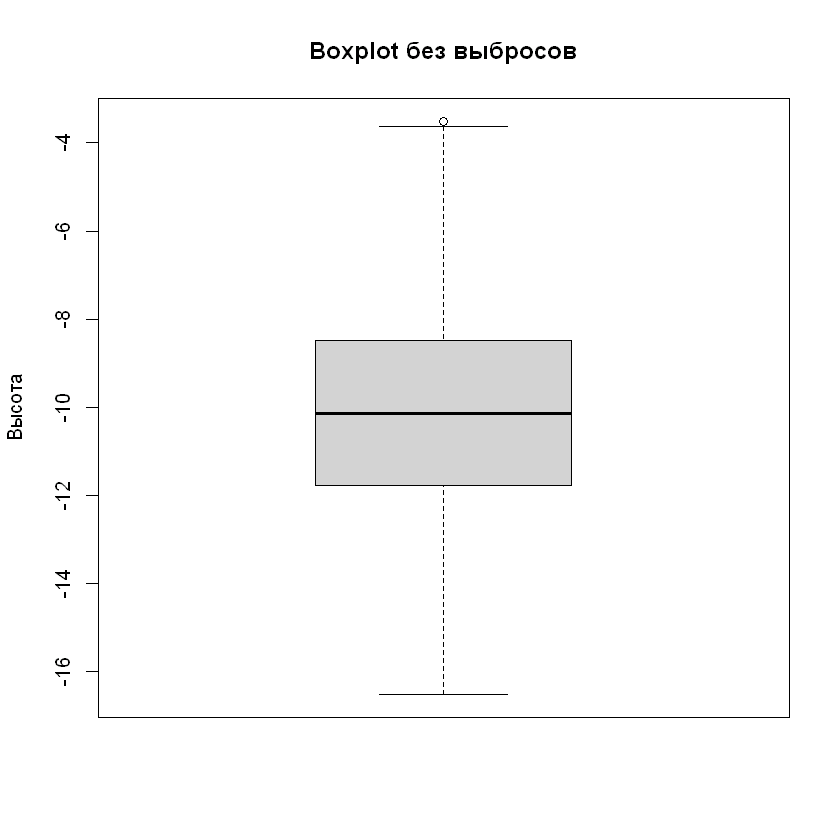

In [134]:
Q1 <- quantile(normal_with_poisson_noise, 0.25)
Q3 <- quantile(normal_with_poisson_noise, 0.75)

IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

normal_data_no_outliers <- normal_with_poisson_noise[normal_with_poisson_noise >= lower_bound & normal_with_poisson_noise <= upper_bound]

# Вывод выбросов
outliers <- normal_with_poisson_noise[normal_with_poisson_noise < lower_bound | normal_with_poisson_noise > upper_bound]
cat("Выбросы:\n", outliers, "\n")
cat("Размер данных без выбросов:", length(normal_data_no_outliers), "\n")

# Построение boxplot
boxplot(normal_data_no_outliers, main="Boxplot без выбросов", ylab="Высота")

In [135]:
cat("Test1:\n")
cat(sprintf("Q-value: %f\n", q_dixon_test(normal_with_poisson_noise[1:10])))
cat("Test2:\n")
cat(sprintf("Q-value: %f\n", q_dixon_test(normal_with_poisson_noise[1:30])))

Test1:
С 95% уверенностью: -13.101810 - не является выбросом
Q-value: 0.035678
Test2:
С 95% уверенностью: -13.821507 - не является выбросом
Q-value: 0.070729


In [136]:
cat("Test3:\n")
cat(sprintf("Q-value: %f\n", q_dixon_test(normal_with_poisson_noise)))

Test3:
С 95% уверенностью: -16.961501 - не является выбросом
Q-value: 0.000237


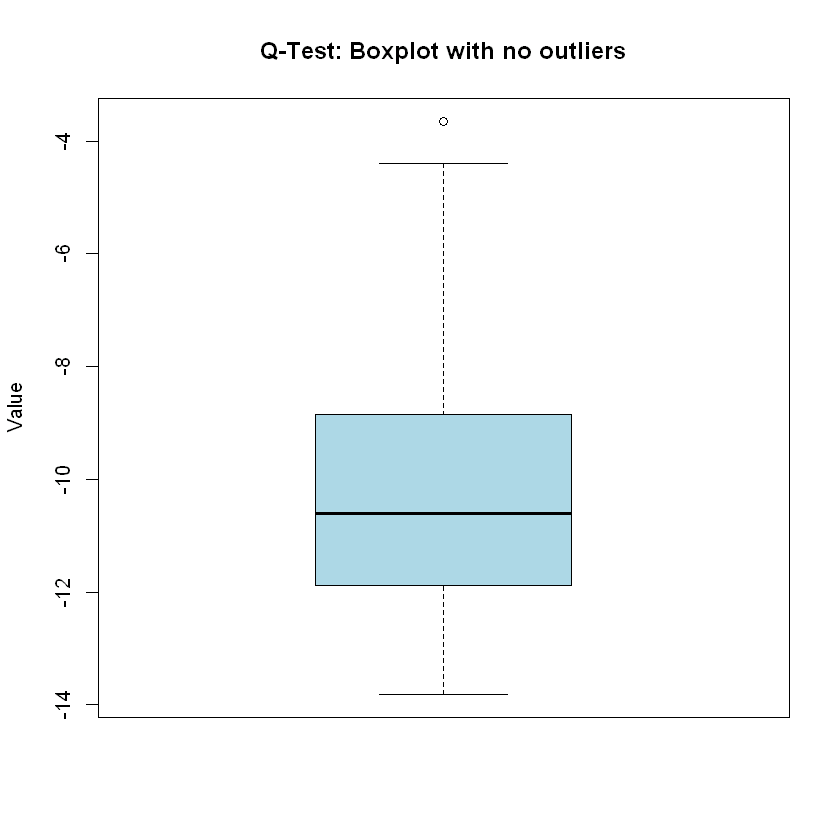

In [138]:
boxplot(normal_with_poisson_noise[1:30], main = "Q-Test: Boxplot with no outliers", col = 'lightblue', ylab = "Value")

**Вывод**: значения, полученные вне квартилей в начале являются выбросами, причем при применении IQR остались точки, что может говорить о том, что изменилось распределение, следовательно поменялся диапазон, и выбросы поменялись.

## 5. Пропуски и сравнение изначальных значений с новыми(с пропусками)

**Вернемся к изначальному датасету про спортсменов и искусственно добавим пропуски**

Далее заполняем исскуственно значения (средним, модой, медианой) и проведем сравнение.

In [142]:
# Текущая информация по всему датасету
str(df)

tibble [1,150 × 11] (S3: tbl_df/tbl/data.frame)
 $ athlete_id   : num [1:1150] 207 99106 100169 4192 11811 ...
 $ name         : chr [1:1150] "Virág Csurgó" "Ronny Yeager" "Galit Chait" "Daniele Zappaterra" ...
 $ sex          : chr [1:1150] "Female" "Male" "Female" "Male" ...
 $ born         : chr [1:1150] "10 November 1972" "16 August 1952" "29 January 1975" "19 September 1955" ...
 $ height       : num [1:1150] 172 181 153 169 180 165 159 176 172 183 ...
 $ weight       : num [1:1150] 63 70 45 64 77 49 60 82 87 80 ...
 $ country      : chr [1:1150] "Hungary" "United States" "Israel" "Italy" ...
 $ country_noc  : chr [1:1150] "HUN" "USA" "ISR" "ITA" ...
 $ description  : chr [1:1150] "Virág Csurgó was a professional Hungarian tennis player who specialised as a doubles player. Csurgó achieved a "| __truncated__ "Ronny Yeager skied for Durango High School and the University of Colorado, from which he graduated in 1972. In "| __truncated__ "Dance: 1994 World Championships (FNR) (with Ma

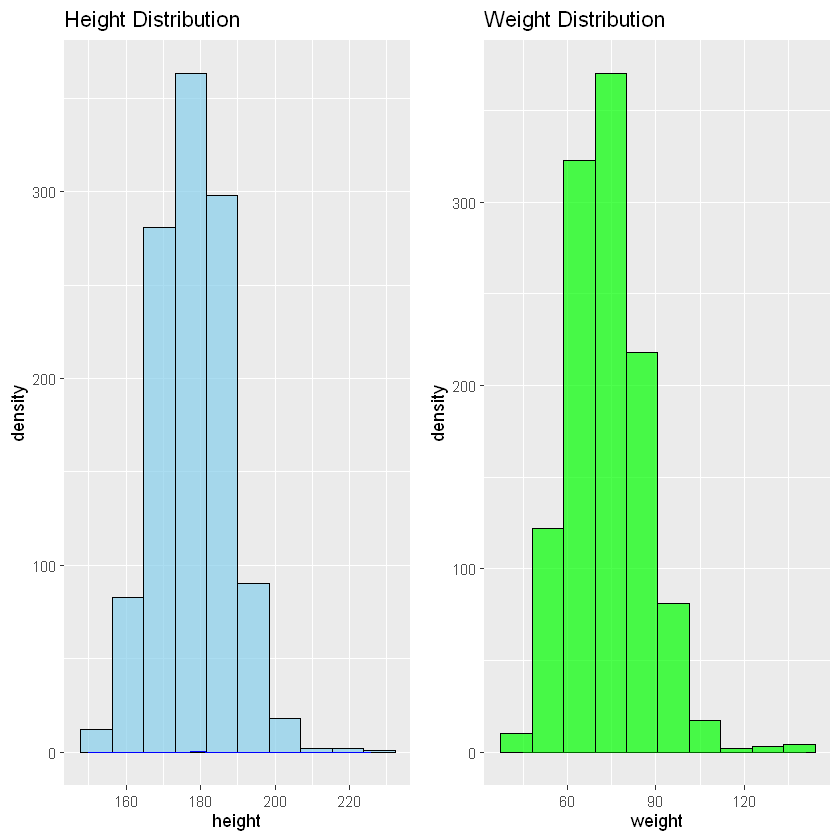

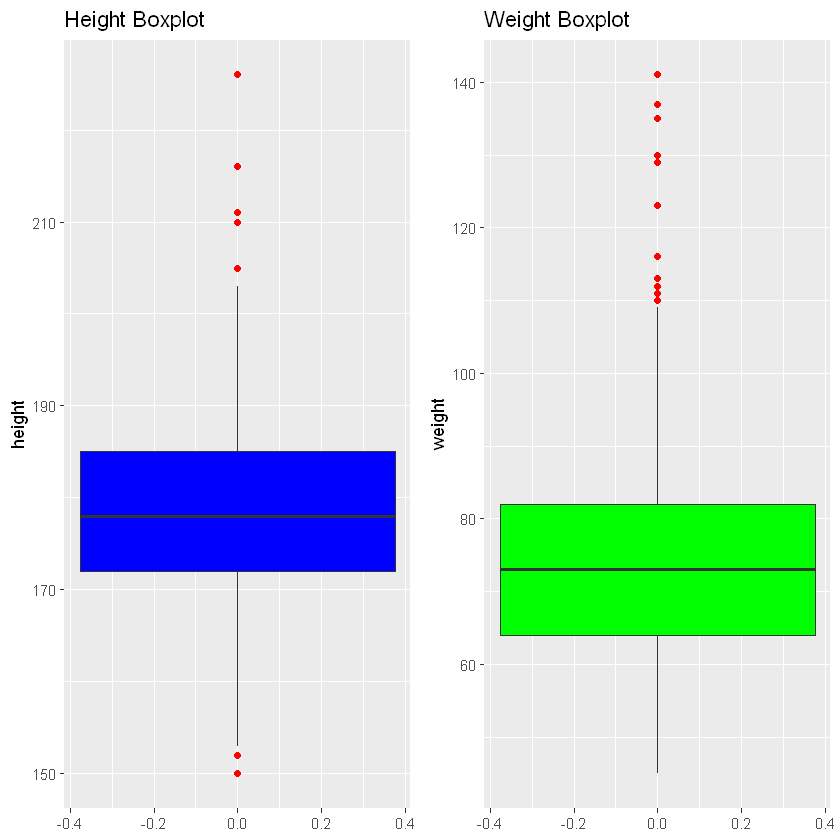

In [143]:
# Создание гистограмм для height и weight
p1 <- ggplot(df, aes(x = height)) + 
  geom_histogram(bins = 10, fill = "skyblue", color = "black", alpha = 0.7) + 
  geom_density(color = "blue") + 
  ggtitle("Height Distribution")

p2 <- ggplot(df, aes(x = weight)) + 
  geom_histogram(bins = 10, fill = "green", color = "black", alpha = 0.7) + 
  geom_density(color = "darkgreen") + 
  ggtitle("Weight Distribution")

# Отображение графиков
grid.arrange(p1, p2, ncol = 2)

# Коробки с выбросами
p3 <- ggplot(df, aes(y = height)) + 
  geom_boxplot(outlier.colour = "red", fill = "blue") + 
  ggtitle("Height Boxplot")

p4 <- ggplot(df, aes(y = weight)) + 
  geom_boxplot(outlier.colour = "red", fill = "green") + 
  ggtitle("Weight Boxplot")

# Отображение коробок с выбросами
grid.arrange(p3, p4, ncol = 2)


In [144]:
# Подсчитываем значения оригинальной таблицы для дальнейшего заполнения пропусков
orig_mean_h <- mean(df$height, na.rm = TRUE)
orig_mean_w <- mean(df$weight, na.rm = TRUE)
orig_mode_h <- as.numeric(names(sort(table(df$height), decreasing = TRUE)[1]))
orig_mode_w <- as.numeric(names(sort(table(df$weight), decreasing = TRUE)[1]))
orig_median_h <- median(df$height, na.rm = TRUE)
orig_median_w <- median(df$weight, na.rm = TRUE)

# Выводим результаты
cat("Среднее роста:", orig_mean_h, "\n")
cat("Среднее веса:", orig_mean_w, "\n")
cat("Мода высоты:", orig_mode_h, "\n")
cat("Мода веса:", orig_mode_w, "\n")
cat("Медиана высоты:", orig_median_h, "\n")
cat("Медиана веса:", orig_median_w, "\n")

Среднее роста: 178.1417 
Среднее веса: 73.65826 
Мода высоты: 180 
Мода веса: 75 
Медиана высоты: 178 
Медиана веса: 73 


__**Тест 1**__ - среднее

In [147]:
# Создадим копии, в которые будем добавлять пропуски
f1_df <- df
f2_df <- df
# Получим описание DataFrame
summary(df)

   athlete_id          name               sex                born          
 Min.   :      3   Length:1150        Length:1150        Length:1150       
 1st Qu.:  33222   Class :character   Class :character   Class :character  
 Median :  54888   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  60729                                                           
 3rd Qu.:  84688                                                           
 Max.   :1005221                                                           
     height          weight         country          country_noc       
 Min.   :150.0   Min.   : 45.00   Length:1150        Length:1150       
 1st Qu.:172.0   1st Qu.: 64.00   Class :character   Class :character  
 Median :178.0   Median : 73.00   Mode  :character   Mode  :character  
 Mean   :178.1   Mean   : 73.66                                        
 3rd Qu.:185.0   3rd Qu.: 82.00                                        
 Max.   :226.0   Max.   :141.00     

In [148]:
# Генерируем случайные индексы для пропусков
set.seed(123)  # Устанавливаем значения для воспроизводимости
nan_indices_to_height1 <- sample(1:nrow(f1_df), 795)
nan_indices_to_weight1 <- sample(1:nrow(f1_df), 924)

# Заполняем столбцы пустыми значениями (пропусками)
f1_df$height[nan_indices_to_height1] <- NA

In [149]:
colSums(is.na(f1_df))

athlete_id          name           sex          born        height 
            0             0             0             0           795 
       weight       country   country_noc   description special_notes 
            0             0             0             0             0 
        sport 
            0

In [150]:
summary(f1_df)

   athlete_id          name               sex                born          
 Min.   :      3   Length:1150        Length:1150        Length:1150       
 1st Qu.:  33222   Class :character   Class :character   Class :character  
 Median :  54888   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  60729                                                           
 3rd Qu.:  84688                                                           
 Max.   :1005221                                                           
                                                                           
     height        weight         country          country_noc       
 Min.   :150   Min.   : 45.00   Length:1150        Length:1150       
 1st Qu.:172   1st Qu.: 64.00   Class :character   Class :character  
 Median :178   Median : 73.00   Mode  :character   Mode  :character  
 Mean   :178   Mean   : 73.66                                        
 3rd Qu.:185   3rd Qu.: 82.00             

**Строим график после внесения пропусков**

Warning message:
"Removed 795 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 795 rows containing non-finite outside the scale range
(`stat_density()`)."


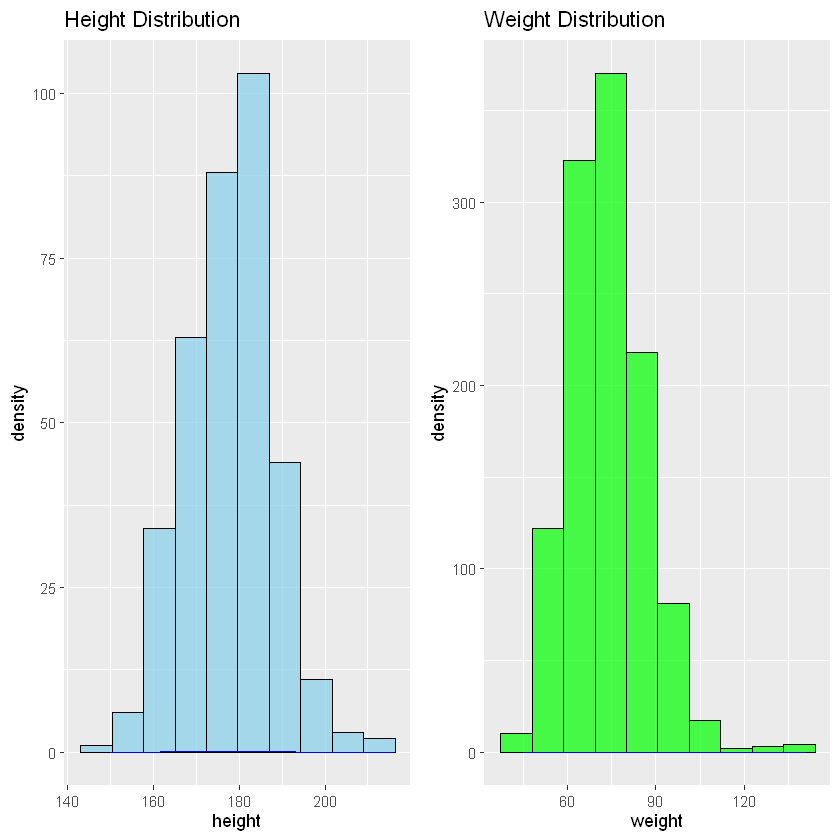

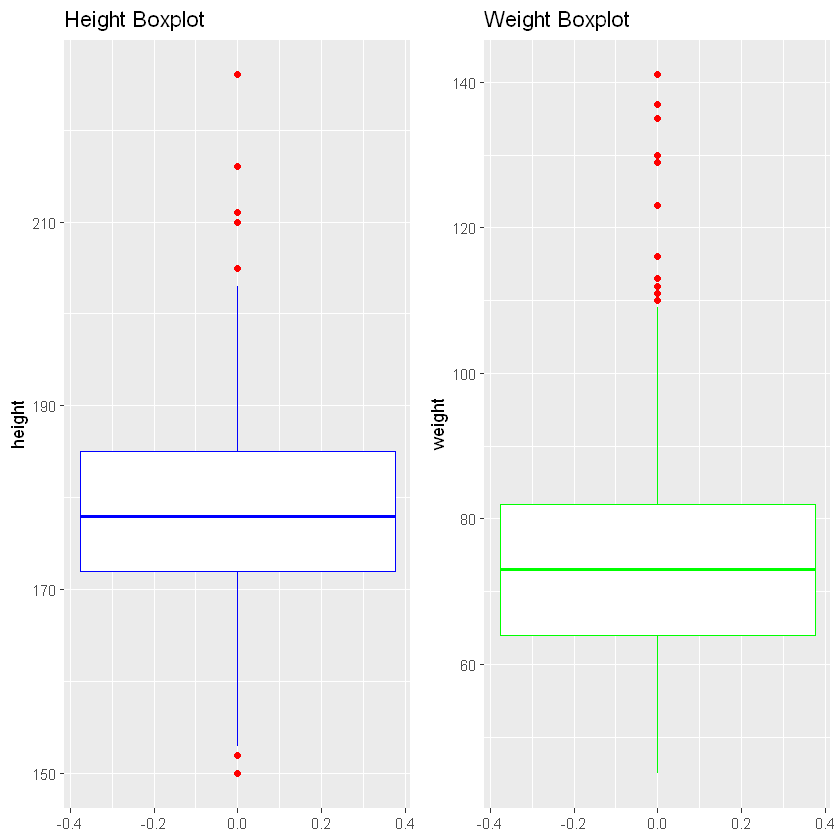

In [152]:
# Гистограмма для height
p1 <- ggplot(f1_df, aes(x = height)) +
  geom_histogram(bins = 10, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(color = "blue") +
  ggtitle("Height Distribution")

# Гистограмма для weight
p2 <- ggplot(f1_df, aes(x = weight)) +
  geom_histogram(bins = 10, fill = "green", color = "black", alpha = 0.7) +
  geom_density(color = "blue") +
  ggtitle("Weight Distribution")

# Отображение графиков
grid.arrange(p1, p2, ncol = 2)

# Коробчатые диаграммы
p3 <- ggplot(df, aes(y = height)) +
  geom_boxplot(color = "blue", outlier.colour = "red") +
  ggtitle("Height Boxplot")

p4 <- ggplot(df, aes(y = weight)) +
  geom_boxplot(color = "green", outlier.colour = "red") +
  ggtitle("Weight Boxplot")

# Отображение коробчатых диаграмм
grid.arrange(p3, p4, ncol = 2)


In [153]:
# Заполнение пропусков средним значением
f1_df$height[nan_indices_to_height1] <- orig_mean_h

# Выводим обновленный датафрейм
print(f1_df)

summary(f1_df)
colSums(is.na(f1_df))

# A tibble: 1,150 × 11
   athlete_id name     sex   born  height weight country country_noc description
        <dbl> <chr>    <chr> <chr>  <dbl>  <dbl> <chr>   <chr>       <chr>      
 1        207 Virág C… Fema… 10 N…   172      63 Hungary HUN         Virág Csur…
 2      99106 Ronny Y… Male  16 A…   178.     70 United… USA         Ronny Yeag…
 3     100169 Galit C… Fema… 29 J…   153      45 Israel  ISR         Dance: 199…
 4       4192 Daniele… Male  19 S…   178.     64 Italy   ITA         Daniele Za…
 5      11811 Jim Day  Male  2 Ju…   178.     77 Canada  CAN         Jim Day jo…
 6      50971 Beth Bo… Fema… 21 M…   178.     49 United… USA         Beth Botsf…
 7      73729 Nelli F… Fema… 6 Ju…   159      60 Nether… NED         Nelli Coom…
 8      95683 Sergey … Male  6 Oc…   178.     82 Soviet… URS         Sergey Myl…
 9      43012 Gallian… Male  17 M…   178.     87 Italy   ITA         A five tim…
10      96377 Sergey … Male  10 S…   178.     80 Unifie… EUN         Sergey Pet…
# ℹ 1

   athlete_id          name               sex                born          
 Min.   :      3   Length:1150        Length:1150        Length:1150       
 1st Qu.:  33222   Class :character   Class :character   Class :character  
 Median :  54888   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  60729                                                           
 3rd Qu.:  84688                                                           
 Max.   :1005221                                                           
     height          weight         country          country_noc       
 Min.   :150.0   Min.   : 45.00   Length:1150        Length:1150       
 1st Qu.:178.1   1st Qu.: 64.00   Class :character   Class :character  
 Median :178.1   Median : 73.00   Mode  :character   Mode  :character  
 Mean   :178.1   Mean   : 73.66                                        
 3rd Qu.:178.1   3rd Qu.: 82.00                                        
 Max.   :216.0   Max.   :141.00     

athlete_id          name           sex          born        height 
            0             0             0             0             0 
       weight       country   country_noc   description special_notes 
            0             0             0             0             0 
        sport 
            0

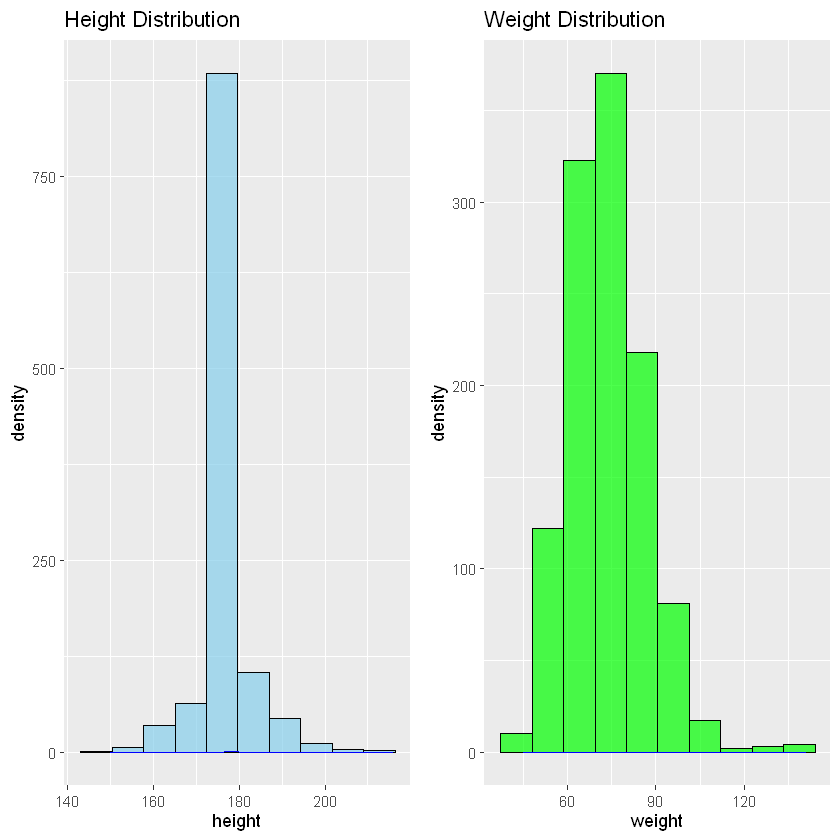

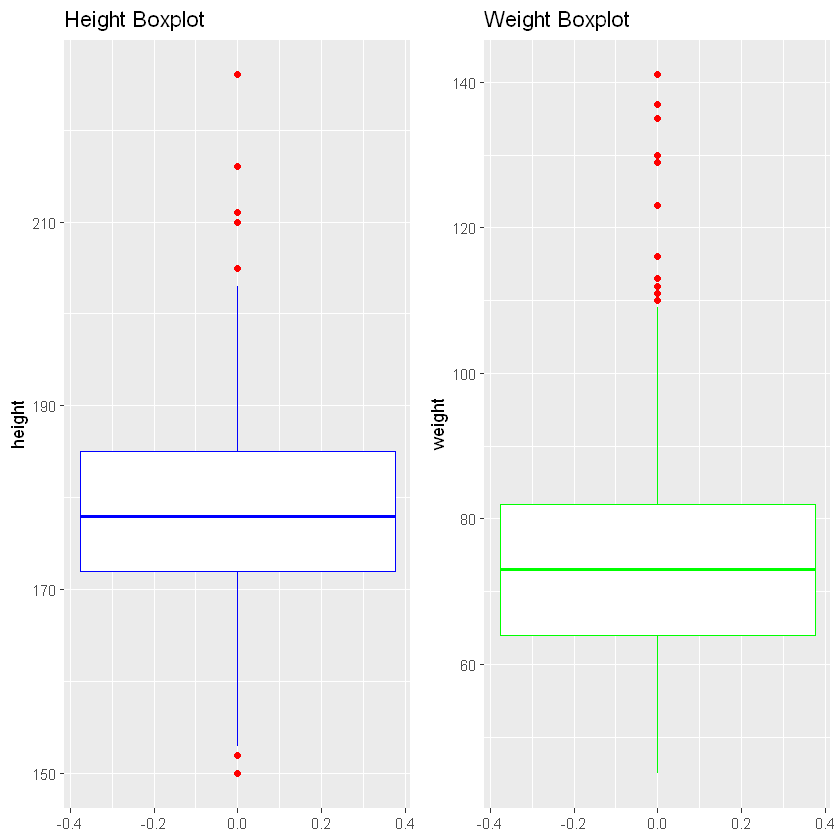

In [154]:
# Гистограмма для height
p1 <- ggplot(f1_df, aes(x = height)) +
  geom_histogram(bins = 10, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(color = "blue") +
  ggtitle("Height Distribution")

# Гистограмма для weight
p2 <- ggplot(f1_df, aes(x = weight)) +
  geom_histogram(bins = 10, fill = "green", color = "black", alpha = 0.7) +
  geom_density(color = "blue") +
  ggtitle("Weight Distribution")

# Отображение графиков
grid.arrange(p1, p2, ncol = 2)

# Коробчатые диаграммы
p3 <- ggplot(df, aes(y = height)) +
  geom_boxplot(color = "blue", outlier.colour = "red") +
  ggtitle("Height Boxplot")

p4 <- ggplot(df, aes(y = weight)) +
  geom_boxplot(color = "green", outlier.colour = "red") +
  ggtitle("Weight Boxplot")

# Отображение коробчатых диаграмм
grid.arrange(p3, p4, ncol = 2)

In [155]:
# Заполняем пропуски в другой столбец
f1_df$weight[nan_indices_to_weight1] <- NA
colSums(is.na(f1_df))

athlete_id          name           sex          born        height 
            0             0             0             0             0 
       weight       country   country_noc   description special_notes 
          924             0             0             0             0 
        sport 
            0

In [156]:
# Заполнили пропуски объема средним
f1_df$weight[nan_indices_to_weight1] <- orig_mean_w
summary(f1_df)

   athlete_id          name               sex                born          
 Min.   :      3   Length:1150        Length:1150        Length:1150       
 1st Qu.:  33222   Class :character   Class :character   Class :character  
 Median :  54888   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  60729                                                           
 3rd Qu.:  84688                                                           
 Max.   :1005221                                                           
     height          weight         country          country_noc       
 Min.   :150.0   Min.   : 45.00   Length:1150        Length:1150       
 1st Qu.:178.1   1st Qu.: 73.66   Class :character   Class :character  
 Median :178.1   Median : 73.66   Mode  :character   Mode  :character  
 Mean   :178.1   Mean   : 73.78                                        
 3rd Qu.:178.1   3rd Qu.: 73.66                                        
 Max.   :216.0   Max.   :137.00     

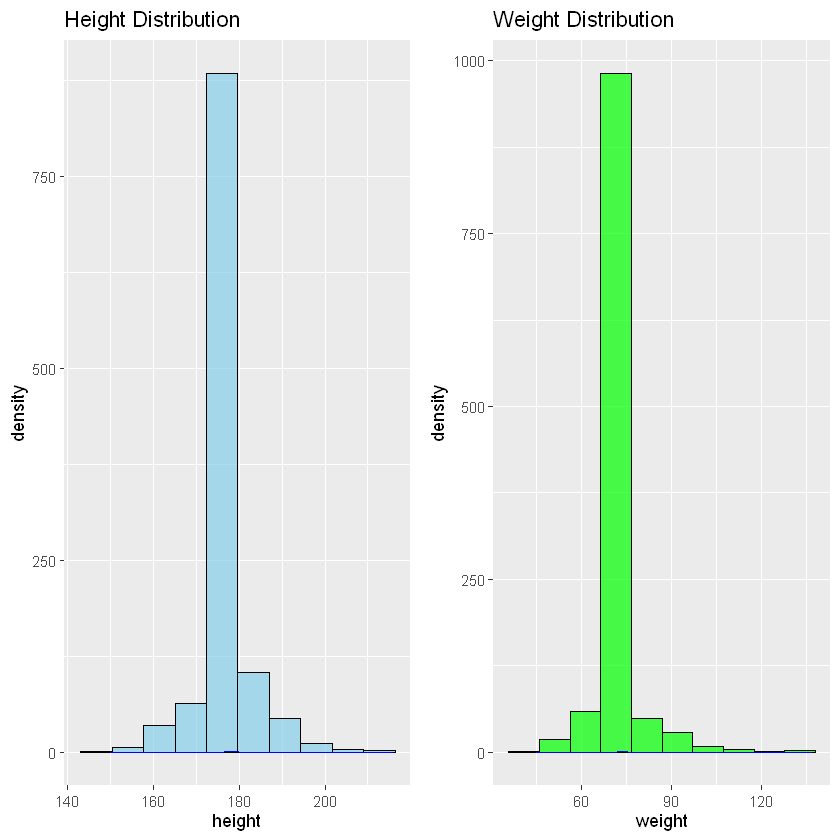

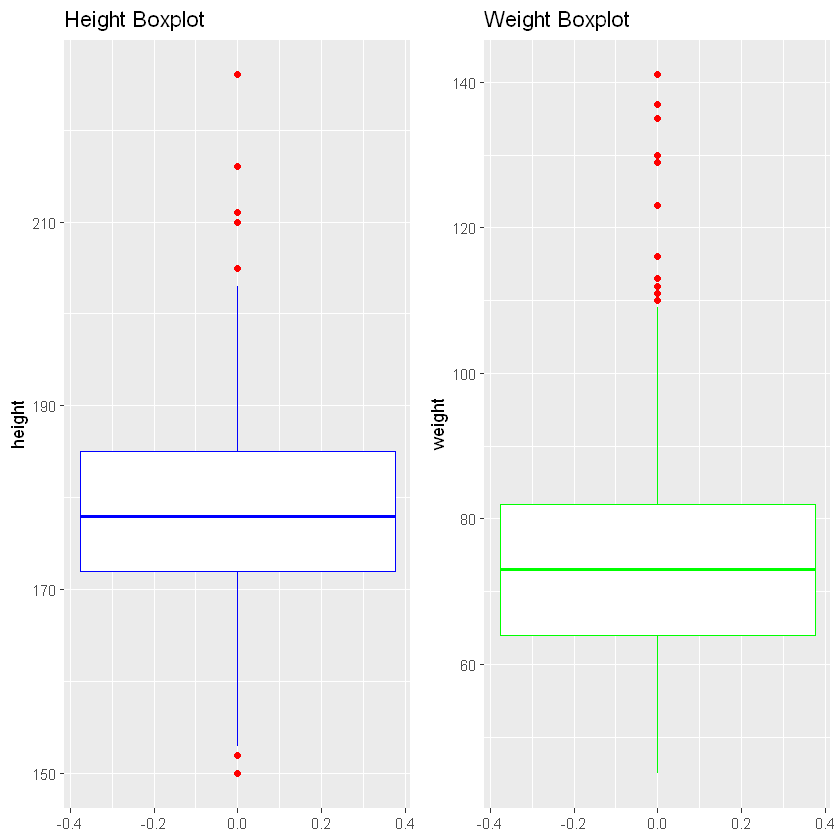

In [157]:
# Гистограмма для height
p1 <- ggplot(f1_df, aes(x = height)) +
  geom_histogram(bins = 10, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(color = "blue") +
  ggtitle("Height Distribution")

# Гистограмма для weight
p2 <- ggplot(f1_df, aes(x = weight)) +
  geom_histogram(bins = 10, fill = "green", color = "black", alpha = 0.7) +
  geom_density(color = "blue") +
  ggtitle("Weight Distribution")

# Отображение графиков
grid.arrange(p1, p2, ncol = 2)

# Коробчатые диаграммы
p3 <- ggplot(df, aes(y = height)) +
  geom_boxplot(color = "blue", outlier.colour = "red") +
  ggtitle("Height Boxplot")

p4 <- ggplot(df, aes(y = weight)) +
  geom_boxplot(color = "green", outlier.colour = "red") +
  ggtitle("Weight Boxplot")

# Отображение коробчатых диаграмм
grid.arrange(p3, p4, ncol = 2)

__**Тест 2**__ - медиана

In [159]:
# Значения до пропусков
summary(f2_df)

   athlete_id          name               sex                born          
 Min.   :      3   Length:1150        Length:1150        Length:1150       
 1st Qu.:  33222   Class :character   Class :character   Class :character  
 Median :  54888   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  60729                                                           
 3rd Qu.:  84688                                                           
 Max.   :1005221                                                           
     height          weight         country          country_noc       
 Min.   :150.0   Min.   : 45.00   Length:1150        Length:1150       
 1st Qu.:172.0   1st Qu.: 64.00   Class :character   Class :character  
 Median :178.0   Median : 73.00   Mode  :character   Mode  :character  
 Mean   :178.1   Mean   : 73.66                                        
 3rd Qu.:185.0   3rd Qu.: 82.00                                        
 Max.   :226.0   Max.   :141.00     

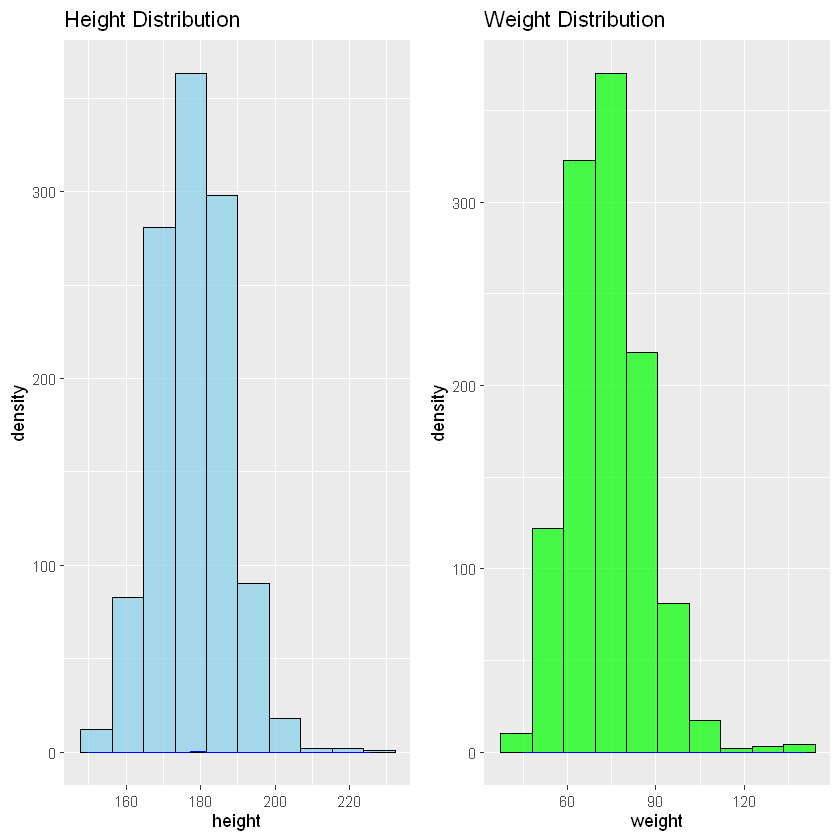

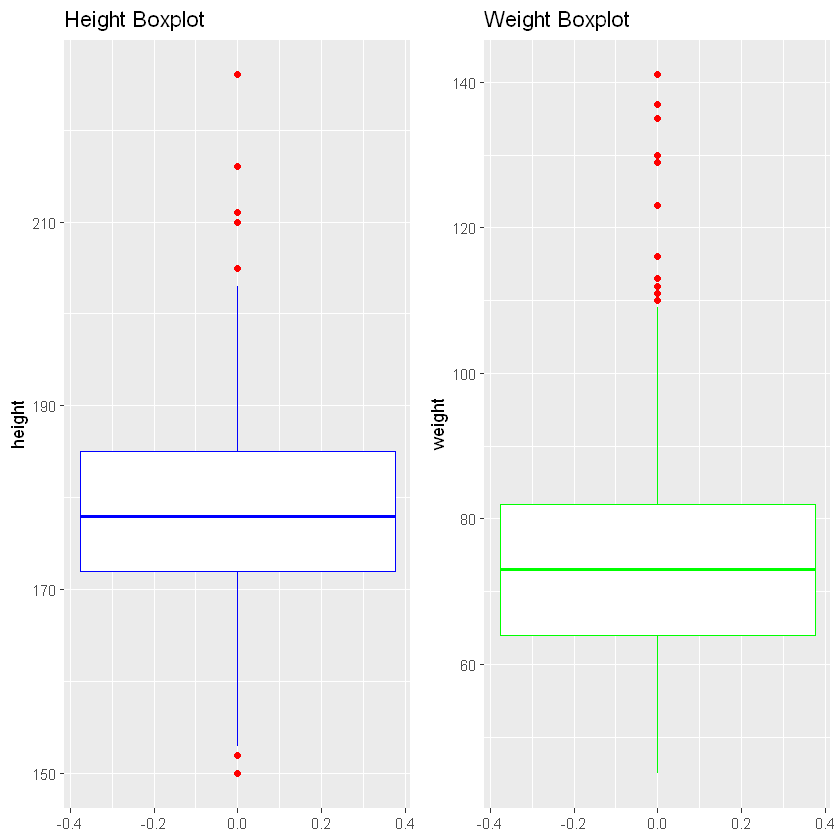

In [160]:
# Гистограмма для height
p1 <- ggplot(f2_df, aes(x = height)) +
  geom_histogram(bins = 10, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(color = "blue") +
  ggtitle("Height Distribution")

# Гистограмма для weight
p2 <- ggplot(f2_df, aes(x = weight)) +
  geom_histogram(bins = 10, fill = "green", color = "black", alpha = 0.7) +
  geom_density(color = "blue") +
  ggtitle("Weight Distribution")

# Отображение графиков
grid.arrange(p1, p2, ncol = 2)

# Коробчатые диаграммы
p3 <- ggplot(df, aes(y = height)) +
  geom_boxplot(color = "blue", outlier.colour = "red") +
  ggtitle("Height Boxplot")

p4 <- ggplot(df, aes(y = weight)) +
  geom_boxplot(color = "green", outlier.colour = "red") +
  ggtitle("Weight Boxplot")

# Отображение коробчатых диаграмм
grid.arrange(p3, p4, ncol = 2)

In [161]:
# Добавляем вручную случайным образом пропуски.

# Генерация случайных индексов
set.seed(123)  # Установка семени для воспроизводимости
nan_indices_to_height2 <- sample(nrow(f1_df), 973)
nan_indices_to_id2 <- sample(nrow(f1_df), 968)
nan_indices_to_weight2 <- sample(nrow(f1_df), 973)

# Заполнение столбцов пропусками
f2_df[nan_indices_to_height2, 'height'] <- NA
f2_df[nan_indices_to_id2, 'athlete_id'] <- NA
f2_df[nan_indices_to_weight2, 'weight'] <- NA

In [162]:
colSums(is.na(f2_df))

athlete_id          name           sex          born        height 
          968             0             0             0           973 
       weight       country   country_noc   description special_notes 
          973             0             0             0             0 
        sport 
            0

In [163]:
summary(f2_df)

   athlete_id         name               sex                born          
 Min.   :   577   Length:1150        Length:1150        Length:1150       
 1st Qu.: 41715   Class :character   Class :character   Class :character  
 Median : 54626   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 61978                                                           
 3rd Qu.: 84349                                                           
 Max.   :700998                                                           
 NA's   :968                                                              
     height          weight         country          country_noc       
 Min.   :150.0   Min.   : 45.00   Length:1150        Length:1150       
 1st Qu.:172.0   1st Qu.: 65.00   Class :character   Class :character  
 Median :178.0   Median : 73.00   Mode  :character   Mode  :character  
 Mean   :178.6   Mean   : 73.45                                        
 3rd Qu.:185.0   3rd Qu.: 82.00         

In [164]:
f2_df[nan_indices_to_height2, 'height'] <- orig_median_h
f2_df[nan_indices_to_id2, 'athlete_id'] <- orig_median_h
f2_df[nan_indices_to_weight2, 'weight'] <- orig_median_h
head(f2_df, 5)
colSums(is.na(f2_df))

athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,sport
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
178,Virág Csurgó,Female,10 November 1972,172,178,Hungary,HUN,"Virág Csurgó was a professional Hungarian tennis player who specialised as a doubles player. Csurgó achieved a career-best doubles ranking of 84 in the world in September 1998. She also played for the Hungary Fed Cup team. Csurgó won her first doubles tournament on the ITF circuit in July 1988 at Cava Tirr, Italy. She would win a total of 17 ITF doubles titles during her career along with six singles titles. At Grand Slam tournaments Csurgó reached the second round in the doubles at the Australian, French, and US Opens. Csurgó competed in the singles and doubles at the 1996 Atlanta Olympics, reaching the second round in both events.",Listed in Olympians Who Won a Medal at the Summer Universiade (0–0–1 1993 Buffalo TEN bronze: mixed doubles),Tennis
99106,Ronny Yeager,Male,16 August 1952,178,178,United States,USA,"Ronny Yeager skied for Durango High School and the University of Colorado, from which he graduated in 1972. In 1971 Yeager was US Junior champion in cross-country skiing. He was fifth that year at 15K in the US Championships. After his ski career ended, Yeager settled back in his hometown and started Ronny Yeager Durango Outfitting.",Listed in Olympians Who Won a Medal at the Winter Universiade (0–0–1 1972 Lake Placid CCS bronze: 4×10 km relay),Skiing
178,Galit Chait,Female,29 January 1975,178,45,Israel,ISR,Dance: 1994 World Championships (FNR) (with Maxim Sevostianov (a non-Olympian) [ISR]). 1996 World Championships (23); 1997 World Championships (18); 1998 World Championships (14); 1999 World Championships (13); 2000 World Championships (5); 2002 World Championships (3); 2003 World Championships (6); 2004 World Championships (7); 2005 World Championships (6); 2006 World Championships (6); 1997 European Championships (14); 1998 European Championships (12); 1999 European Championships (10); 2000 European Championships (6); 2001 European Championships (5); 2002 European Championships (5); 2003 European Championships (6); 2004 European Championships (5); 2005 European Championships (4); 2006 European Championships (5) (with Sergey Sakhnovsky [ISR]).,Listed in Olympians Who Won a Medal at the World Figure Skating Championships (0–0–1 2002 Nagano bronze: ice dancing),Dance
178,Daniele Zappaterra,Male,19 September 1955,178,178,Italy,ITA,"Daniele Zappaterra started boxing in 1970, at age 15, coached by Antonio Tisinato. Before the 1976 Montréal Olympics, he had a short career among amateurs, with only four caps with the national team. In Canada he lost in the first round to the Brit Clinton McKenzie. Zappaterra turned pro the following year with his first match on 19 February in Milano, winning a decision over Giovanni Maiorano. After 12 victories, he suffered his first defeat on 18 September 1981 to Giuseppe Agate by decision. A little more than a year later Zappaterra became the Italian champion as a super-welterweight by beating Rosario Pacileo in the fifth round, but he lost the title in July 1983 by a TKO in the 7th round against Ernesto Ros. He tried again to become Italian champion in April 1985 but was defeated by Eupremio Epifani. The last part of his career was a struggle, as he lost 6 of his final 9 fights, and ended with a professional career of 27 wins (7 by KO), 7 losses (5 by KO), and 2 draws.",Listed in Olympians Who Were Sent to Prison (Imprisoned for some months in 1982-83 for terrorist gang activities and sentenced to four years in prison (2008-12) for possession and trafficking in illegal drugs.),Boxing
178,Jim Day,Male,2 July 1946,178,178,Canada,CAN,"Jim Day joined the Canadian national equestrian team in 1964 and, four years later, was a gold medalist at the Olympics, having won the team event at the 1968 Games alongside Jim Elder and Tom Gayford. He also finished joint-13th individually.

athlete_id          name           sex          born        height 
            0             0             0             0             0 
       weight       country   country_noc   description special_notes 
            0             0             0             0             0 
        sport 
            0

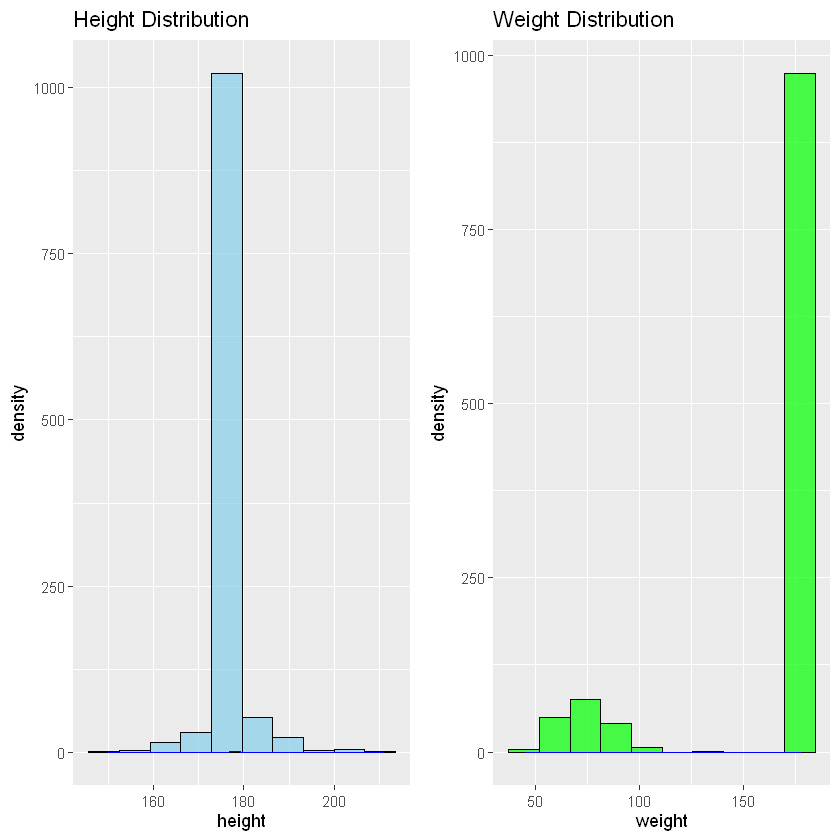

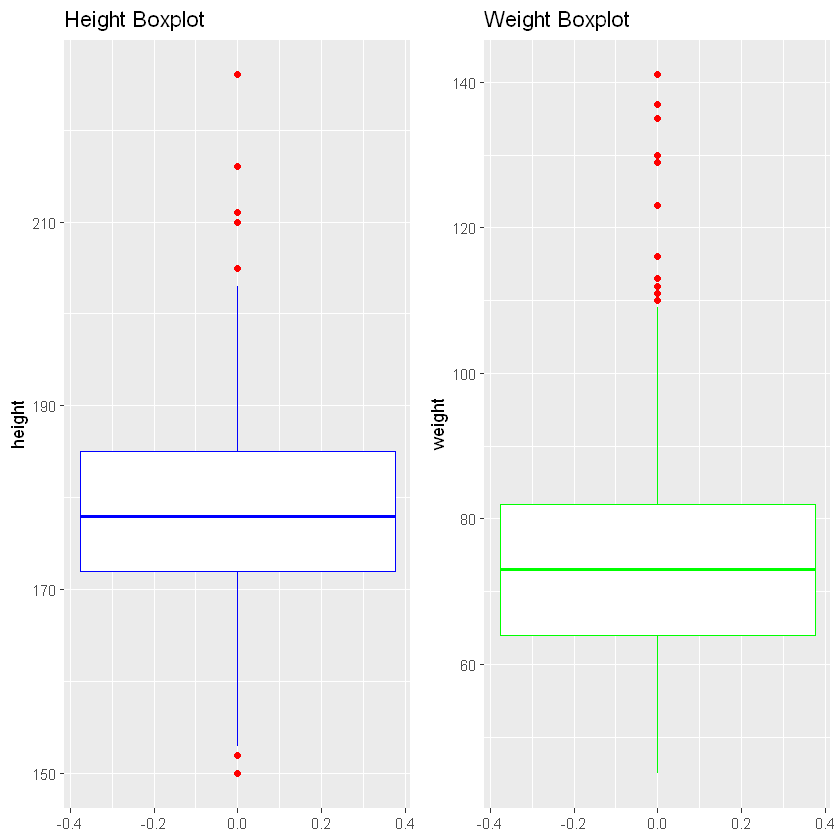

In [165]:
# Гистограмма для height
p1 <- ggplot(f2_df, aes(x = height)) +
  geom_histogram(bins = 10, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(color = "blue") +
  ggtitle("Height Distribution")

# Гистограмма для weight
p2 <- ggplot(f2_df, aes(x = weight)) +
  geom_histogram(bins = 10, fill = "green", color = "black", alpha = 0.7) +
  geom_density(color = "blue") +
  ggtitle("Weight Distribution")

# Отображение графиков
grid.arrange(p1, p2, ncol = 2)

# Коробчатые диаграммы
p3 <- ggplot(df, aes(y = height)) +
  geom_boxplot(color = "blue", outlier.colour = "red") +
  ggtitle("Height Boxplot")

p4 <- ggplot(df, aes(y = weight)) +
  geom_boxplot(color = "green", outlier.colour = "red") +
  ggtitle("Weight Boxplot")

# Отображение коробчатых диаграмм
grid.arrange(p3, p4, ncol = 2)

In [166]:
summary(df)
summary(f1_df)
summary(f2_df)

   athlete_id          name               sex                born          
 Min.   :      3   Length:1150        Length:1150        Length:1150       
 1st Qu.:  33222   Class :character   Class :character   Class :character  
 Median :  54888   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  60729                                                           
 3rd Qu.:  84688                                                           
 Max.   :1005221                                                           
     height          weight         country          country_noc       
 Min.   :150.0   Min.   : 45.00   Length:1150        Length:1150       
 1st Qu.:172.0   1st Qu.: 64.00   Class :character   Class :character  
 Median :178.0   Median : 73.00   Mode  :character   Mode  :character  
 Mean   :178.1   Mean   : 73.66                                        
 3rd Qu.:185.0   3rd Qu.: 82.00                                        
 Max.   :226.0   Max.   :141.00     

   athlete_id          name               sex                born          
 Min.   :      3   Length:1150        Length:1150        Length:1150       
 1st Qu.:  33222   Class :character   Class :character   Class :character  
 Median :  54888   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  60729                                                           
 3rd Qu.:  84688                                                           
 Max.   :1005221                                                           
     height          weight         country          country_noc       
 Min.   :150.0   Min.   : 45.00   Length:1150        Length:1150       
 1st Qu.:178.1   1st Qu.: 73.66   Class :character   Class :character  
 Median :178.1   Median : 73.66   Mode  :character   Mode  :character  
 Mean   :178.1   Mean   : 73.78                                        
 3rd Qu.:178.1   3rd Qu.: 73.66                                        
 Max.   :216.0   Max.   :137.00     

   athlete_id         name               sex                born          
 Min.   :   178   Length:1150        Length:1150        Length:1150       
 1st Qu.:   178   Class :character   Class :character   Class :character  
 Median :   178   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  9958                                                           
 3rd Qu.:   178                                                           
 Max.   :700998                                                           
     height          weight        country          country_noc       
 Min.   :150.0   Min.   : 45.0   Length:1150        Length:1150       
 1st Qu.:178.0   1st Qu.:178.0   Class :character   Class :character  
 Median :178.0   Median :178.0   Mode  :character   Mode  :character  
 Mean   :178.1   Mean   :161.9                                        
 3rd Qu.:178.0   3rd Qu.:178.0                                        
 Max.   :211.0   Max.   :178.0                   

**Вывод:** При внесении пропусков и замене произвольными значениями распределение меняется а пропуски меняются незначительно

## 6. Генерация нормального распределения и анализ (графики эмпирических функций распределений, квантилей, метод огибающих, критерии проверки нормальности...)

**График эмпирической функции распределения (ECDF)** - график, показывающий распределение данных в выборке.

**График квантилей (Q-Q plot)** - сравнивает распределение данных с теоретическим распределением или между двумя выборками.

**Метод огибающей (Envelope method)** - создание доверительных интервалов вокруг оценочной функции (например, эмпирической функции распределения) или для визуализации разброса между несколькими выборками.

**Критерий Колмогорова-Смирнова (K-S Test)** - проверка гипотезы о том, что данные согласуются с каким-нибудь известным законом распределения. Чувствителен к отклонениям на концах распределения, для проверки нормальности требует, чтобы среднее и дисперсия были известны.

**Критерий Шапиро-Уилка (Shapiro-Wilk Test)** - проверка гипотезы о нормальности распределения данных. Менее эффективен на больших выборках (более 2000 наблюдений), может отклонять нормальность, даже при незначительных отклонениях.

**Критерий Андерсона-Дарлинга (Anderson-Darling Test)** - проверка соответствия гипотез определенному распределению. Является улучшением критерия Колмогорова-Смирнова, придавая больший вес отклонениям на хвостах распределения. Требует табличных значений для разных распределений.

**Критерий Крамера-фон-Мизеса (Cramer-von-Mises)** - проверка гипотезы о том, что выборка принадлежит определенному распределению. Подобен K-S тесту, но учитывает отклонения на всей длине функции распределения. Основан на сумме квадратов отклонений эмпирической функции распрделения от теоретической. Менее чувствителен к отклонениям на хвостах, чем критерий Андерсона-Дарлинга

**Критерий Колмогорова-Смирнова в модификации Лиллиефорса (Lilliefors Test)** - проверка нормальности данных, когда параметры(среднее и дисперсия) неизвестны. Чувствителен к небольшим отклонениям в распределнии данных.

**Критерий Шапиро-Франсия (Shapiro-Francia Test)** - проверка нормальности данных, альтернативный тесту Шапиро-Уилка. Более адаптирован для симметричных распределений. Лучше работает на больших объемах выборки. Меньше применим к небольшим объемам выборки, где тест Шапиро-Уилка может быть эффективнее.

**Сгенерируем в начале две выборки малого (50-100) и умеренного размеров (1000-5000) стандартного нормального распределения и проведем анализ на них. Далее проведем аналогичные действия для выборки с гауссовским.**

**_Стандартное нормальное распределение_**

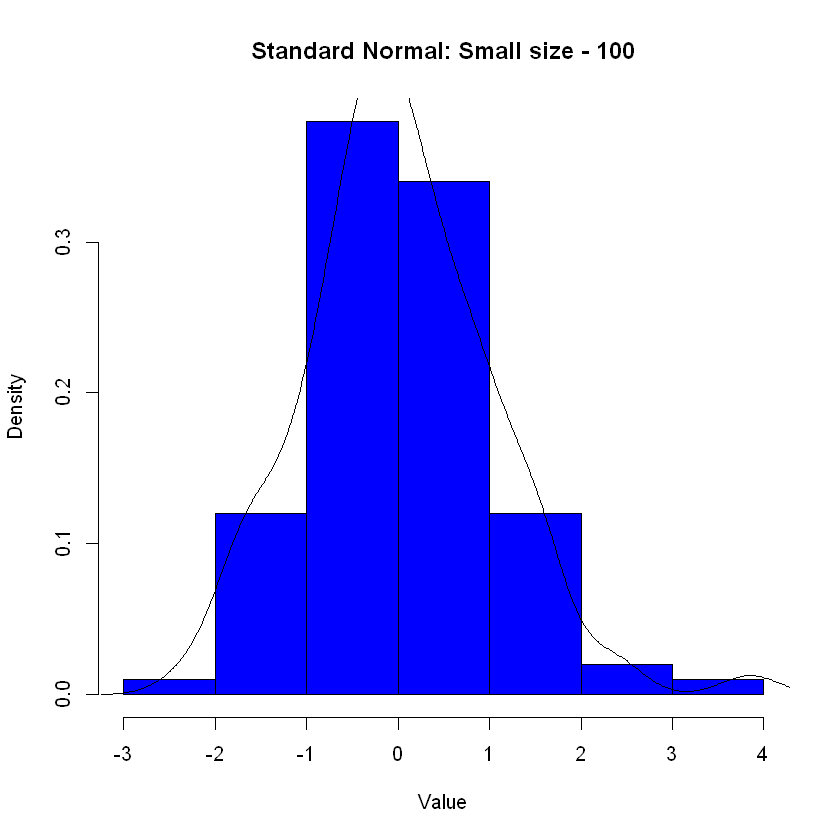

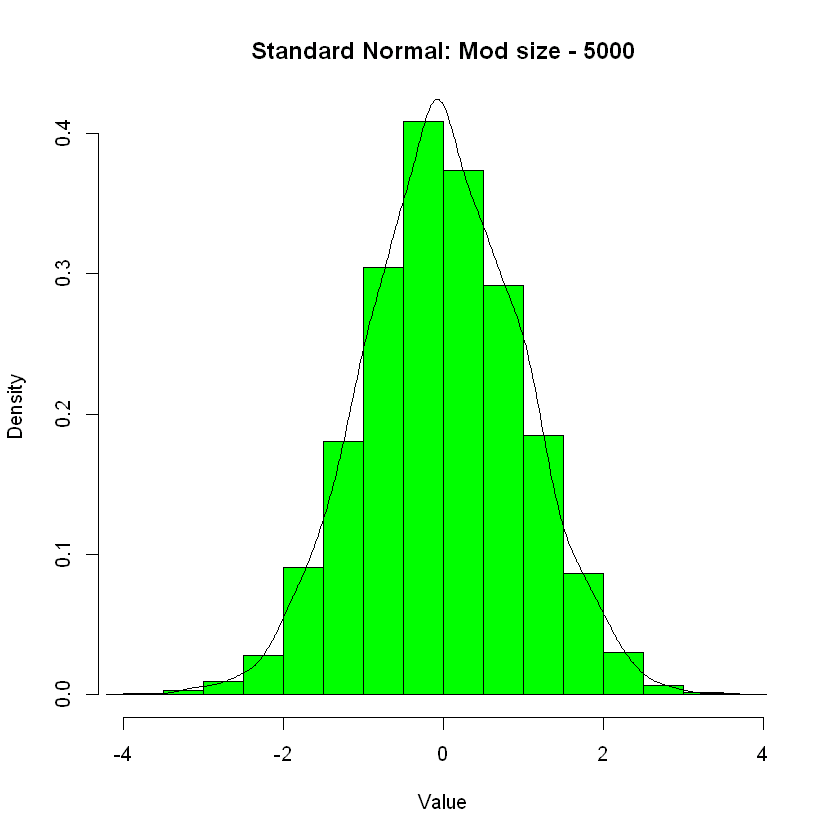

In [172]:
# Генерируем две выборки: малого (50-100) и умеренного (1000-5000) объемов стандартного нормального распределения

mu <- 0
sigma <- 1 # параметры нормального распределения: среднее и дисперсия
small_normal_df_1 <- rnorm(100, mu, sigma)
mode_normal_df_2 <- rnorm(5000, mu, sigma)

# Small size - 100
hist(small_normal_df_1, probability=TRUE, col='blue', main="Standard Normal: Small size - 100", xlab="Value")
lines(density(small_normal_df_1), col='black')


# Moderate size - 5000
hist(mode_normal_df_2, probability=TRUE, col='green', main="Standard Normal: Mod size - 5000", xlab="Value")
lines(density(mode_normal_df_2), col='black')



**ECDF**

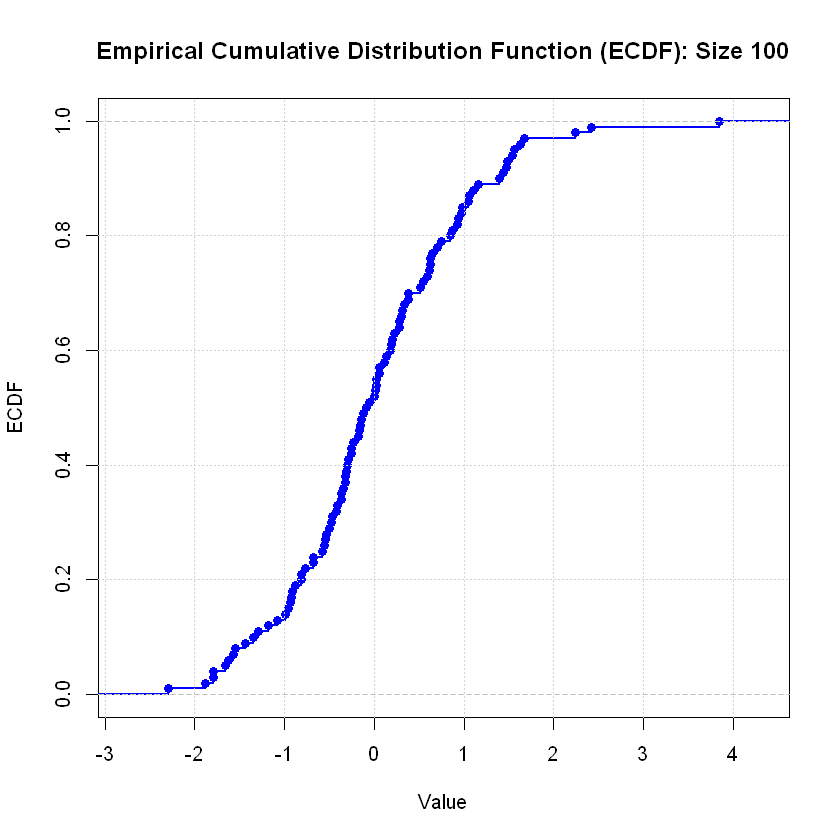

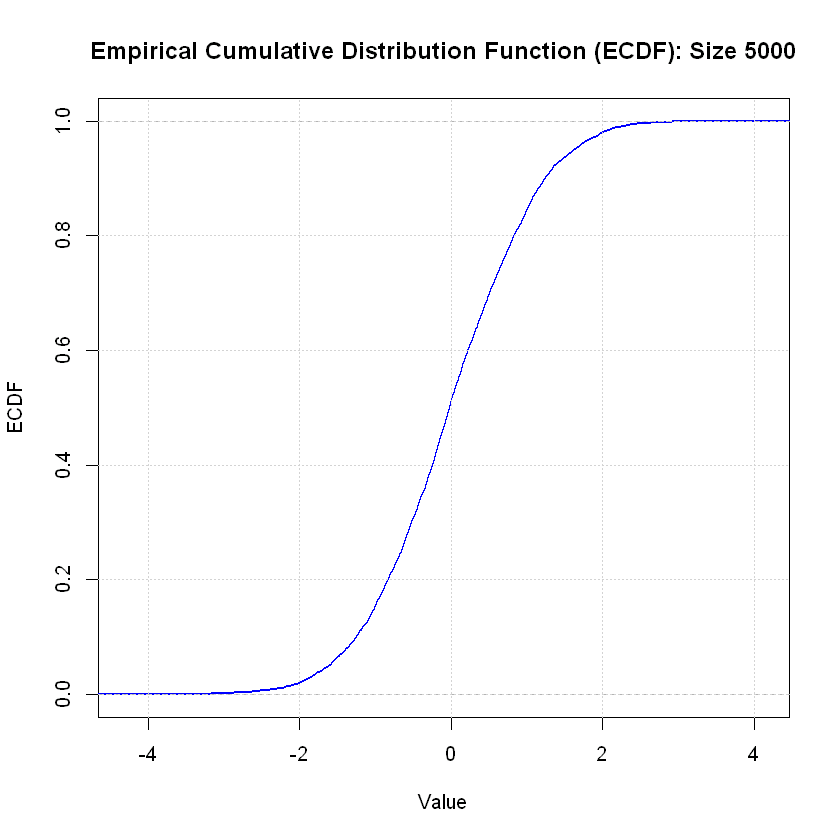

In [174]:
# Строим графики ECDF для выборок

# Размер 100
ecdf_data <- ecdf(small_normal_df_1)
plot(ecdf_data, main = "Empirical Cumulative Distribution Function (ECDF): Size 100",
     xlab = "Value", ylab = "ECDF", col = "blue", lwd = 2)
grid()

# Разер 5000
ecdf_data <- ecdf(mode_normal_df_2)
plot(ecdf_data, main = "Empirical Cumulative Distribution Function (ECDF): Size 5000",
     xlab = "Value", ylab = "ECDF", col = "blue", lwd = 2)
grid()


**_Quantile-Quantile plot_**

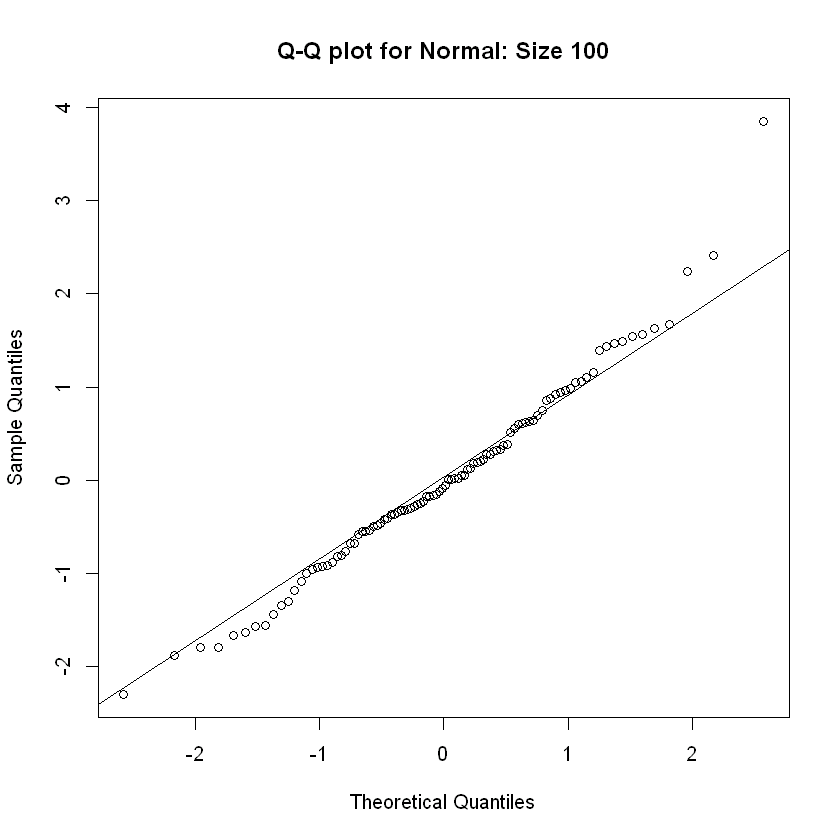

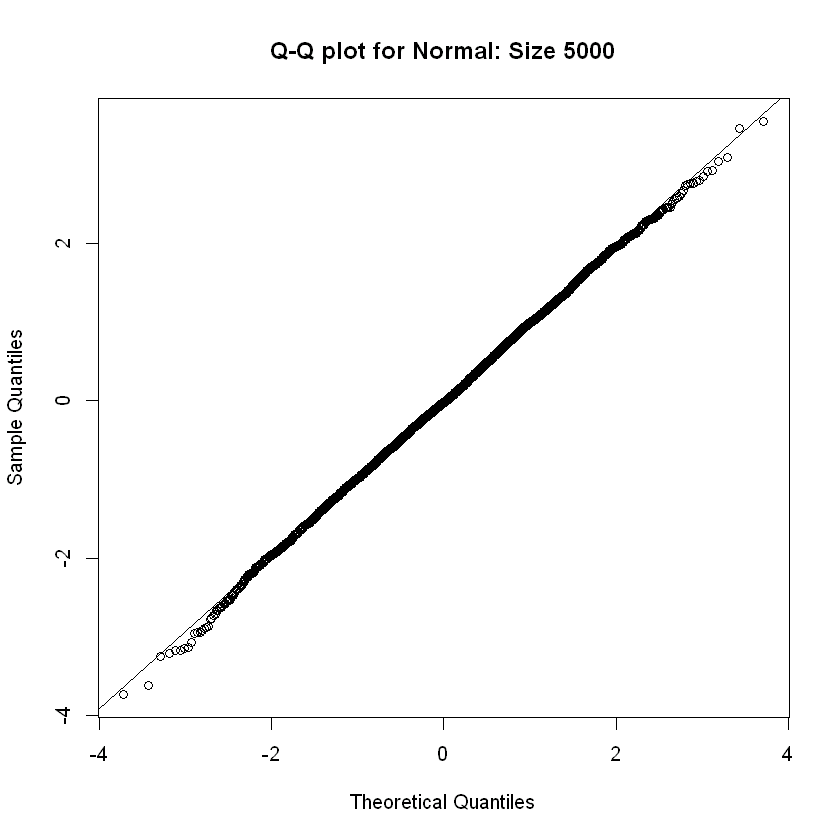

In [176]:
# Q-Q график для первой выборки
qqnorm(small_normal_df_1, main='Q-Q plot for Normal: Size 100')
qqline(small_normal_df_1)

# Q-Q график для второй выборки
qqnorm(mode_normal_df_2, main='Q-Q plot for Normal: Size 5000')
qqline(mode_normal_df_2)

**_Envelope method_**

Изобразим обе выборки на одном графике

In [178]:
# Функция - метод огибающих
envelope_method <- function(df1, df2) {
    # Генерация теоретических квантилей и квантилей выборок
    small_quantiles <- qqnorm(df1, plot.it = FALSE)$x
    small_values <- qqnorm(df1, plot.it = FALSE)$y
    mode_quantiles <- qqnorm(df2, plot.it = FALSE)$x
    mode_values <- qqnorm(df2, plot.it = FALSE)$y
    
    # Функция для расчета бутстрепных огибающих
    bootstrap_envelope <- function(data, n_bootstrap = 1000, conf_level = 0.95) {
        n <- length(data)
        boot_diffs <- replicate(n_bootstrap, {
            sample_data <- sample(data, n, replace = TRUE)
            quantile(sample_data, probs = seq(0, 1, length.out = n))
        })
        
        # Находим верхний и нижний пределы по доверительному интервалу
        lower <- apply(boot_diffs, 1, function(x) quantile(x, (1 - conf_level) / 2))
        upper <- apply(boot_diffs, 1, function(x) quantile(x, 1 - (1 - conf_level) / 2))
        
        return(data.frame(theoretical = sort(small_quantiles), lower = lower, upper = upper))
    }
    
    # Расчет огибающих для доверительного интервала
    envelope <- bootstrap_envelope(small_values)
    
    # Подготовка данных для графика
    plot_data <- data.frame(
        small_quantiles = small_quantiles,
        small_values = small_values,
        mode_quantiles = mode_quantiles,
        mode_values = mode_values
    )
    
    # Построение графика
    ggplot(plot_data) +
        geom_ribbon(data = envelope, aes(x = theoretical, ymin = lower, ymax = upper), fill = "grey", alpha = 0.3) +
        geom_abline(slope = 1, intercept = 0, color = "red", linetype = "solid", size = 1) +
        geom_point(aes(x = small_quantiles, y = small_values), color = "black") +
        geom_point(aes(x = mode_quantiles, y = mode_values), color = "lightgreen") +
        labs(
            title = "QQ Plot для обеих выборок с огибающими",
            x = "Теоретические квантили",
            y = "Наблюдаемые значения"
        ) +
        theme_minimal() +
        scale_color_manual(values = c("Выборка 1" = "black", "Выборка 2" = "lightgreen"))
}

[1] "Для выборок стандартного нормального распределения с гауссовским шумом умеренного(1000) и млалого(100) объемов"


Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."


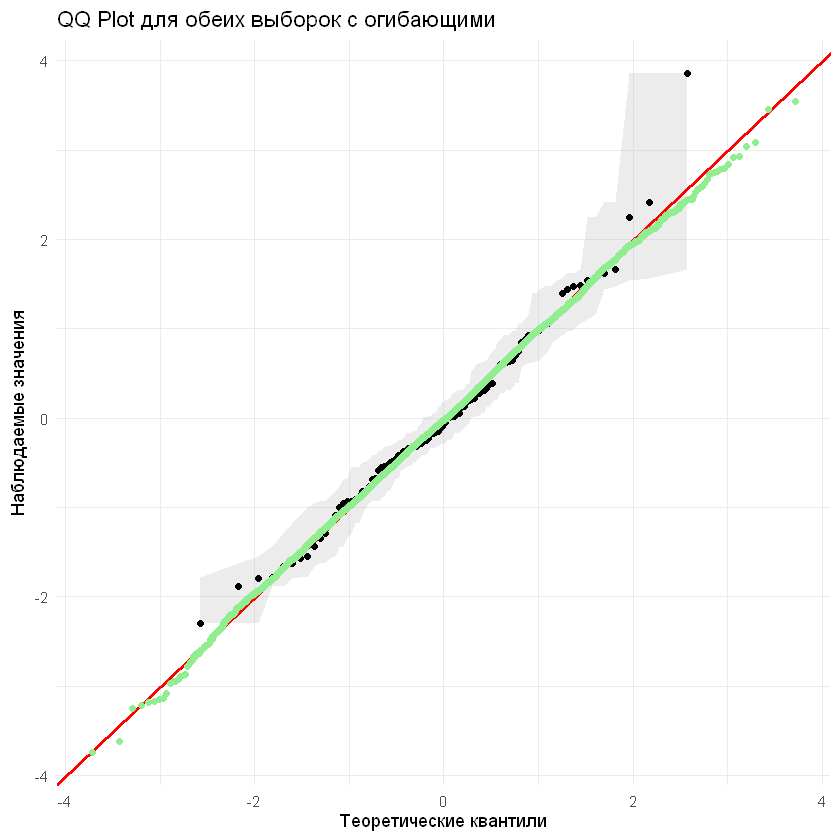

In [179]:
# Выполняем метод огибающих
print("Для выборок стандартного нормального распределения с гауссовским шумом умеренного(1000) и млалого(100) объемов")
envelope_method(small_normal_df_1, mode_normal_df_2)

**_K-S Test_**

In [181]:
# Критерий Колмогорова-Смирнова
ks_test1 <- ks.test(small_normal_df_1, "pnorm")
ks_test2 <- ks.test(mode_normal_df_2, "pnorm")

print(ks_test1)
print(ks_test2)

# H0 - данные распределены нормально
# H1 - данные не распределены нормально

alpha <- 0.05
cat("Тест 1: \n")
if (ks_test1$p.value > alpha) {
    cat("H0: данные нормально распределены\n\n")
} else {
    cat("H1: данные не нормально распрделены\n\n")
}

cat("Тест2: \n")
if (ks_test2$p.value > alpha) {
    cat("H0: данные нормально распределены\n\n")
} else {
    cat("H1: данные не нормально распрделены\n\n")
}


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  small_normal_df_1
D = 0.049635, p-value = 0.9662
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  mode_normal_df_2
D = 0.015758, p-value = 0.1668
alternative hypothesis: two-sided

Тест 1: 
H0: данные нормально распределены

Тест2: 
H0: данные нормально распределены



**Остальные тесты для выборки малого и умеренного размеров** 

Тесты проверяют гипотезу о принадлежности данных нормальному распределению. 

Если p-значение больше определенного значения на уровне значимости (например, 0.05), то это означает, что гипотеза о нормальности справедлива, иначе, наоборот. 

In [183]:
# install.packages("nortest")
library(nortest)

perform_normality_tests <- function(sample, name) {
  cat(sprintf("Результаты тестов для %s:\nTrue - принимаем гипотезу о нормальности распределения / False - иначе.\n\n", name))
  
  # Shapiro-Wilk Test
  shapiro_test <- shapiro.test(sample)
  cat(sprintf("\033[1mШапиро-Уилк\033[0m: Статистика=%.4f, p-value=%.4e\nres: %s\n\n", 
              shapiro_test$statistic, shapiro_test$p.value, shapiro_test$p.value > 0.05))
  
  # Anderson-Darling Test
  anderson_test <- ad.test(sample)
  cat(sprintf("\033[1mАндерсон-Дарлинг\033[0m: Статистика=%.4f, p-value=%.4e\nres: %s\n\n", 
              anderson_test$statistic, anderson_test$p.value, anderson_test$p.value > 0.05))
  
  # Cramer-von Mises Test
  cramervonmises_test <- cvm.test(sample)
  cat(sprintf("\033[1mКрамер фон Мизес\033[0m: Статистика=%.4f, p-value=%.4e\nres: %s\n\n", 
              cramervonmises_test$statistic, cramervonmises_test$p.value, cramervonmises_test$p.value > 0.05))

   # Тест Колмогорова-Смирнова (модификация Лиллиефорса)
   kstest <- ks.test(sample, "pnorm")
   cat(sprintf('\033[1mКолмогоров-Смирнов (Лиллиефорс)\033[0m: Статистика=%.4f, p-value=%.4e\nres: %s\n\n', 
               kstest$statistic, kstest$p.value, kstest$p.value > 0.05))
    
  shapiro_francia_test <- shapiro.test(sample)
  cat(sprintf("\033[1mШапиро-Франция\033[0m: Статистика=%.4f, p-value=%.4e\nres: %s\n\n", 
              shapiro_francia_test$statistic, shapiro_francia_test$p.value, shapiro_francia_test$p.value > 0.05))
  
  cat(rep("-", 50), "\n")
}

# Applying tests to both samples
perform_normality_tests(small_normal_df_1, 'Sample of 100 elements')
perform_normality_tests(mode_normal_df_2, 'Sample of 5000 elements')


Результаты тестов для Sample of 100 elements:
True - принимаем гипотезу о нормальности распределения / False - иначе.

Шапиро-Уилк: Статистика=0.9798, p-value=1.2713e-01
res: TRUE

Андерсон-Дарлинг: Статистика=0.3503, p-value=4.6548e-01
res: TRUE

Крамер фон Мизес: Статистика=0.0575, p-value=4.0475e-01
res: TRUE

Колмогоров-Смирнов (Лиллиефорс): Статистика=0.0496, p-value=9.6623e-01
res: TRUE

Шапиро-Франция: Статистика=0.9798, p-value=1.2713e-01
res: TRUE

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Результаты тестов для Sample of 5000 elements:
True - принимаем гипотезу о нормальности распределения / False - иначе.

Шапиро-Уилк: Статистика=0.9997, p-value=6.4122e-01
res: TRUE

Андерсон-Дарлинг: Статистика=0.3671, p-value=4.3194e-01
res: TRUE

Крамер фон Мизес: Статистика=0.0669, p-value=3.0727e-01
res: TRUE

Колмогоров-Смирнов (Лиллиефорс): Статистика=0.0158, p-value=1.6685e-01
res: TRUE

Шапиро-Франция: Статистика=0.9997, p-va

**Нормальное распределение с гауссовским шумом**

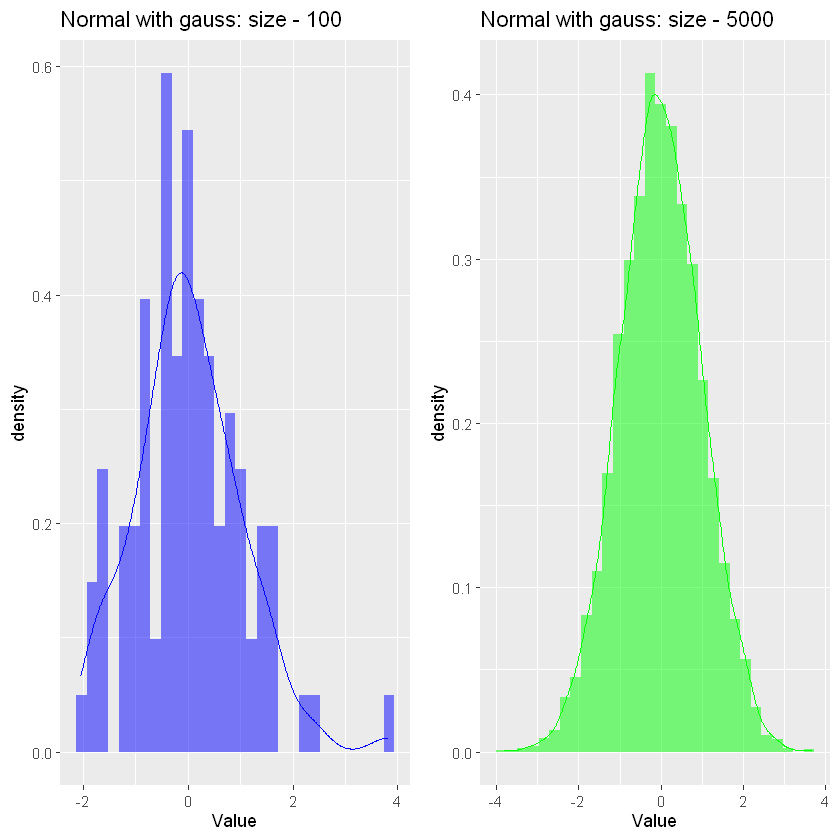

In [185]:
# install.packages("gridExtra")
library(gridExtra)

# Генерация случайных нормальных шумов
small_gauss_noise <- rnorm(100, mean = 0, sd = 0.1) # для выборки малого размера
mod_gauss_noise <- rnorm(5000, mean = 0, sd = 0.2) # для выборки умеренного размера

# Создание данных с добавлением гауссовского шума
small_data_with_gauss <- small_normal_df_1 + small_gauss_noise
mod_data_with_gauss <- mode_normal_df_2 + mod_gauss_noise

# Визуализация данных
library(ggplot2)
library(gridExtra)

p1 <- ggplot(data.frame(Value = small_data_with_gauss), aes(x = Value)) +
  geom_histogram(aes(y = ..density..), fill = 'blue', alpha = 0.5, bins = 30) +
  geom_density(color = 'blue') +
  labs(x = "Value", title = "Normal with gauss: size - 100")

p2 <- ggplot(data.frame(Value = mod_data_with_gauss), aes(x = Value)) +
  geom_histogram(aes(y = ..density..), fill = 'green', alpha = 0.5, bins = 30) +
  geom_density(color = 'green') +
  labs(x = "Value", title = "Normal with gauss: size - 5000")

grid.arrange(p1, p2, ncol = 2)


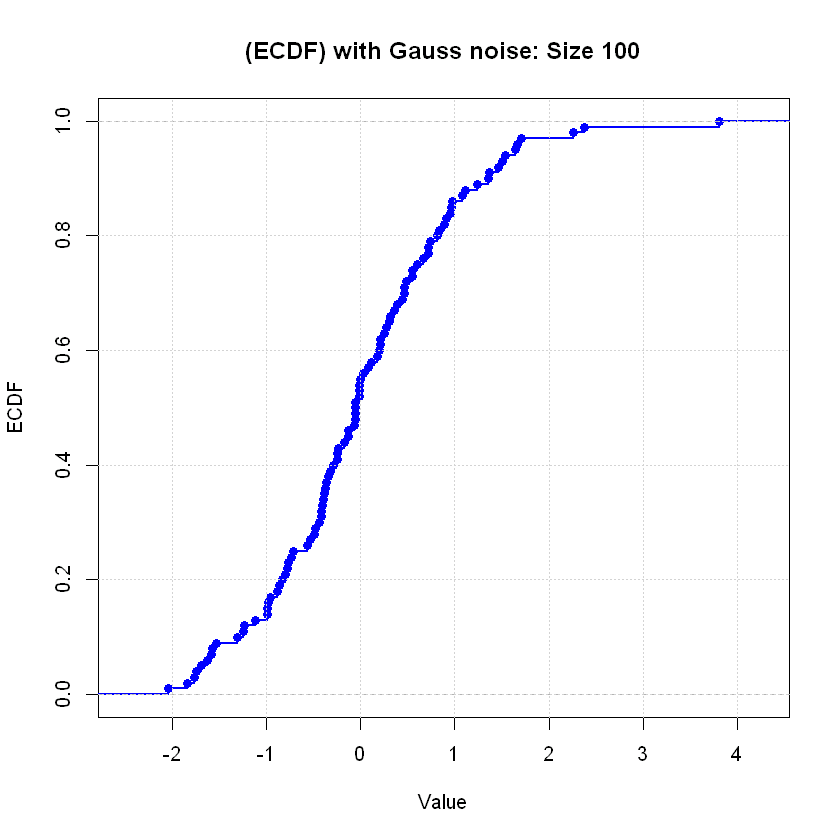

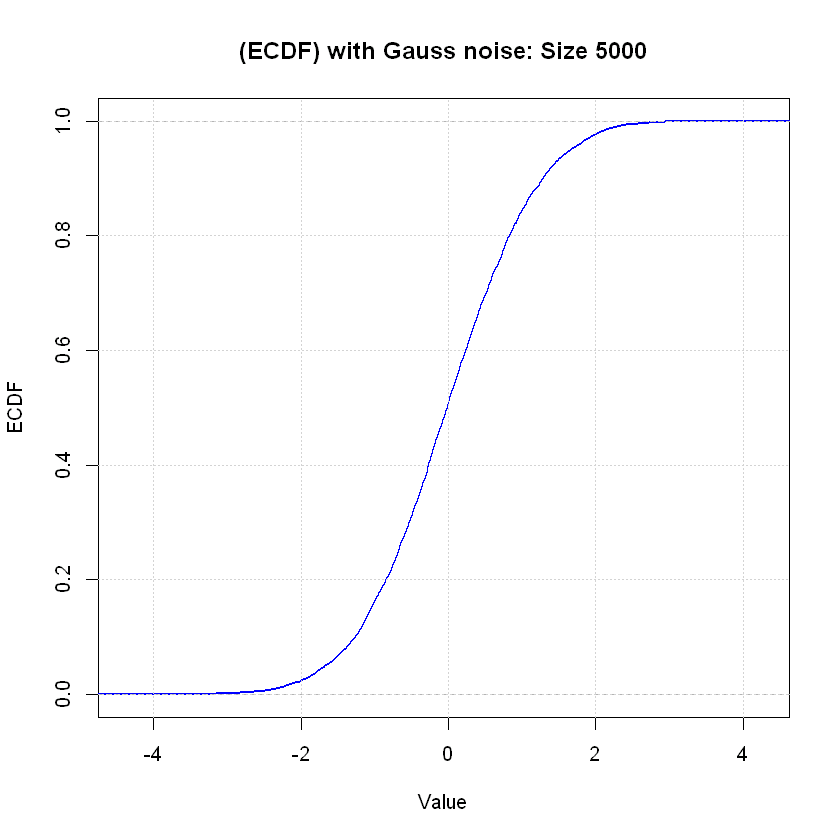

In [186]:
# Строим графики ECDF для выборок

# Размер 100
ecdf_data <- ecdf(small_data_with_gauss)
plot(ecdf_data, main = "(ECDF) with Gauss noise: Size 100",
     xlab = "Value", ylab = "ECDF", col = "blue", lwd = 2)
grid()

# Разер 5000
ecdf_data <- ecdf(mod_data_with_gauss)
plot(ecdf_data, main = "(ECDF) with Gauss noise: Size 5000",
     xlab = "Value", ylab = "ECDF", col = "blue", lwd = 2)
grid()


**_Quantile-Quantile plot_**

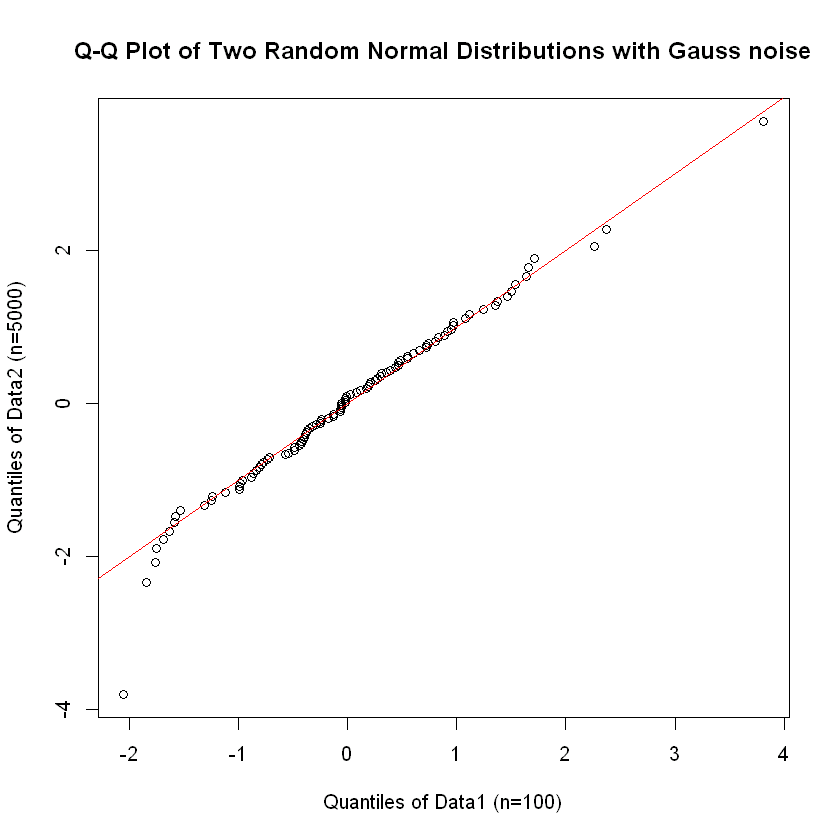

In [188]:
qqplot(small_data_with_gauss, mod_data_with_gauss, main = "Q-Q Plot of Two Random Normal Distributions with Gauss noise",
       xlab = "Quantiles of Data1 (n=100)", ylab = "Quantiles of Data2 (n=5000)")
abline(0, 1, col = "red")

**_Envelope method_**

[1] "Для выборок нормального распределения с гауссовским шумом умеренного(1000) и млалого(100) объемов"


Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."


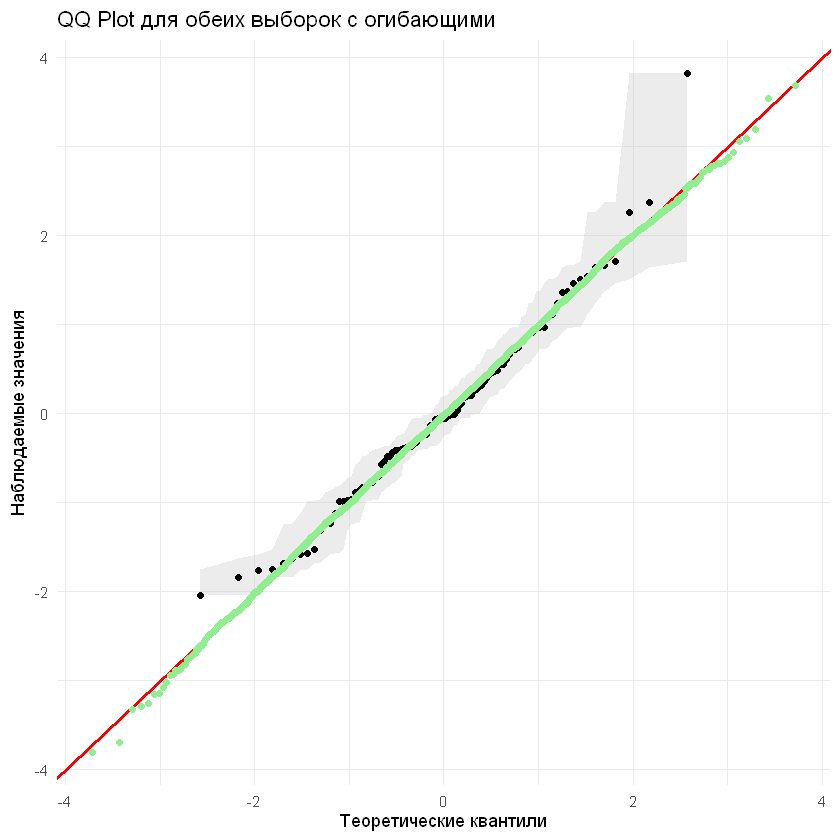

In [190]:
print("Для выборок нормального распределения с гауссовским шумом умеренного(1000) и млалого(100) объемов")
envelope_method(small_data_with_gauss, mod_data_with_gauss)

**_K-S Test_**

In [192]:
# Критерий Колмогорова-Смирнова
ks_test1 <- ks.test(small_data_with_gauss, "pnorm")
ks_test2 <- ks.test(mod_data_with_gauss, "pnorm")

print(ks_test1)
print(ks_test2)

# H0 - данные распределены нормально
# H1 - данные не распределены нормально

alpha <- 0.05
cat("Тест 1: \n")
if (ks_test1$p.value > alpha) {
    cat("H0: данные нормально распределены\n\n")
} else {
    cat("H1: данные не нормально распрделены\n\n")
}

cat("Тест2: \n")
if (ks_test2$p.value > alpha) {
    cat("H0: данные нормально распределены\n\n")
} else {
    cat("H1: данные не нормально распрделены\n\n")
}


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  small_data_with_gauss
D = 0.053004, p-value = 0.9414
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  mod_data_with_gauss
D = 0.012854, p-value = 0.3805
alternative hypothesis: two-sided

Тест 1: 
H0: данные нормально распределены

Тест2: 
H0: данные нормально распределены



**Остальные тесты для выборки малого и умеренного размеров** 

Тесты проверяют гипотезу о принадлежности данных нормальному распределению. 

Если p-значение больше определенного значения на уровне значимости (например, 0.05), то это означает, что гипотеза о нормальности справедлива, иначе, наоборот. 

In [194]:
# Применение тестов для обеих выборок
perform_normality_tests(small_data_with_gauss, 'Выборка из 100 элементов')
perform_normality_tests(mod_data_with_gauss, 'Выборка из 5000 элементов')

Результаты тестов для Выборка из 100 элементов:
True - принимаем гипотезу о нормальности распределения / False - иначе.

Шапиро-Уилк: Статистика=0.9781, p-value=9.4787e-02
res: TRUE

Андерсон-Дарлинг: Статистика=0.3180, p-value=5.3182e-01
res: TRUE

Крамер фон Мизес: Статистика=0.0477, p-value=5.4145e-01
res: TRUE

Колмогоров-Смирнов (Лиллиефорс): Статистика=0.0530, p-value=9.4143e-01
res: TRUE

Шапиро-Франция: Статистика=0.9781, p-value=9.4787e-02
res: TRUE

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Результаты тестов для Выборка из 5000 элементов:
True - принимаем гипотезу о нормальности распределения / False - иначе.

Шапиро-Уилк: Статистика=0.9998, p-value=9.2977e-01
res: TRUE

Андерсон-Дарлинг: Статистика=0.2459, p-value=7.5792e-01
res: TRUE

Крамер фон Мизес: Статистика=0.0370, p-value=7.3640e-01
res: TRUE

Колмогоров-Смирнов (Лиллиефорс): Статистика=0.0129, p-value=3.8052e-01
res: TRUE

Шапиро-Франция: Статистика=0.9998, 

## 7. Пример  анализа  данных  с помощью графиков квантилей, метода огибающих. Стандартные процедуры проверки гипотез о нормальности. Выборки малого и умеренного размеров.

**Возьмем датасет с информацией о росте студентов высшей школы** - [ссылка на датасет](https://www.kaggle.com/datasets/yashmeetsingh/high-school-heights-dataset/data)

**Название датасета** - _hs_heights_pair.csv_ (в датасете находятся две колонки: "boys", "girls")

Данный датасет был смоделирован. Рост рассчитывается на основе нормального распределения с разными наборами среднего и стандартного отклонения для мальчиков и девочек.

**Характеристики датасета, значения**

In [199]:
# hs_heights_path = '../all_datasets/hs_heights_pair.csv' # путь к файлу
# hs_heights_df = pd.read_csv(hs_heights_path) # открытие файла и создание датафрейма

# hs_heights_df.info(), hs_heights_df.describe()  # информация по датасету

hs_heights_path <- '../all_datasets/hs_heights_pair.csv'
hs_heights_df <- read_csv(hs_heights_path, show_col_types = FALSE) # открытие файла и создание датафрейма

# информация по датасету
str(hs_heights_df)

spc_tbl_ [500 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ boys : num [1:500] 64.4 67.4 63.9 69.3 67 ...
 $ girls: num [1:500] 62.5 63.3 63 64.6 60.7 ...
 - attr(*, "spec")=
  .. cols(
  ..   boys = col_double(),
  ..   girls = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [200]:
summary(hs_heights_df)

      boys           girls      
 Min.   :59.16   Min.   :56.68  
 1st Qu.:65.18   1st Qu.:60.60  
 Median :67.13   Median :62.01  
 Mean   :67.16   Mean   :61.98  
 3rd Qu.:68.95   3rd Qu.:63.38  
 Max.   :77.15   Max.   :69.35  

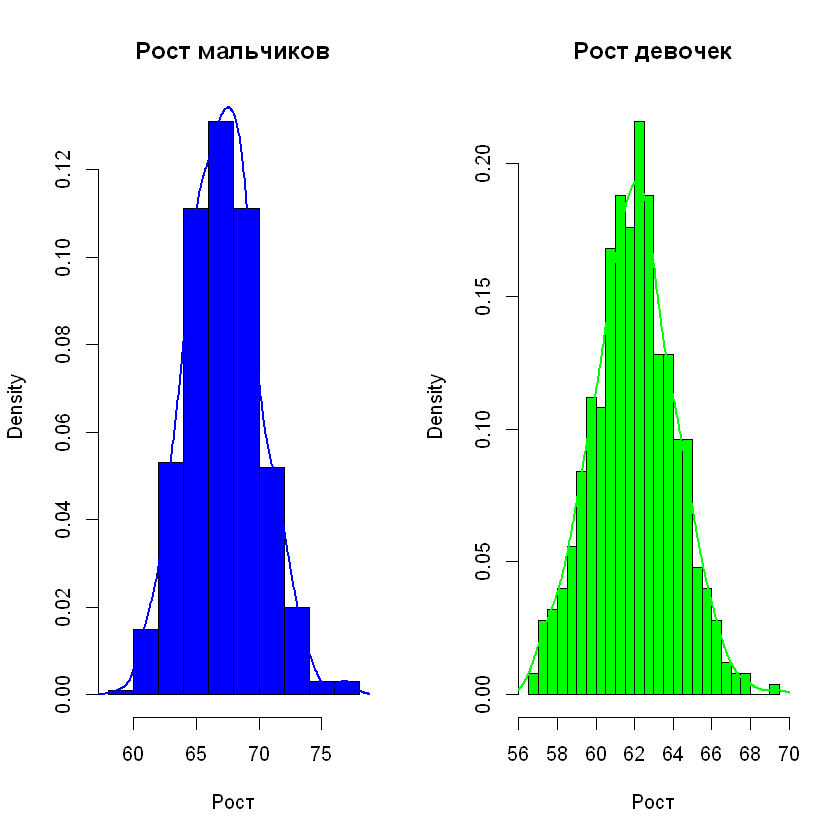

In [201]:
par(mfrow = c(1, 2), mar = c(5, 4, 4, 2) + 0.1)

# Рост мальчиков
hist(hs_heights_df$boys, breaks = 10, col = "blue", xlab = "Рост", main = "Рост мальчиков", probability = TRUE)
lines(density(hs_heights_df$boys), col = "blue", lwd = 2)

# Рост девочек
hist(hs_heights_df$girls, breaks = 30, col = "green", xlab = "Рост", main = "Рост девочек", probability = TRUE)
lines(density(hs_heights_df$girls), col = "green", lwd = 2)

par(mfrow = c(1, 1))

**Для проведения анализа на выборке малого и умеренного размеров сконкатенируем датафрейм.**

      boys           girls      
 Min.   :59.16   Min.   :56.68  
 1st Qu.:65.18   1st Qu.:60.60  
 Median :67.13   Median :62.01  
 Mean   :67.16   Mean   :61.98  
 3rd Qu.:68.95   3rd Qu.:63.38  
 Max.   :77.15   Max.   :69.35  
 NA's   :500     NA's   :500    


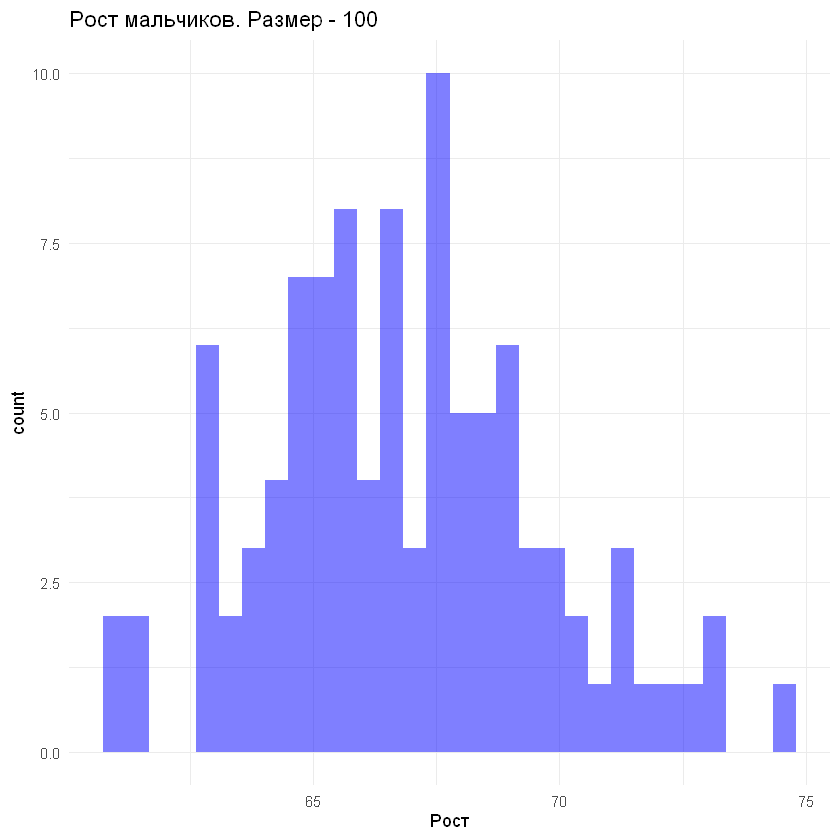

Warning message:
"Removed 500 rows containing non-finite outside the scale range (`stat_bin()`)."


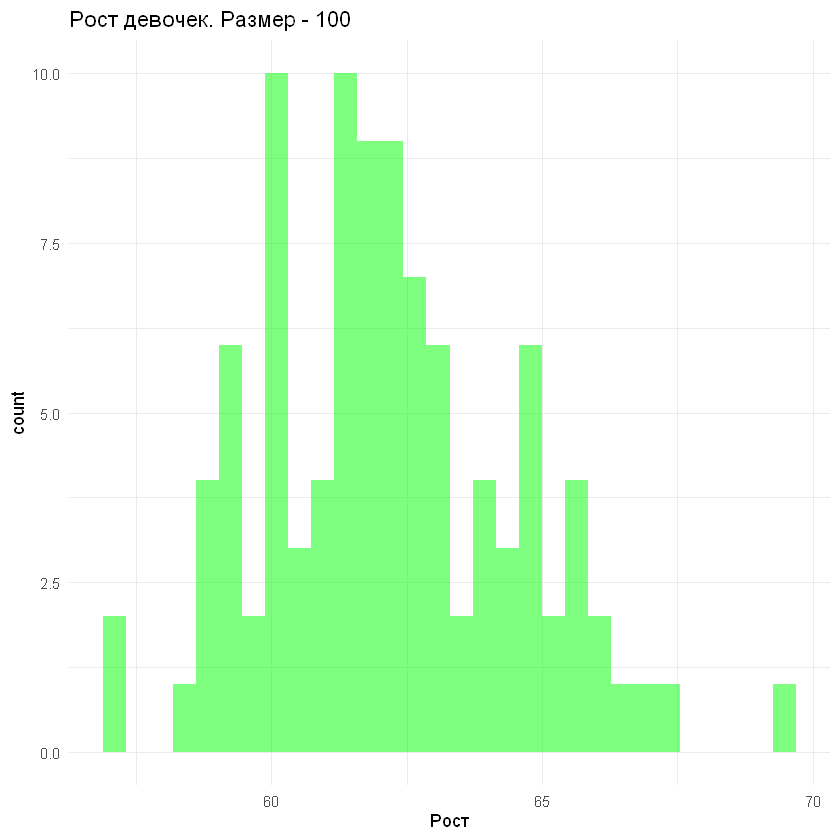

Warning message:
"Removed 500 rows containing non-finite outside the scale range (`stat_bin()`)."


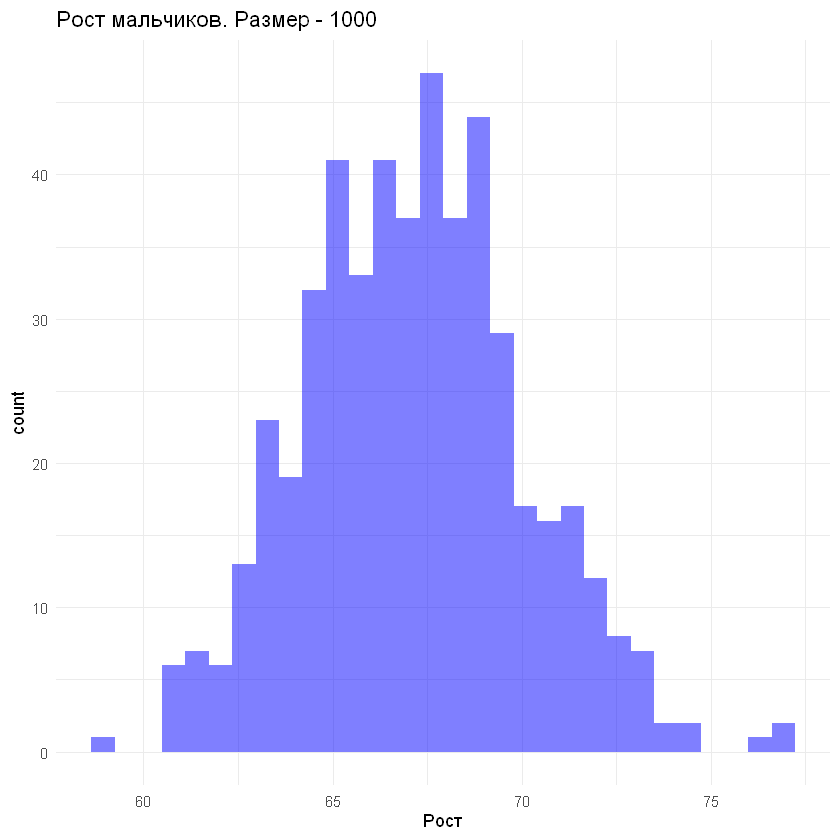

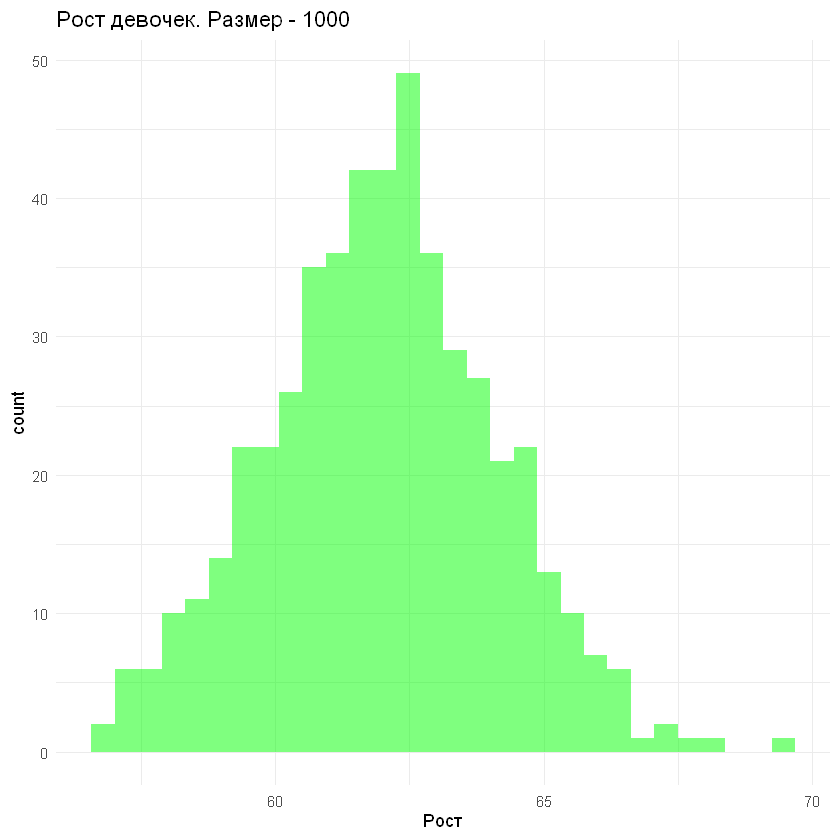

In [203]:
# Расширение датафрейма до 1000
expanded_hs_heights_df <- hs_heights_df[1:1000, ]

# Вывод характеристик расширенного датасета
print(summary(expanded_hs_heights_df))

# Визуализация графиков распределений ростов мальчиков и девочек в высшей школе для малого размера (100)
library(ggplot2)

ggplot() +
  geom_histogram(data = hs_heights_df[1:100, ], aes(x = boys), fill = "blue", alpha = 0.5, bins = 30) +
  labs(x = "Рост", title = "Рост мальчиков. Размер - 100") +
  theme_minimal()

ggplot() +
  geom_histogram(data = hs_heights_df[1:100, ], aes(x = girls), fill = "green", alpha = 0.5, bins = 30) +
  labs(x = "Рост", title = "Рост девочек. Размер - 100") +
  theme_minimal()

# Визуализация графиков распределений ростов мальчиков и девочек в высшей школе для умеренного размера (1000)
ggplot() +
  geom_histogram(data = hs_heights_df[1:1000, ], aes(x = boys), fill = "blue", alpha = 0.5, bins = 30) +
  labs(x = "Рост", title = "Рост мальчиков. Размер - 1000") +
  theme_minimal()

ggplot() +
  geom_histogram(data = hs_heights_df[1:1000, ], aes(x = girls), fill = "green", alpha = 0.5, bins = 30) +
  labs(x = "Рост", title = "Рост девочек. Размер - 1000") +
  theme_minimal()

_Для проведения анализа нужно проверить, что наблюдения в выборке независимы, в данном случае проверяем рост мальчиков и девочек. А также по тесту Шапиро-Уилка проверяем гипотезу о нормальности данных_

Для проверки независимости можно применить тест **хи-квадрат (Chi-Square Test)**, как правило его применяют для проверки независимости категориальных данных. 

Либо можно рассчитать коэффициент корреляции Пирсона для проверки зависимости между данными. **_Если p-value меньше 0.05, то делается вывод о наличии зависимости между столбцами._** Рассчитаем коэффициент корреляции Пирсона:

In [206]:
# Проверка данных на независимость - рассчитаем коэффициент корреляции Пирсона и проверим его на уровне значимости alpha = 0.05

correlation_test <- cor.test(hs_heights_df$boys, hs_heights_df$girls)
correlation <- correlation_test$estimate
p_value <- correlation_test$p.value

cat("\033[1mКорреляция Пирсона\033[0m:", correlation, ", p-value:", p_value, "\n")

if (p_value > 0.05) {
    cat("Данные независимы\n")
} else {
    cat("Данные зависимы\n")
}


Корреляция Пирсона: -0.01353088 , p-value: 0.7627922 
Данные независимы


In [207]:
# Проверка данных на нормальность
shapiro_test_boys <- shapiro.test(hs_heights_df$boys) # проверка для роста мальчиков
cat(sprintf("\033[1mШапиро-Уилк\033[0m: Статистика=%.4f, p-value=%.4e\n", shapiro_test_boys$statistic, shapiro_test_boys$p.value))

shapiro_test_girls <- shapiro.test(hs_heights_df$girls) # проверка для роста девочек
cat(sprintf("\033[1mШапиро-Уилк\033[0m: Статистика=%.4f, p-value=%.4e\n", shapiro_test_girls$statistic, shapiro_test_girls$p.value))

alpha <- 0.05
if (shapiro_test_boys$p.value > alpha && shapiro_test_girls$p.value > alpha) {
    cat("H0: Данные - нормальные\n")
} else {
    cat("H1: Данные - не нормальные\n")
}


Шапиро-Уилк: Статистика=0.9953, p-value=1.3945e-01
Шапиро-Уилк: Статистика=0.9976, p-value=6.8459e-01
H0: Данные - нормальные


**Данные являются независимыми и нормальными. Можно проводить анализ**

**_Q-Q plot_**

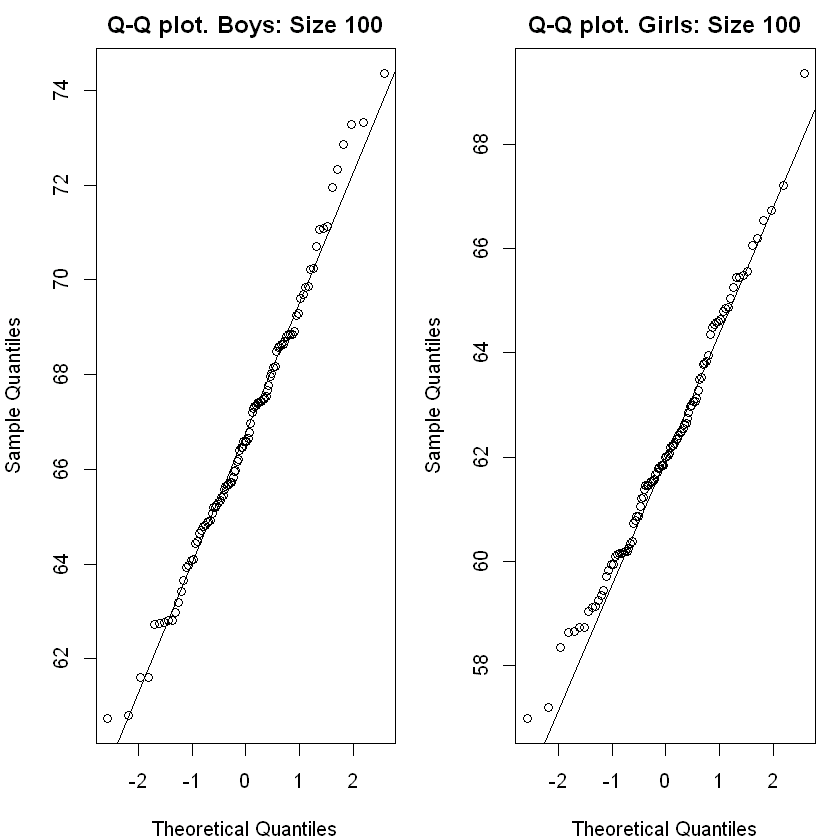

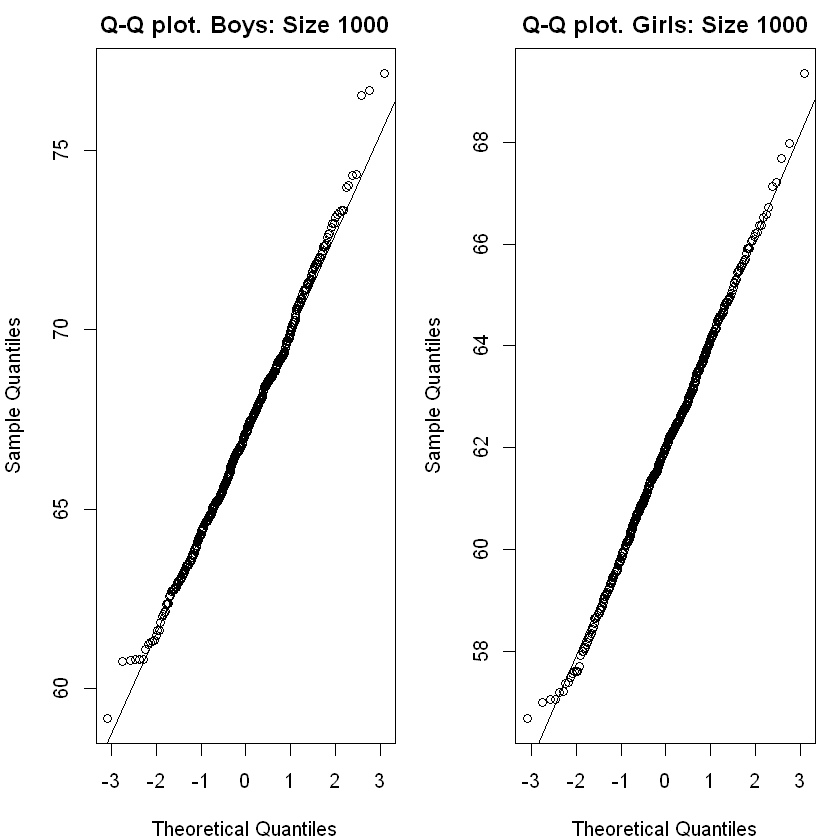

In [211]:
# Q-Q plot для обеих столбцов (boys, girls)

# Для выборки размера 100
par(mfrow=c(1, 2), mar=c(4, 4, 2, 1))
qqnorm(head(hs_heights_df$boys, 100), main='Q-Q plot. Boys: Size 100')
qqline(head(hs_heights_df$boys, 100))
qqnorm(head(hs_heights_df$girls, 100), main='Q-Q plot. Girls: Size 100')
qqline(head(hs_heights_df$girls, 100))

# Для выборки размера 1000
par(mfrow=c(1, 2), mar=c(4, 4, 2, 1))
qqnorm(hs_heights_df$boys, main='Q-Q plot. Boys: Size 1000')
qqline(hs_heights_df$boys)
qqnorm(hs_heights_df$girls, main='Q-Q plot. Girls: Size 1000')
qqline(hs_heights_df$girls)


**_Envelope Method_**

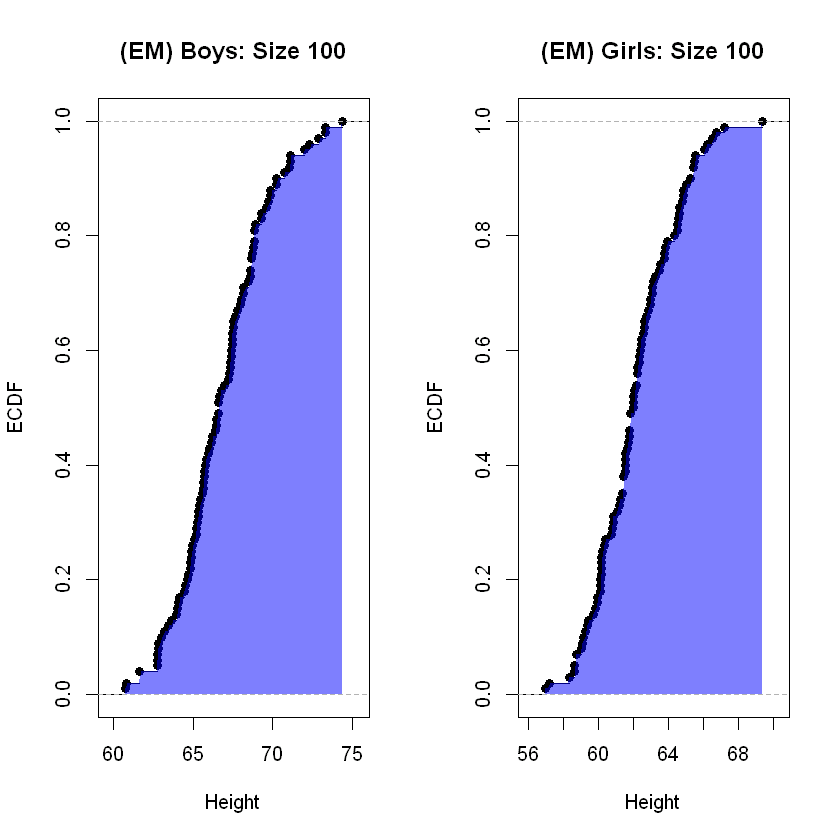

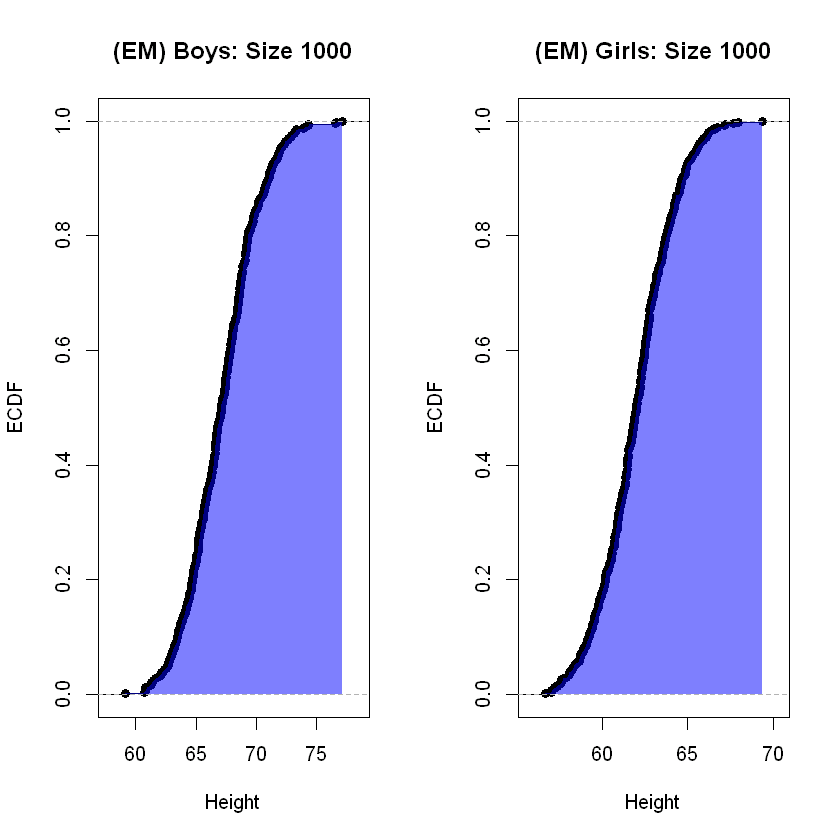

In [213]:
envelope_ecdf <- function(data) {
  ecdf_data <- ecdf(data)
  x_vals <- seq(min(data), max(data), length.out = 100)
  y_vals <- ecdf_data(x_vals)
  polygon_x <- c(x_vals, rev(x_vals))
  polygon_y <- c(y_vals, rep(0, length(y_vals)))
  polygon(polygon_x, polygon_y, col = rgb(0, 0, 1, 0.5), border = NA)
}

# Размер выборки - 100
par(mfrow = c(1, 2))
plot(ecdf(hs_heights_df$boys[1:100]), main = '(EM) Boys: Size 100', xlab = 'Height', ylab = 'ECDF')
envelope_ecdf(hs_heights_df$boys[1:100])
plot(ecdf(hs_heights_df$girls[1:100]), main = '(EM) Girls: Size 100', xlab = 'Height', ylab = 'ECDF')
envelope_ecdf(hs_heights_df$girls[1:100])
par(mfrow = c(1, 1))

# Размер выборки - 1000
par(mfrow = c(1, 2))
plot(ecdf(hs_heights_df$boys), main = '(EM) Boys: Size 1000', xlab = 'Height', ylab = 'ECDF')
envelope_ecdf(hs_heights_df$boys)
plot(ecdf(hs_heights_df$girls), main = '(EM) Girls: Size 1000', xlab = 'Height', ylab = 'ECDF')
envelope_ecdf(hs_heights_df$girls)
par(mfrow = c(1, 1))

[1] "Для выборок роста студентов (мальчиков) умеренного(1000) и млалого(100) объемов"


Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."


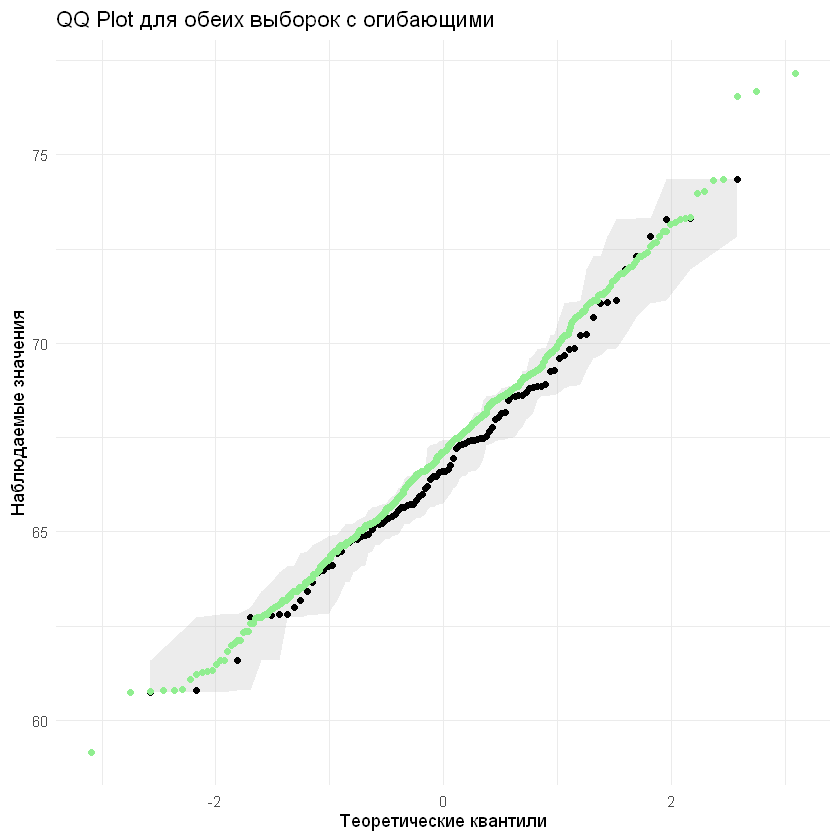

In [214]:
# Метод огибающих для мальчиков
print("Для выборок роста студентов (мальчиков) умеренного(1000) и млалого(100) объемов")
envelope_method(head(hs_heights_df$boys, 100), head(hs_heights_df$boys, 1000))

[1] "Для выборок роста студентов (девочек) умеренного(1000) и млалого(100) объемов"


Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."


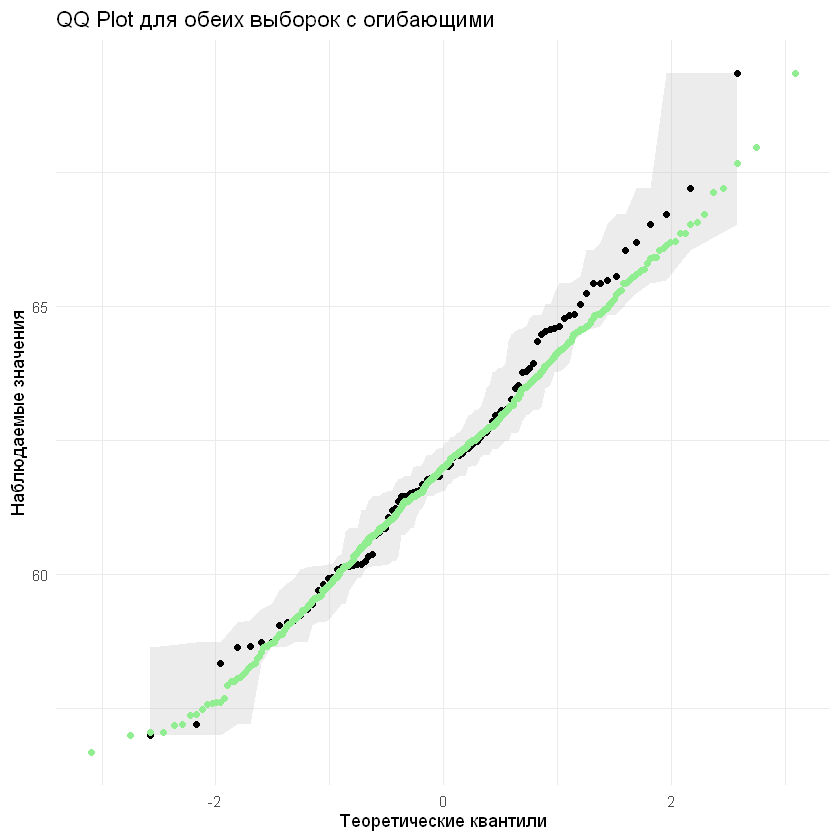

In [215]:
# Метод огибающих для девочек
print("Для выборок роста студентов (девочек) умеренного(1000) и млалого(100) объемов")
envelope_method(head(hs_heights_df$girls, 100), head(hs_heights_df$girls, 1000))

**Стандартные процедуры проверки гипотез о нормальности (Колмогорова-Смирнова, Шапиро-Уилка и др.)**

In [217]:
# Размер выборки - 100
ks_test1 <- ks.test(head(hs_heights_df$boys, 100), "pnorm", mean = mu, sd = sigma) 
ks_test2 <- ks.test(head(hs_heights_df$girls, 100), "pnorm", mean = mu, sd = sigma)

# Размер выборки - 1000
ks_test3 <- ks.test(hs_heights_df$boys, "pnorm", mean = mu, sd = sigma) 
ks_test4 <- ks.test(hs_heights_df$girls, "pnorm", mean = mu, sd = sigma)

cat("Размер выборки: 100\n\n")
print(ks_test1)
print(ks_test2)
cat("\n")

cat("Размер выборки: 1000\n\n")
print(ks_test3)
print(ks_test4)
cat("\n")

# H0 - данные распределены нормально
# H1 - данные не распределены нормально

# Проверяем гипотезы для выборок размеров 100 и 1000

# Проверяем на уровне значимости alpha = 0.05

# Выборка размера 100
cat("K-S Test.\n\nТест 1: ")
if (ks_test1$p.value > 0.05) {
    cat("Принимаем нулевую гипотезу: данные распределeны нормально\n")
} else {
    cat("Принимаем альтернативную гипотезу: данные не распределeны нормально\n")
}

cat("Тест 2: ")
if (ks_test2$p.value > 0.05) {
    cat("Принимаем нулевую гипотезу: данные распределeны нормально\n")
} else {
    cat("Принимаем альтернативную гипотезу: данные не распределeны нормально\n")
}

# Выборка размера 1000
cat("Тест 3: ")
if (ks_test3$p.value > 0.05) {
    cat("Принимаем нулевую гипотезу: данные распределeны нормально\n")
} else {
    cat("Принимаем альтернативную гипотезу: данные не распределeны нормально\n")
}

cat("Тест 4: ")
if (ks_test4$p.value > 0.05) {
    cat("Принимаем нулевую гипотезу: данные распределeны нормально\n")
} else {
    cat("Принимаем альтернативную гипотезу: данные не распределeны нормально\n")
}


Warning message in ks.test.default(head(hs_heights_df$boys, 100), "pnorm", mean = mu, :
"ties should not be present for the one-sample Kolmogorov-Smirnov test"
Warning message in ks.test.default(head(hs_heights_df$girls, 100), "pnorm", mean = mu, :
"ties should not be present for the one-sample Kolmogorov-Smirnov test"
Warning message in ks.test.default(hs_heights_df$boys, "pnorm", mean = mu, sd = sigma):
"ties should not be present for the one-sample Kolmogorov-Smirnov test"
Warning message in ks.test.default(hs_heights_df$girls, "pnorm", mean = mu, sd = sigma):
"ties should not be present for the one-sample Kolmogorov-Smirnov test"


Размер выборки: 100


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  head(hs_heights_df$boys, 100)
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  head(hs_heights_df$girls, 100)
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


Размер выборки: 1000


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  hs_heights_df$boys
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  hs_heights_df$girls
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


K-S Test.

Тест 1: Принимаем альтернативную гипотезу: данные не распределeны нормально
Тест 2: Принимаем альтернативную гипотезу: данные не распределeны нормально
Тест 3: Принимаем альтернативную гипотезу: данные не распределeны нормально
Тест 4: Принимаем альтернативную гипотезу: данные не распределeны нормально


**Остальные тесты для выборки малого и умеренного размеров** 

Тесты проверяют гипотезу о принадлежности данных нормальному распределению. 

Если p-значение больше значения на определенном уровне значимости (например 0.05), то это означает, что гипотеза о нормальности справедлива, иначе, наоборот. 

In [220]:
# # Проведение тестов

# # Применение тестов для обеих выборок, возьмем альфа равным 0.05. True - данные нормальные. False - данные не нормальные.
alpha = 0.05
perform_normality_tests(head(hs_heights_df$boys, 100), 'Выборка из 100 элементов - мальчики')
perform_normality_tests(head(hs_heights_df$girls, 100), 'Выборка из 100 элементов - девочки')
perform_normality_tests(hs_heights_df$boys, 'Выборка из 1000 элементов - мальчики')
perform_normality_tests(hs_heights_df$boys, 'Выборка из 1000 элементов - девочки')

Результаты тестов для Выборка из 100 элементов - мальчики:
True - принимаем гипотезу о нормальности распределения / False - иначе.

Шапиро-Уилк: Статистика=0.9882, p-value=5.2571e-01
res: TRUE

Андерсон-Дарлинг: Статистика=0.2969, p-value=5.8501e-01
res: TRUE

Крамер фон Мизес: Статистика=0.0434, p-value=6.1582e-01
res: TRUE



Warning message in ks.test.default(sample, "pnorm"):
"ties should not be present for the one-sample Kolmogorov-Smirnov test"


Колмогоров-Смирнов (Лиллиефорс): Статистика=1.0000, p-value=2.7678e-87
res: FALSE

Шапиро-Франция: Статистика=0.9882, p-value=5.2571e-01
res: TRUE

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Результаты тестов для Выборка из 100 элементов - девочки:
True - принимаем гипотезу о нормальности распределения / False - иначе.

Шапиро-Уилк: Статистика=0.9875, p-value=4.6927e-01
res: TRUE

Андерсон-Дарлинг: Статистика=0.4094, p-value=3.3876e-01
res: TRUE

Крамер фон Мизес: Статистика=0.0721, p-value=2.6009e-01
res: TRUE



Warning message in ks.test.default(sample, "pnorm"):
"ties should not be present for the one-sample Kolmogorov-Smirnov test"


Колмогоров-Смирнов (Лиллиефорс): Статистика=1.0000, p-value=2.7678e-87
res: FALSE

Шапиро-Франция: Статистика=0.9875, p-value=4.6927e-01
res: TRUE

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Результаты тестов для Выборка из 1000 элементов - мальчики:
True - принимаем гипотезу о нормальности распределения / False - иначе.

Шапиро-Уилк: Статистика=0.9953, p-value=1.3945e-01
res: TRUE

Андерсон-Дарлинг: Статистика=0.3637, p-value=4.3865e-01
res: TRUE

Крамер фон Мизес: Статистика=0.0512, p-value=4.9389e-01
res: TRUE



Warning message in ks.test.default(sample, "pnorm"):
"ties should not be present for the one-sample Kolmogorov-Smirnov test"


Колмогоров-Смирнов (Лиллиефорс): Статистика=1.0000, p-value=0.0000e+00
res: FALSE

Шапиро-Франция: Статистика=0.9953, p-value=1.3945e-01
res: TRUE

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Результаты тестов для Выборка из 1000 элементов - девочки:
True - принимаем гипотезу о нормальности распределения / False - иначе.

Шапиро-Уилк: Статистика=0.9953, p-value=1.3945e-01
res: TRUE

Андерсон-Дарлинг: Статистика=0.3637, p-value=4.3865e-01
res: TRUE

Крамер фон Мизес: Статистика=0.0512, p-value=4.9389e-01
res: TRUE



Warning message in ks.test.default(sample, "pnorm"):
"ties should not be present for the one-sample Kolmogorov-Smirnov test"


Колмогоров-Смирнов (Лиллиефорс): Статистика=1.0000, p-value=0.0000e+00
res: FALSE

Шапиро-Франция: Статистика=0.9953, p-value=1.3945e-01
res: TRUE

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


**Вывод**: Тесты **Шапиро-Уилка**, **Андерсона Дарлинга**, **Шапиро-Франсия** показали, что распределения роста студентов (мальчиков, девочек) имеет нормальное распределение на умеренных и малых выборках.

В то время, ка**к Критерий Колмогорова-Смирнова, его модификация Лиллиефорс, Крамер фон Мизе**са показали, что данные не имеют нормальное распределения на всех объемах выборок.